### Group 36

# Project: XYZ Sports Company
###  Data Science and Advanced Analytics

**Team Members:**
- André Filipe (20230972)
- Catarina Reis (20230981)
- João Gonçalves (20230560)

*2023/2024*

## 0. Imports <a class="anchor" id="imports"></a>

### 0.1. Import Libraries <a class="anchor" id="importlibraries"></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from ydata_profiling import ProfileReport
from sklearn.impute import KNNImputer
import matplotlib.cm as cm
import math
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import scipy.stats as stats
from scipy.stats import zscore
from scipy.stats import skew
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import euclidean_distances
#from tabulate import tabulate
from math import ceil
from sklearn.metrics import pairwise_distances
from scipy.stats import chi2_contingency 

# SOM
import sompy
from sompy.visualization.mapview import View2D
from sompy.visualization.bmuhits import BmuHitsView
from sompy.visualization.hitmap import HitMapView

#palette color
sns.set_palette("viridis")

# Sklearn clustering algorithms
from sklearn.cluster import AgglomerativeClustering, KMeans, MeanShift, DBSCAN
from scipy.cluster.hierarchy import dendrogram

# Other clustering algorithms
from kmodes.kprototypes import KPrototypes
import kmedoids

# Clusters evaluation
from sklearn.metrics import silhouette_score, silhouette_samples

# Gower distance
import gower

# Multidimensional visualization
from sklearn.manifold import TSNE

# Feature importance
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

import logging 

logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)

### 0.2. Import Dataset <a class="anchor" id="importdataset"></a>

In [3]:
df_original = pd.read_csv('XYZ_sports_dataset.csv', delimiter=';')

In [4]:
df = df_original.copy()

## 1. Data Exploration <a class="anchor" id="dataexplorartion"></a>

#### Define metric, categorical, datetime and activities features

In [5]:
metric_features_original = ["Age", "Income", "DaysWithoutFrequency", "LifetimeValue", "NumberOfFrequencies","AttendedClasses", "AllowedNumberOfVisitsBySLA","RealNumberOfVisits", "NumberOfRenewals", "NumberOfReferences"]
categorical_features_original = ["Gender", "UseByTime", "AthleticsActivities", "WaterActivities", "FitnessActivities", 'DanceActivities', "TeamActivities", "RacketActivities", "CombatActivities", 'NatureActivities', "SpecialActivities", "OtherActivities", "AllowedWeeklyVisitsBySLA", "HasReferences", "Dropout"]
non_metric_features = ["Gender", "UseByTime", "AthleticsActivities", "WaterActivities", "FitnessActivities", 'DanceActivities', "TeamActivities", "RacketActivities", "CombatActivities", 'NatureActivities', "SpecialActivities", "OtherActivities", "AllowedWeeklyVisitsBySLA", "HasReferences", "Dropout", "EnrollmentStart","EnrollmentFinish", "LastPeriodStart", "LastPeriodFinish", "DateLastVisit"]

In [6]:
activities_features = ['AthleticsActivities', 'WaterActivities', 'FitnessActivities', 'DanceActivities', 'TeamActivities', 
                       'RacketActivities', 'CombatActivities', 'NatureActivities', 'SpecialActivities', 'OtherActivities']

datetime_features =["EnrollmentStart","EnrollmentFinish", "LastPeriodStart", "LastPeriodFinish", "DateLastVisit"]

#### First lines of the dataset

In [7]:
df_original.head()

ID  Age  Gender  Income EnrollmentStart EnrollmentFinish  \
0  10000   60  Female  5500.0      2019-09-03       2019-10-31   
1  10001   29  Female  2630.0      2014-08-12       2015-09-14   
2  10002   23    Male  1980.0      2017-05-02       2017-06-01   
3  10003    9    Male     0.0      2018-09-05       2019-02-12   
4  10004   35    Male  4320.0      2016-04-20       2018-06-07   

  LastPeriodStart LastPeriodFinish DateLastVisit  DaysWithoutFrequency  ...  \
0      2019-07-01       2019-12-31    2019-10-30                     1  ...   
1      2015-01-01       2015-12-31    2015-07-16                    60  ...   
2      2017-01-01       2017-06-30    2017-05-25                     7  ...   
3      2018-07-01       2019-06-30    2019-01-21                    22  ...   
4      2018-01-01       2018-06-30    2017-11-09                   210  ...   

   OtherActivities  NumberOfFrequencies  AttendedClasses  \
0              0.0                  9.0                7   
1              0.0                 23.0                1   
2              0.0                  6.0                0   
3              0.0                 20.0                2   
4              NaN                 41.0                0   

   AllowedWeeklyVisitsBySLA  AllowedNumberOfVisitsBySLA  RealNumberOfVisits  \
0                       NaN                        6.28                   2   
1                       2.0                       17.42                   1   
2                       7.0                       30.03                   6   
3                       2.0                       17.72                   3   
4                       7.0                       60.97                   0   

   NumberOfRenewals  HasReferences  NumberOfReferences  Dropout  
0                 0            0.0                   0        0  
1                 2            0.0                   0        1  
2                 0            0.0                   0        1  
3                 0            0.0                   0        1  
4                 3            0.0                   0        1  

[5 rows x 31 columns]

#### Shape of dataset and data types of each feature

In [8]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14942 entries, 0 to 14941
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          14942 non-null  int64  
 1   Age                         14942 non-null  int64  
 2   Gender                      14942 non-null  object 
 3   Income                      14447 non-null  float64
 4   EnrollmentStart             14942 non-null  object 
 5   EnrollmentFinish            14942 non-null  object 
 6   LastPeriodStart             14942 non-null  object 
 7   LastPeriodFinish            14942 non-null  object 
 8   DateLastVisit               14942 non-null  object 
 9   DaysWithoutFrequency        14942 non-null  int64  
 10  LifetimeValue               14942 non-null  float64
 11  UseByTime                   14942 non-null  int64  
 12  AthleticsActivities         14906 non-null  float64
 13  WaterActivities             149

#### Descriptive Statistics for all features

In [9]:
df_original.describe(include = 'all').T

count unique         top  freq         mean  \
ID                          14942.0    NaN         NaN   NaN      17470.5   
Age                         14942.0    NaN         NaN   NaN    26.015794   
Gender                        14942      2      Female  8931          NaN   
Income                      14447.0    NaN         NaN   NaN  2230.816086   
EnrollmentStart               14942   1490  2015-03-02    92          NaN   
EnrollmentFinish              14942   1300  2015-09-16  1684          NaN   
LastPeriodStart               14942     12  2019-07-01  3172          NaN   
LastPeriodFinish              14942     11  2019-12-31  3694          NaN   
DateLastVisit                 14942   1384  2019-10-31   475          NaN   
DaysWithoutFrequency        14942.0    NaN         NaN   NaN    81.224936   
LifetimeValue               14942.0    NaN         NaN   NaN   302.561871   
UseByTime                   14942.0    NaN         NaN   NaN     0.047116   
AthleticsActivities         14906.0    NaN         NaN   NaN      0.00738   
WaterActivities             14905.0    NaN         NaN   NaN     0.296209   
FitnessActivities           14907.0    NaN         NaN   NaN     0.576038   
DanceActivities             14906.0    NaN         NaN   NaN          0.0   
TeamActivities              14907.0    NaN         NaN   NaN     0.055544   
RacketActivities            14905.0    NaN         NaN   NaN     0.023415   
CombatActivities            14909.0    NaN         NaN   NaN     0.107921   
NatureActivities            14895.0    NaN         NaN   NaN          0.0   
SpecialActivities           14898.0    NaN         NaN   NaN     0.026514   
OtherActivities             14907.0    NaN         NaN   NaN     0.001878   
NumberOfFrequencies         14916.0    NaN         NaN   NaN    40.120542   
AttendedClasses             14942.0    NaN         NaN   NaN    10.152456   
AllowedWeeklyVisitsBySLA    14407.0    NaN         NaN   NaN     5.759561   
AllowedNumberOfVisitsBySLA  14942.0    NaN         NaN   NaN    41.636299   
RealNumberOfVisits          14942.0    NaN         NaN   NaN     5.320707   
NumberOfRenewals            14942.0    NaN         NaN   NaN      1.20526   
HasReferences               14930.0    NaN         NaN   NaN     0.019893   
NumberOfReferences          14942.0    NaN         NaN   NaN     0.022286   
Dropout                     14942.0    NaN         NaN   NaN     0.800964   

                                    std      min       25%      50%       75%  \
ID                          4313.528196  10000.0  13735.25  17470.5  21205.75   
Age                           14.156582      0.0      19.0     23.0      31.0   
Gender                              NaN      NaN       NaN      NaN       NaN   
Income                      1566.527734      0.0    1470.0   1990.0    2790.0   
EnrollmentStart                     NaN      NaN       NaN      NaN       NaN   
EnrollmentFinish                    NaN      NaN       NaN      NaN       NaN   
LastPeriodStart                     NaN      NaN       NaN      NaN       NaN   
LastPeriodFinish                    NaN      NaN       NaN      NaN       NaN   
DateLastVisit                       NaN      NaN       NaN      NaN       NaN   
DaysWithoutFrequency         144.199576      0.0      13.0     41.0     83.75   
LifetimeValue                364.319566      0.0      83.6    166.2   355.075   
UseByTime                      0.211893      0.0       0.0      0.0       0.0   
AthleticsActivities             0.08559      0.0       0.0      0.0       0.0   
WaterActivities                  0.4566      0.0       0.0      0.0       1.0   
FitnessActivities              0.494201      0.0       0.0      1.0       1.0   
DanceActivities                     0.0      0.0       0.0      0.0       0.0   
TeamActivities                 0.229047      0.0       0.0      0.0       0.0   
RacketActivities               0.151222      0.0       0.0      0.0       0.0   
CombatActivities          

#### Descriptive Statistics of numerical features | Table 3.1.

In [4]:
import numpy as np
d = np.eye(5)

r = np.random.random((5,5))

output = d*r

output = output - r

print(output)

[[ 0.         -0.68763212 -0.20991674 -0.46761574 -0.53526272]
 [-0.70032915  0.         -0.8407004  -0.31599306 -0.19762214]
 [-0.28158224 -0.82331733  0.         -0.59863044 -0.0235967 ]
 [-0.15600419 -0.46238997 -0.87592217  0.         -0.05977349]
 [-0.6234294  -0.14140837 -0.17089136 -0.07038242  0.        ]]


In [10]:
df_original[metric_features_original].describe().T

count         mean          std   min      25%  \
Age                         14942.0    26.015794    14.156582  0.00    19.00   
Income                      14447.0  2230.816086  1566.527734  0.00  1470.00   
DaysWithoutFrequency        14942.0    81.224936   144.199576  0.00    13.00   
LifetimeValue               14942.0   302.561871   364.319566  0.00    83.60   
NumberOfFrequencies         14916.0    40.120542    65.466459  1.00     7.00   
AttendedClasses             14942.0    10.152456    29.154202  0.00     0.00   
AllowedNumberOfVisitsBySLA  14942.0    41.636299    21.066166  0.56    25.72   
RealNumberOfVisits          14942.0     5.320707     6.332958  0.00     1.00   
NumberOfRenewals            14942.0     1.205260     1.381305  0.00     0.00   
NumberOfReferences          14942.0     0.022286     0.166777  0.00     0.00   

                                50%       75%       max  
Age                           23.00    31.000     87.00  
Income                      1990.00  2790.000  10890.00  
DaysWithoutFrequency          41.00    83.750   1745.00  
LifetimeValue                166.20   355.075   6727.80  
NumberOfFrequencies           18.00    45.000   1031.00  
AttendedClasses                0.00     3.000    581.00  
AllowedNumberOfVisitsBySLA    38.99    60.970    240.03  
RealNumberOfVisits             4.00     7.000     84.00  
NumberOfRenewals               1.00     2.000      6.00  
NumberOfReferences             0.00     0.000      3.00

#### Percentage of missing values in each feature

In [11]:
round((df_original.isna().sum() / len(df_original)) * 100,2)

ID                            0.00
Age                           0.00
Gender                        0.00
Income                        3.31
EnrollmentStart               0.00
EnrollmentFinish              0.00
LastPeriodStart               0.00
LastPeriodFinish              0.00
DateLastVisit                 0.00
DaysWithoutFrequency          0.00
LifetimeValue                 0.00
UseByTime                     0.00
AthleticsActivities           0.24
WaterActivities               0.25
FitnessActivities             0.23
DanceActivities               0.24
TeamActivities                0.23
RacketActivities              0.25
CombatActivities              0.22
NatureActivities              0.31
SpecialActivities             0.29
OtherActivities               0.23
NumberOfFrequencies           0.17
AttendedClasses               0.00
AllowedWeeklyVisitsBySLA      3.58
AllowedNumberOfVisitsBySLA    0.00
RealNumberOfVisits            0.00
NumberOfRenewals              0.00
HasReferences       

Loaded backend module://matplotlib_inline.backend_inline version unknown.
Loaded backend module://matplotlib_inline.backend_inline version unknown.


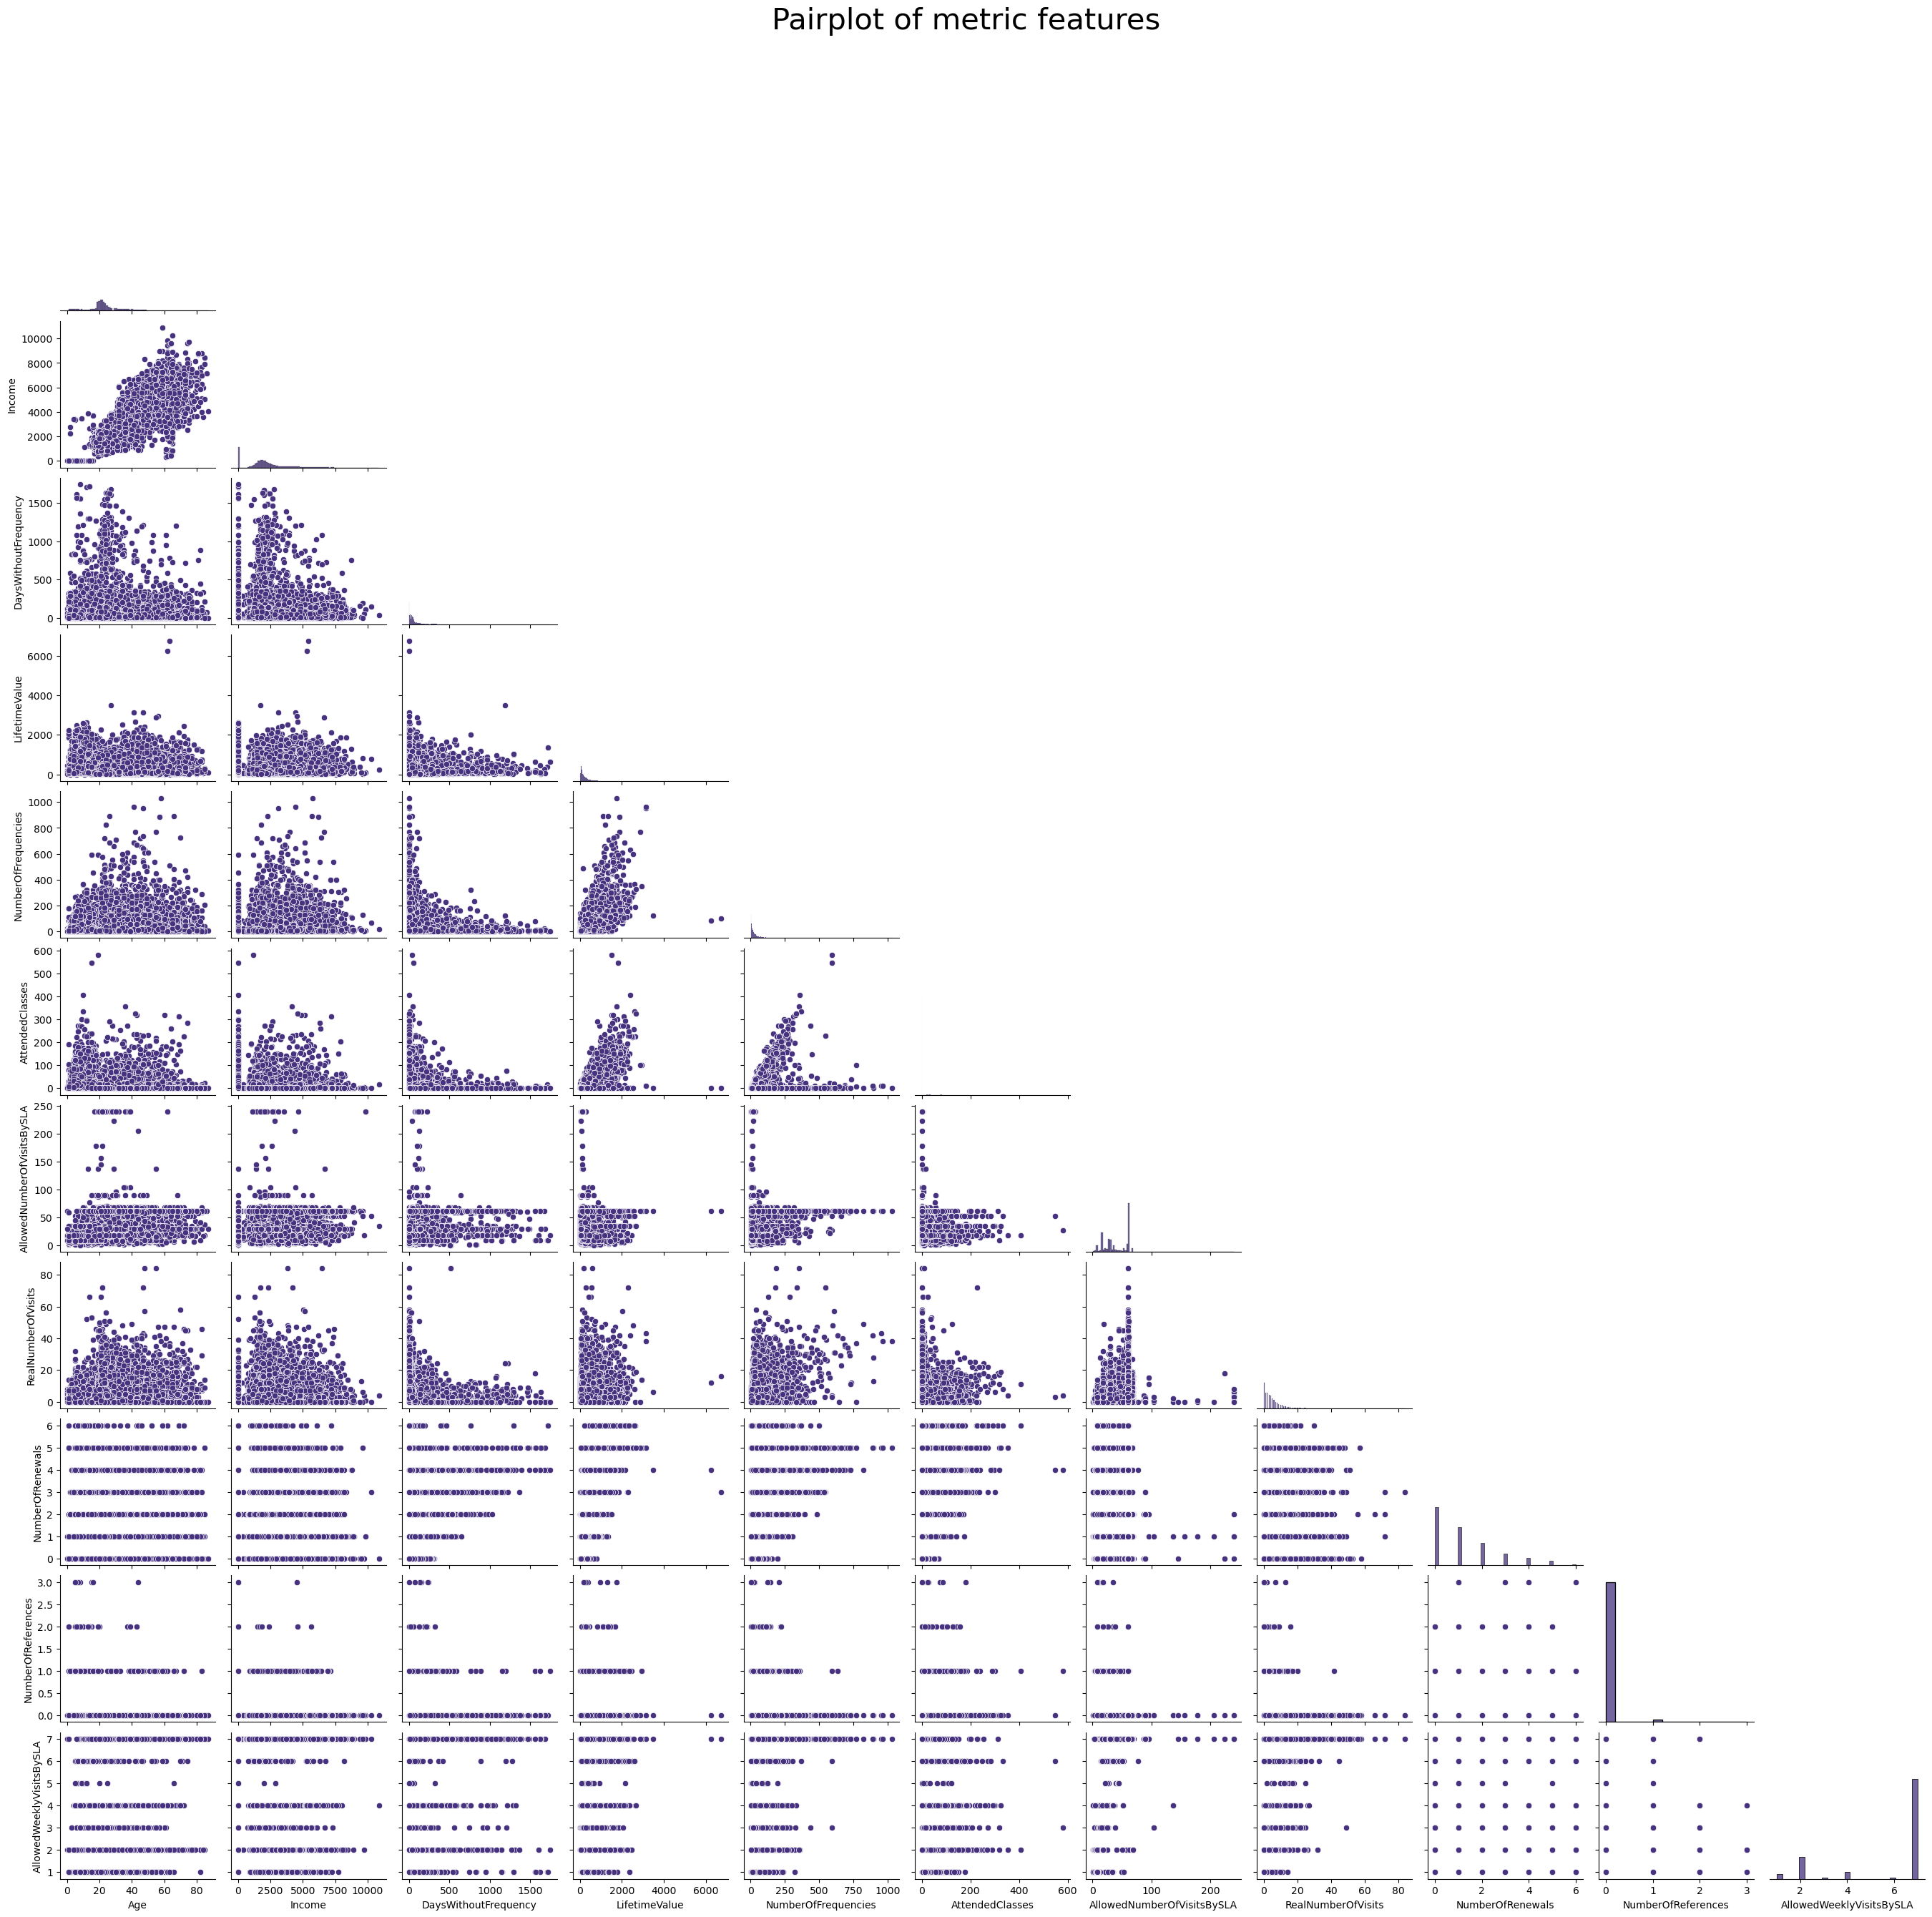

In [12]:
plot = sns.pairplot(df[metric_features_original+ ['AllowedWeeklyVisitsBySLA']],corner=True)
plot.fig.suptitle('Pairplot of metric features', fontsize = 30)
plt.subplots_adjust(top=0.9)

#### Change index

> We're going to drop "ID" as we can just use 0 to N to identify each individual.

In [13]:
df.drop("ID", axis = 1, inplace = True)

#### Fill missing values with NaN

In [14]:
df.fillna(np.nan)

Age  Gender  Income EnrollmentStart EnrollmentFinish LastPeriodStart  \
0       60  Female  5500.0      2019-09-03       2019-10-31      2019-07-01   
1       29  Female  2630.0      2014-08-12       2015-09-14      2015-01-01   
2       23    Male  1980.0      2017-05-02       2017-06-01      2017-01-01   
3        9    Male     0.0      2018-09-05       2019-02-12      2018-07-01   
4       35    Male  4320.0      2016-04-20       2018-06-07      2018-01-01   
...    ...     ...     ...             ...              ...             ...   
14937   14    Male     0.0      2016-09-08       2016-09-08      2019-07-01   
14938   39    Male     NaN      2015-09-17       2016-06-04      2016-01-01   
14939   20    Male  1810.0      2017-03-01       2017-03-31      2017-01-01   
14940   55    Male  4800.0      2018-03-01       2018-03-01      2019-07-01   
14941   32  Female  3700.0      2016-04-01       2019-06-11      2019-01-01   

      LastPeriodFinish DateLastVisit  DaysWithoutFrequency  LifetimeValue  \
0           2019-12-31    2019-10-30                     1          89.35   
1           2015-12-31    2015-07-16                    60         479.20   
2           2017-06-30    2017-05-25                     7          37.60   
3           2019-06-30    2019-01-21                    22         155.40   
4           2018-06-30    2017-11-09                   210         373.20   
...                ...           ...                   ...            ...   
14937       2019-12-31    2019-10-29                     2        1460.45   
14938       2016-06-30    2016-04-27                    38         343.85   
14939       2017-06-30    2017-03-29                     2          43.60   
14940       2019-12-31    2019-10-28                     3         788.60   
14941       2019-06-30    2019-05-28                    14         919.60   

       ...  OtherActivities  NumberOfFrequencies  AttendedClasses  \
0      ...              0.0                  9.0                7   
1      ...              0.0                 23.0                1   
2      ...              0.0                  6.0                0   
3      ...              0.0                 20.0                2   
4      ...              NaN                 41.0                0   
...    ...              ...                  ...              ...   
14937  ...              0.0                112.0               96   
14938  ...              0.0                 57.0                0   
14939  ...              0.0                  6.0                0   
14940  ...              0.0                185.0              155   
14941  ...              0.0                169.0                1   

       AllowedWeeklyVisitsBySLA  AllowedNumberOfVisitsBySLA  \
0                           NaN                        6.28   
1                           2.0                       17.42   
2                           7.0                       30.03   
3                           2.0                       17.72   
4                           7.0                       60.97   
...                         ...                         ...   
14937                       4.0                       34.84   
14938                       7.0                       60.97   
14939                       7.0                       30.03   
14940                       3.0                       15.87   
14941                       7.0                       60.97   

       RealNumberOfVisits  NumberOfRenewals  HasReferences  \
0                       2                 0            0.0   
1                       1                 2            0.0   
2                       6                 0            0.0   
3                       3                 0            0.0   
4                       0                 3            0.0   
...                   ...               ...            ...   
14937                   8                 3            0.0   
14938                   3                 0        

### 1.1. Types conversion <a class="anchor" id="typesconversion"></a>

> **Data types significantly impact clustering success. Recognizing their significance, we meticulously converted features to ensure a prevalence of numeric types, aligning with the requirements of various clustering methods. This strategic choice enhances the efficacy of our dataset for a diverse range of analytical approaches.**

> **Features associated with activity types initially had a float64 data type, a format suitable for many clustering methods. However, considering these features represent boolean values, we chose to con-vert them to Int64.**

> **Similarly, the Boolean "HasReferences" variable had a float64 data type, so we converted it to Int64.**

> **Additionally, the categorical variable "AllowedWeeklyVisitsBySLA" also had a float64 data type, but since the only values displayed were integers between 0 and 7, we converted it to Int64.**

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14942 entries, 0 to 14941
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         14942 non-null  int64  
 1   Gender                      14942 non-null  object 
 2   Income                      14447 non-null  float64
 3   EnrollmentStart             14942 non-null  object 
 4   EnrollmentFinish            14942 non-null  object 
 5   LastPeriodStart             14942 non-null  object 
 6   LastPeriodFinish            14942 non-null  object 
 7   DateLastVisit               14942 non-null  object 
 8   DaysWithoutFrequency        14942 non-null  int64  
 9   LifetimeValue               14942 non-null  float64
 10  UseByTime                   14942 non-null  int64  
 11  AthleticsActivities         14906 non-null  float64
 12  WaterActivities             14905 non-null  float64
 13  FitnessActivities           149

#### Turning 'Gender' (Male/Female into boolean)

In [16]:
df["Gender"] = df["Gender"].map({"Male": "1", "Female":"0"})

In [17]:
categorical_features = ["Gender", "UseByTime", "AthleticsActivities", "WaterActivities", "FitnessActivities", 'DanceActivities', "TeamActivities", "RacketActivities", "CombatActivities", 'NatureActivities', "SpecialActivities", "OtherActivities", "AllowedWeeklyVisitsBySLA", "HasReferences", "Dropout"]

### 1.2. Duplicates <a class="anchor" id="duplicates"></a>

In [18]:
df.duplicated().sum()

1

In [19]:
df = df.drop_duplicates()

In [20]:
df.duplicated().sum()

0

> **The dataset has one duplicate record that we will remove.**

### 1.3. Data coherence <a class="anchor" id="coherencecheck"></a>

#### 1.3.1. Dates<a class="anchor" id="dates"></a>

In [21]:
# EnrollmentFinish < EnrollmentStart
EnrollmentFinish_EnrollmentStart = df[df["EnrollmentFinish"] < df["EnrollmentStart"]]
print("EnrollmentFinish < EnrollmentStart:", len(EnrollmentFinish_EnrollmentStart))

# LastPeriodFinish < LastPeriodStart
LastPeriodFinish_LastPeriodStart = df[df["LastPeriodFinish"] < df["LastPeriodStart"]]
print("LastPeriodFinish < LastPeriodStart:", len(LastPeriodFinish_LastPeriodStart))

# EnrollmentStart < 2014-06-01
coherence_enrollment_start = df[df["EnrollmentStart"] < "2014-06-01"]
print("EnrollmentStart < 2014-06-01:", len(coherence_enrollment_start))

# EnrollmentFinish > 2019-10-31
coherence_enrollment_finish = df[df["EnrollmentFinish"] > "2019-10-31"]
print("EnrollmentFinish > 2019-10-31:", len(coherence_enrollment_finish))

# DateLastVisit > 2019-10-31
coherence_last_visit = df[df["DateLastVisit"] > "2019-10-31"]
print("DateLastVisit > 2019-10-31:", len(coherence_last_visit))

# DateLastVisit < EnrollmentStart
enrollmentvisit_check = df[(df['DateLastVisit'] < df['EnrollmentStart'])]
print("DateLastVisit < EnrollmentStart:", len(enrollmentvisit_check))

EnrollmentFinish < EnrollmentStart: 0
LastPeriodFinish < LastPeriodStart: 0
EnrollmentStart < 2014-06-01: 0
EnrollmentFinish > 2019-10-31: 0
DateLastVisit > 2019-10-31: 0
DateLastVisit < EnrollmentStart: 0


In [22]:
# Check if DateLastVisit is inside the period of enrollment
DateLastVisit_Out_Period = (df['DateLastVisit'] < df['LastPeriodStart']) | (df['DateLastVisit'] > df['LastPeriodFinish'])

print(f"Number of records with DateLastVisit outside the period of enrollment: {df[DateLastVisit_Out_Period].shape[0]}")

Number of records with DateLastVisit outside the period of enrollment: 952


In [23]:
df.drop(columns=['LastPeriodStart', 'LastPeriodFinish'], inplace=True)
datetime_features.remove('LastPeriodStart')
datetime_features.remove('LastPeriodFinish')
non_metric_features.remove('LastPeriodStart')
non_metric_features.remove('LastPeriodFinish')

Upon analysis, it was observed that 768 records within the dataset display instances where the "DateLastVisit" falls outside the designated enrollment period. This discrepancy raises concerns about data coherence. In response, we removed the "LastPeriodStart" and "LastPeriodFinish" features. This decision was based on the recognition that "DateLastVisit" already gives us insights about the user's last visit, including the semester in which the last visit occured.

#### 1.3.2. AllowedWeeklyVisitsBySLA and AllowedNumberOfVisitsBySLA<a class="anchor" id="visitsbysla"></a>

The allowed number of visits by SLA should be the result of multiplying the allowed weekly visits by SLA by the number of weeks spanned between LastPeriodStart and LastPeriodFinish.

In [24]:
df[['AllowedWeeklyVisitsBySLA', 'AllowedNumberOfVisitsBySLA']]

AllowedWeeklyVisitsBySLA  AllowedNumberOfVisitsBySLA
0                           NaN                        6.28
1                           2.0                       17.42
2                           7.0                       30.03
3                           2.0                       17.72
4                           7.0                       60.97
...                         ...                         ...
14937                       4.0                       34.84
14938                       7.0                       60.97
14939                       7.0                       30.03
14940                       3.0                       15.87
14941                       7.0                       60.97

[14941 rows x 2 columns]

In [25]:
df['AllowedNumberOfVisitsBySLA'] = 26 * df['AllowedWeeklyVisitsBySLA']

df[['AllowedWeeklyVisitsBySLA', 'AllowedNumberOfVisitsBySLA']]

AllowedWeeklyVisitsBySLA  AllowedNumberOfVisitsBySLA
0                           NaN                         NaN
1                           2.0                        52.0
2                           7.0                       182.0
3                           2.0                        52.0
4                           7.0                       182.0
...                         ...                         ...
14937                       4.0                       104.0
14938                       7.0                       182.0
14939                       7.0                       182.0
14940                       3.0                        78.0
14941                       7.0                       182.0

[14941 rows x 2 columns]

We found a concerning discrepancy in the values between 'AllowedWeeklyVisitsBySLA' and 'AllowedNumberOfVisitsBySLA'. According to the definition of those features, the allowed visits were supposed to be the allowed weekly visits by SLA multiplied by the number of weeks from 'LastPeriodStart' to 'LastPeriodFinish'. To fix it, we decided to recalculate 'AllowedNumberOfVisitsBySLA' by multiplying 'AllowedWeeklyVisitsBySLA' by the number of weeks per semester.

Assuming a year consists of 365 days, within the context of this timeline, we consider one semester, that represents a period, to be approximately 26 weeks in duration.

#### 1.3.3. RealNumberOfVisits and AllowedNumberOfVisitsBySLA<a class="anchor" id="RealNumberOfVisits1"></a>

In [26]:
visits_coherence = df["RealNumberOfVisits"] > df["AllowedNumberOfVisitsBySLA"]
print(f"No. of instances with RealNumberOfVisits exceeding AllowedNumberOfVisitsBySLA: {visits_coherence.sum()}")

No. of instances with RealNumberOfVisits exceeding AllowedNumberOfVisitsBySLA: 0


We also check if there were cases were the real number of visits exceeded the allowed number of visits by SLA, but we didn't find inconsistencies.

#### 1.3.4. RealNumberOfVisits and NumberOfFrequencies<a class="anchor" id="RealNumberOfVisits2"></a>

We are making the assumption that NumberOfFrequencies corresponds to the total visits to the sports facility recorded between 'EnrollmentStart' and 'EnrollmentFinish,' offering a comprehensive count over the entire enrollment duration. Additionally, we assume that RealNumberOfVisits reflects the actual visits made by the user in the latest registration period, specifically between 'LastPeriodStart' and 'LastPeriodFinish'. It's important to mention that this assumption aligns with the feature descriptions and suggests a focused measure of recent activity within that defined timeframe.

Having this assumption in mind, we expect the NumberOfFrequencies to be always equal or greater than the RealNumberOfVisits, which according to our test of incoherence was not the case. We did find 481 cases with incoherences.

In [27]:
visits_coherence = df["RealNumberOfVisits"] > df["NumberOfFrequencies"]
print(f"No. of instances with RealNumberOfVisits exceeding NumberOfFrequencies: {visits_coherence.sum()}")

No. of instances with RealNumberOfVisits exceeding NumberOfFrequencies: 481


##### 1.3.4. (a) RealNumberOfVisits vs NumberOfFrequencies for all records

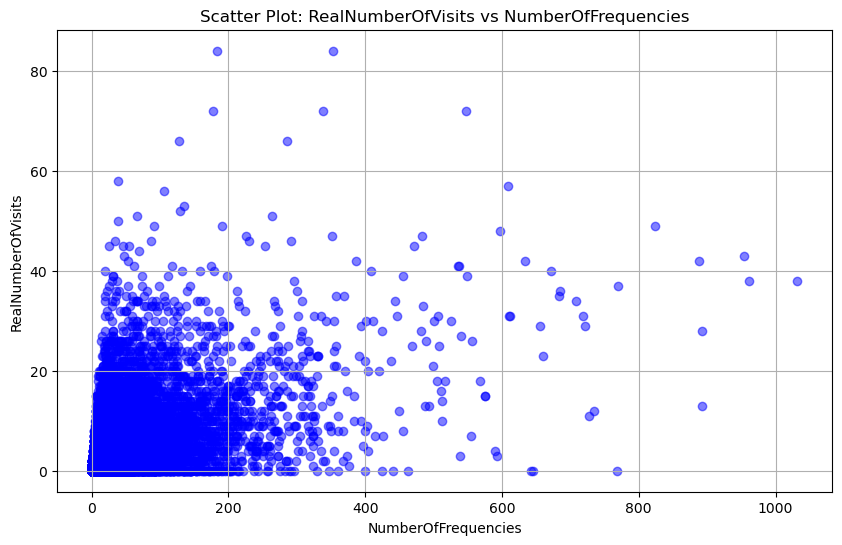

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(df["NumberOfFrequencies"], df["RealNumberOfVisits"], color='blue', alpha=0.5)
plt.title('Scatter Plot: RealNumberOfVisits vs NumberOfFrequencies')
plt.xlabel('NumberOfFrequencies')
plt.ylabel('RealNumberOfVisits')
plt.grid(True)
plt.show()

##### 1.3.4. (b) RealNumberOfVisits vs NumberOfFrequencies for the 481 incoherent records

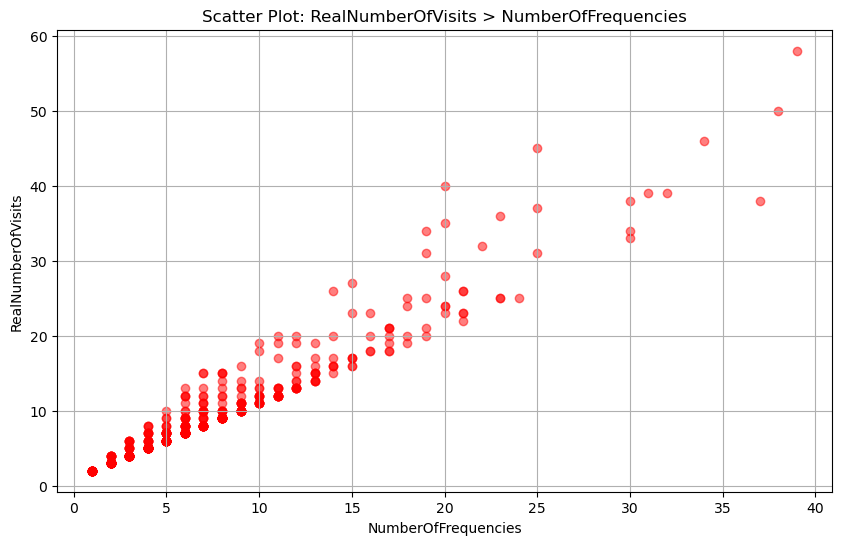

In [29]:
subset_df = df[df["RealNumberOfVisits"] > df["NumberOfFrequencies"]]

plt.figure(figsize=(10, 6))
plt.scatter(subset_df["NumberOfFrequencies"], subset_df["RealNumberOfVisits"], color='red', alpha=0.5)
plt.title('Scatter Plot: RealNumberOfVisits > NumberOfFrequencies')
plt.xlabel('NumberOfFrequencies')
plt.ylabel('RealNumberOfVisits')
plt.grid(True)
plt.show()

The vertical lines we are observing in the plot above indicate instances where individuals with the same recorded frequency have varying actual visit counts. We assume that this variability could be attributed to additional visits or participation in activities beyond the formal frequency. These additional visits may include engagement in group sessions, classes, or community events, which are not explicitly captured by the recorded frequency but contribute to the observed differences in actual visit counts.

#### 1.3.5. RealNumberOfVisits and AttendedClasses<a class="anchor" id="RealNumberOfVisits2"></a>

In [30]:
inconsistent_cases = df[df["NumberOfFrequencies"] < df["AttendedClasses"]]
print(f"No. of instances with NumberOfFrequencies exceeding AttendedClasses: {len(inconsistent_cases)}")

df.loc[inconsistent_cases.index, "NumberOfFrequencies"] = inconsistent_cases["AttendedClasses"]

No. of instances with NumberOfFrequencies exceeding AttendedClasses: 226


In our dataset, we have identified an inconsistency where the number of visits (NumberOfFrequencies) to the sports facility is recorded as less than the number of attended classes (AttendedClasses). To address this inconsistency, we suggest considering the possibility of setting the NumberOfFrequencies equal to the number of AttendedClasses for the 199 affected cases. This assumes that attending a class should be considered as a visit to the sports facility.

#### 1.3.6. RealNumberOfVisits and AllowedNumberOfVisitsBySLA<a class="anchor" id="RealNumberOfVisits3"></a>

In [31]:
inconsistent_cases = df[df["RealNumberOfVisits"] > df["AllowedNumberOfVisitsBySLA"]]
print(f"No. of instances with RealNumberOfVisits exceeding AllowedNumberOfVisitsBySLA: {len(inconsistent_cases)}")

No. of instances with RealNumberOfVisits exceeding AllowedNumberOfVisitsBySLA: 0


#### 1.3.7. Age and Income<a class="anchor" id="ageincome"></a>

In [32]:
# Find people with age < 16 and income > 0
underage_with_income = df[(df['Age'] < 16) & (df['Income'] > 0)]

# Get the number of people in those conditions
num_underage_with_income = len(underage_with_income)

print(f"Number of people with age < 16 and income > 0 is: {num_underage_with_income}")

Number of people with age < 16 and income > 0 is: 20


In [33]:
df.loc[df['Age'] < 16, 'Income'] = 0

> Considering the Portuguese legal working age is 16, we have set the income to 0 for individuals under 16. This adjustment was made to 17 records.

#### 1.3.8. HasReferences and NumberOfReferences<a class="anchor" id="HasReferences"></a>

In [34]:
def coherence_check(df):
    for index, row in df.iterrows():
        age = row['Age']
        has_references = row['HasReferences']
        num_references = row['NumberOfReferences']
        
        # Check coherence
        if has_references and num_references == 0:
            print(f"Anomaly detected at index {index}: Age: {age}, HasReferences is True, but NumberOfReferences is 0.")
        elif not has_references and num_references > 0:
            print(f"Anomaly detected at index {index}: Age: {age}, HasReferences is False, but NumberOfReferences is greater than 0.")

# Perform Coherence Check
coherence_check(df)

Anomaly detected at index 1259: Age: 43, HasReferences is True, but NumberOfReferences is 0.
Anomaly detected at index 1626: Age: 22, HasReferences is True, but NumberOfReferences is 0.
Anomaly detected at index 2548: Age: 14, HasReferences is True, but NumberOfReferences is 0.
Anomaly detected at index 2943: Age: 27, HasReferences is True, but NumberOfReferences is 0.
Anomaly detected at index 4136: Age: 22, HasReferences is True, but NumberOfReferences is 0.
Anomaly detected at index 4607: Age: 19, HasReferences is True, but NumberOfReferences is 0.
Anomaly detected at index 6792: Age: 9, HasReferences is True, but NumberOfReferences is 0.
Anomaly detected at index 7159: Age: 21, HasReferences is True, but NumberOfReferences is 0.
Anomaly detected at index 7283: Age: 23, HasReferences is True, but NumberOfReferences is 0.
Anomaly detected at index 7501: Age: 26, HasReferences is True, but NumberOfReferences is 0.
Anomaly detected at index 9225: Age: 27, HasReferences is True, but Num

In [35]:
df['HasReferences'] = df.apply(lambda row: row['NumberOfReferences'] > 0 if pd.isna(row['HasReferences']) else row['HasReferences'], axis=1)

# Set 'HasReferences' to False where 'NumberOfReferences' is 0
df.loc[df['NumberOfReferences'] == 0, 'HasReferences'] = 0.0

> It appears there are 13 records where "HasReferences" is True, yet "NumberOfReferences" is 0. We verified the age of each member to rule out the possibility of them being babies, as in such cases, we would expect HasReferences to be False. Given that all 13 members are above 8 years, a reasonable age to receive recommendations from friends or family, it's plausible they received a recommendation. Consequently, we will treat NumberOfReferences as missing values and address them in due course.

#### 1.3.9. LifetimeValue<a class="anchor" id="LifetimeValue"></a>

We checked if there were cases where the customer didn't pay during the period in which he was enrolled. We found three cases and despite the unusual nature of these situations, we opted to retain them, recognizing that their influence on overall outcomes is expected to be minimal.

In [36]:
inconsistent_cases = df[df["LifetimeValue"]== 0.0]
print(f"No. of instances with NumberOfFrequencies exceeding AttendedClasses: {len(inconsistent_cases)}")

No. of instances with NumberOfFrequencies exceeding AttendedClasses: 3


In [37]:
df[df["LifetimeValue"]== 0.0]
df = df[df.LifetimeValue != 0.0]

### 1.4. Data visualization <a class="anchor" id="datavisualization"></a>

#### 1.4.1. Distribution of metric features | Fig. 3.4.1.<a class="anchor" id="Distributionofmetricfeatures"></a>

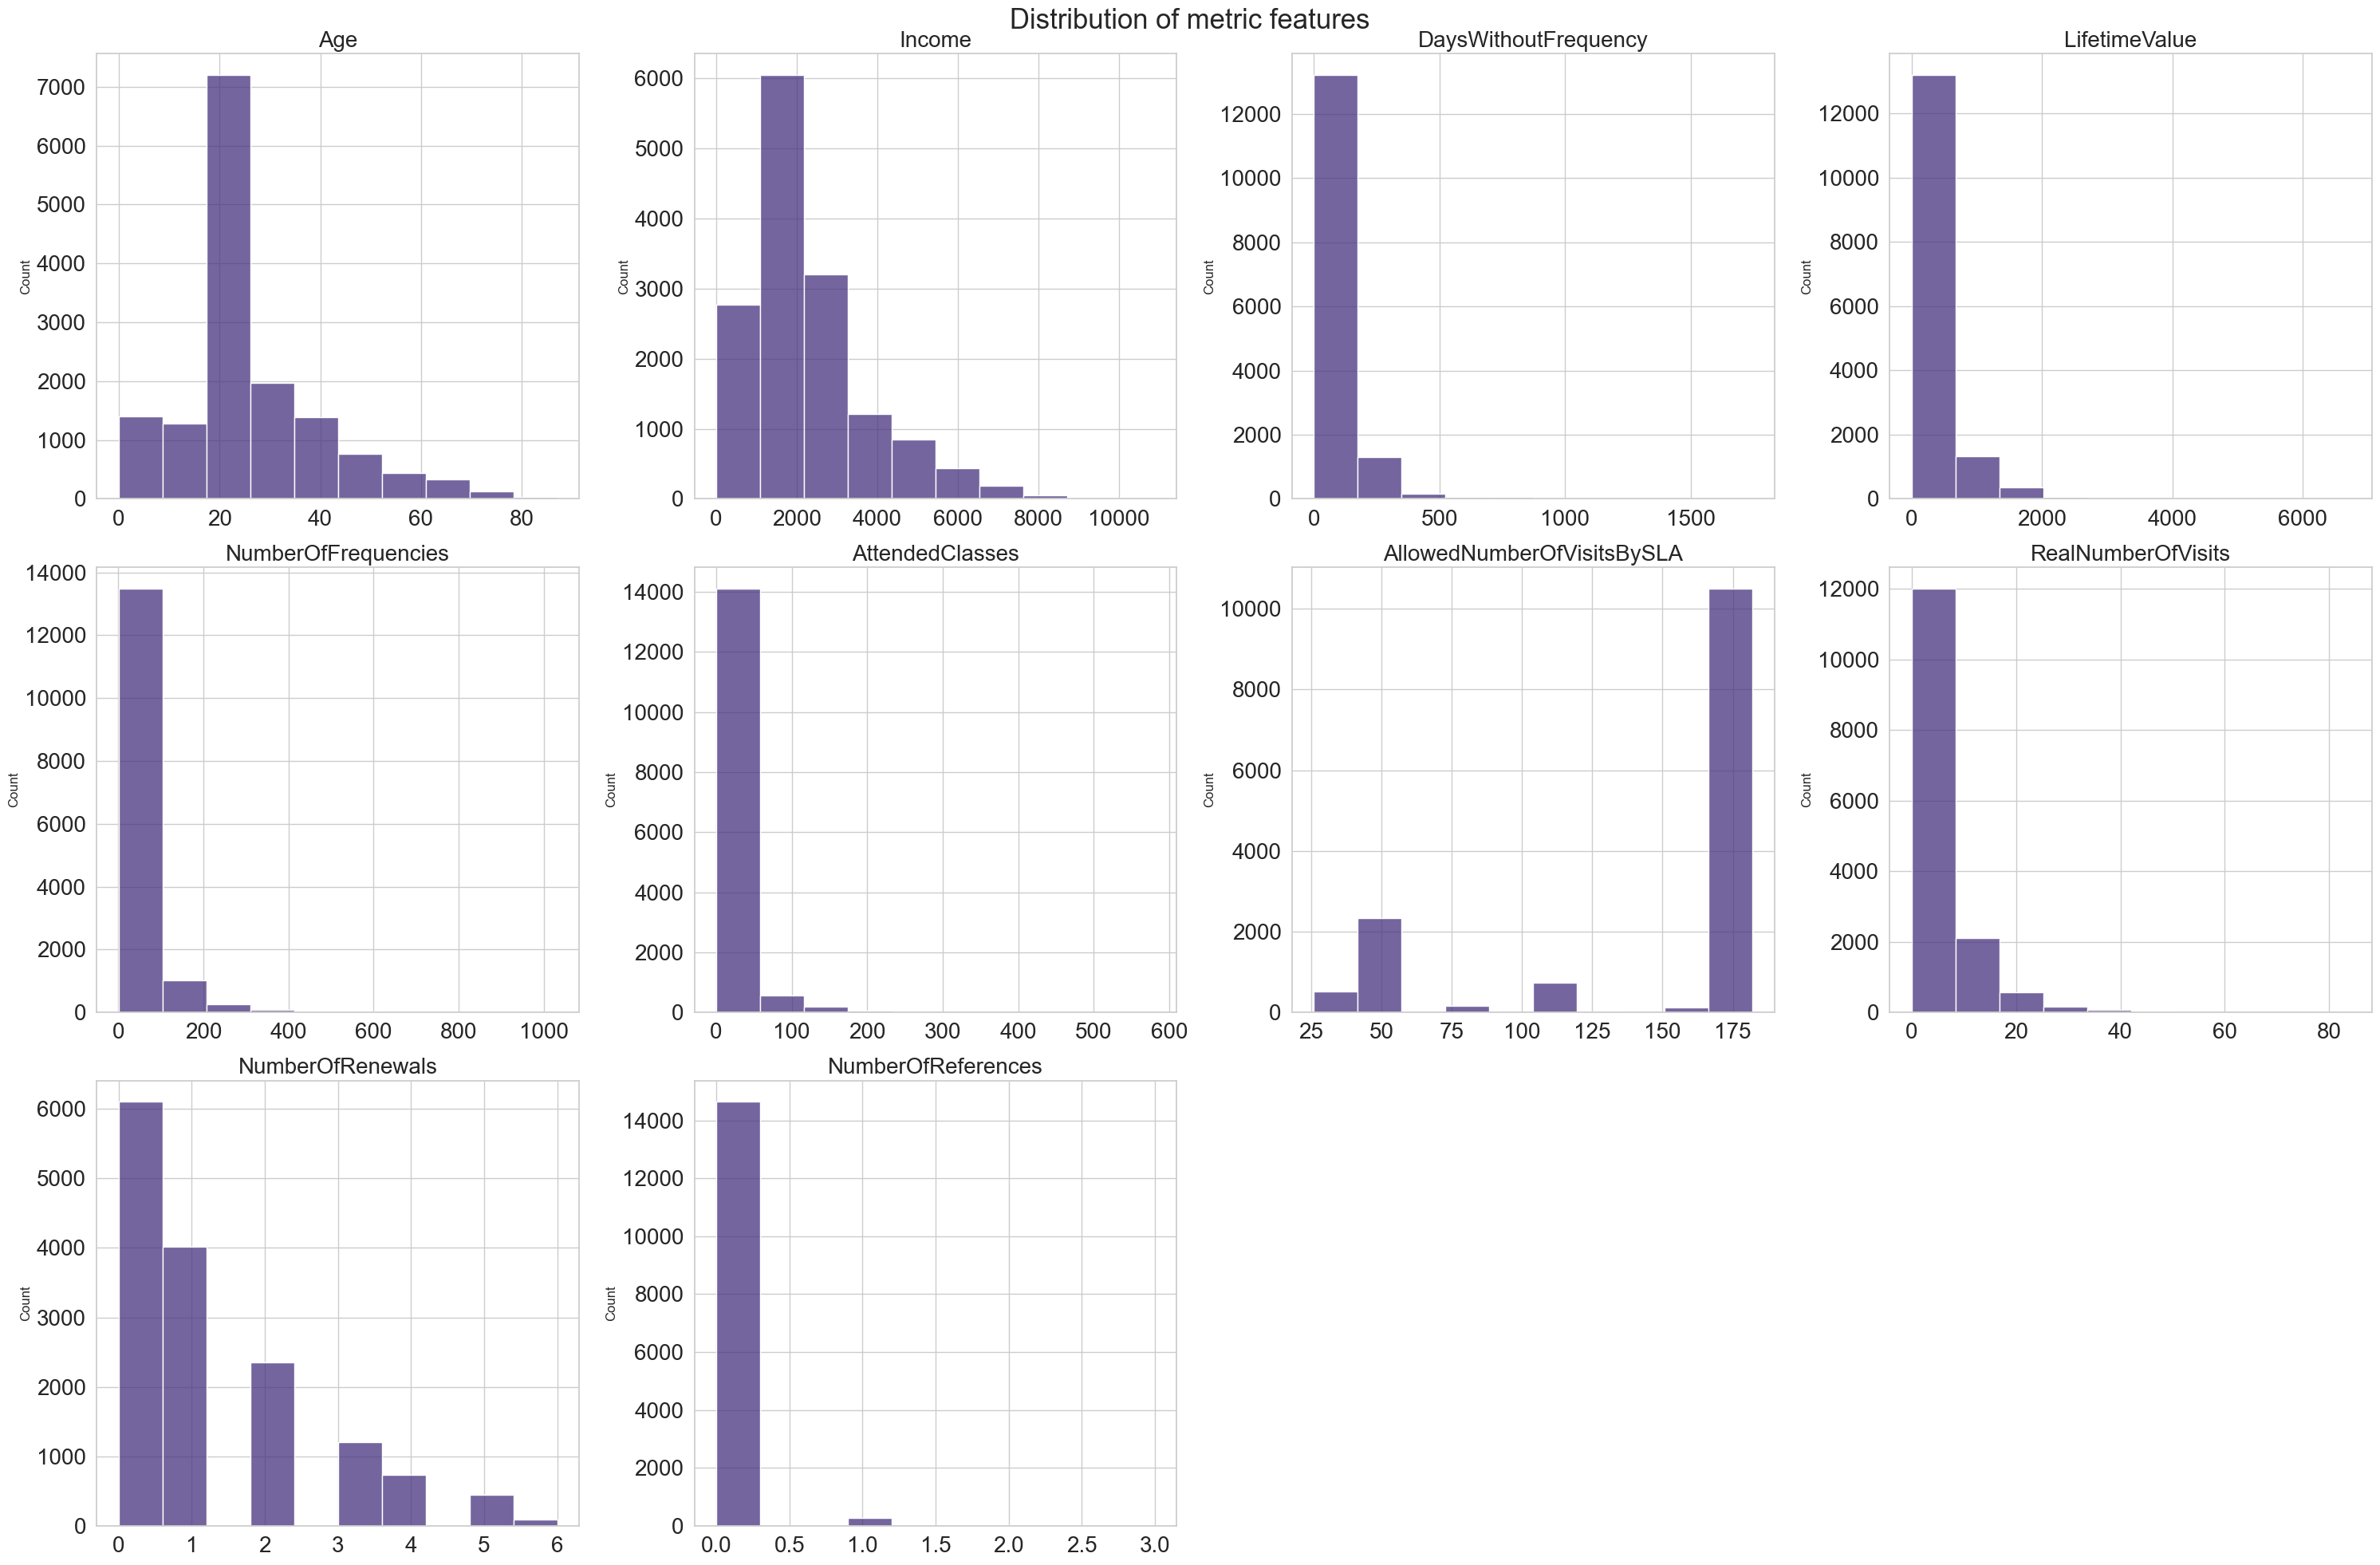

In [38]:
sns.set(style="whitegrid", palette="viridis")

num_cols = 4
num_rows = ceil(len(metric_features_original) / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, 20))  

for ax, feat in zip(axes.flatten(), metric_features_original):
    sns.histplot(df[feat], bins=10, legend=False, ax=ax)
    ax.set_title(feat, fontsize=20)  
    ax.tick_params(axis='both', labelsize=20)  
    ax.set_xlabel('')  
    
for i in range(len(metric_features_original), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.suptitle('Distribution of metric features', fontsize=25)
plt.tight_layout()
plt.show()

#### 1.4.2. Categorical Feature Frequency Distributions | Table 3.2.

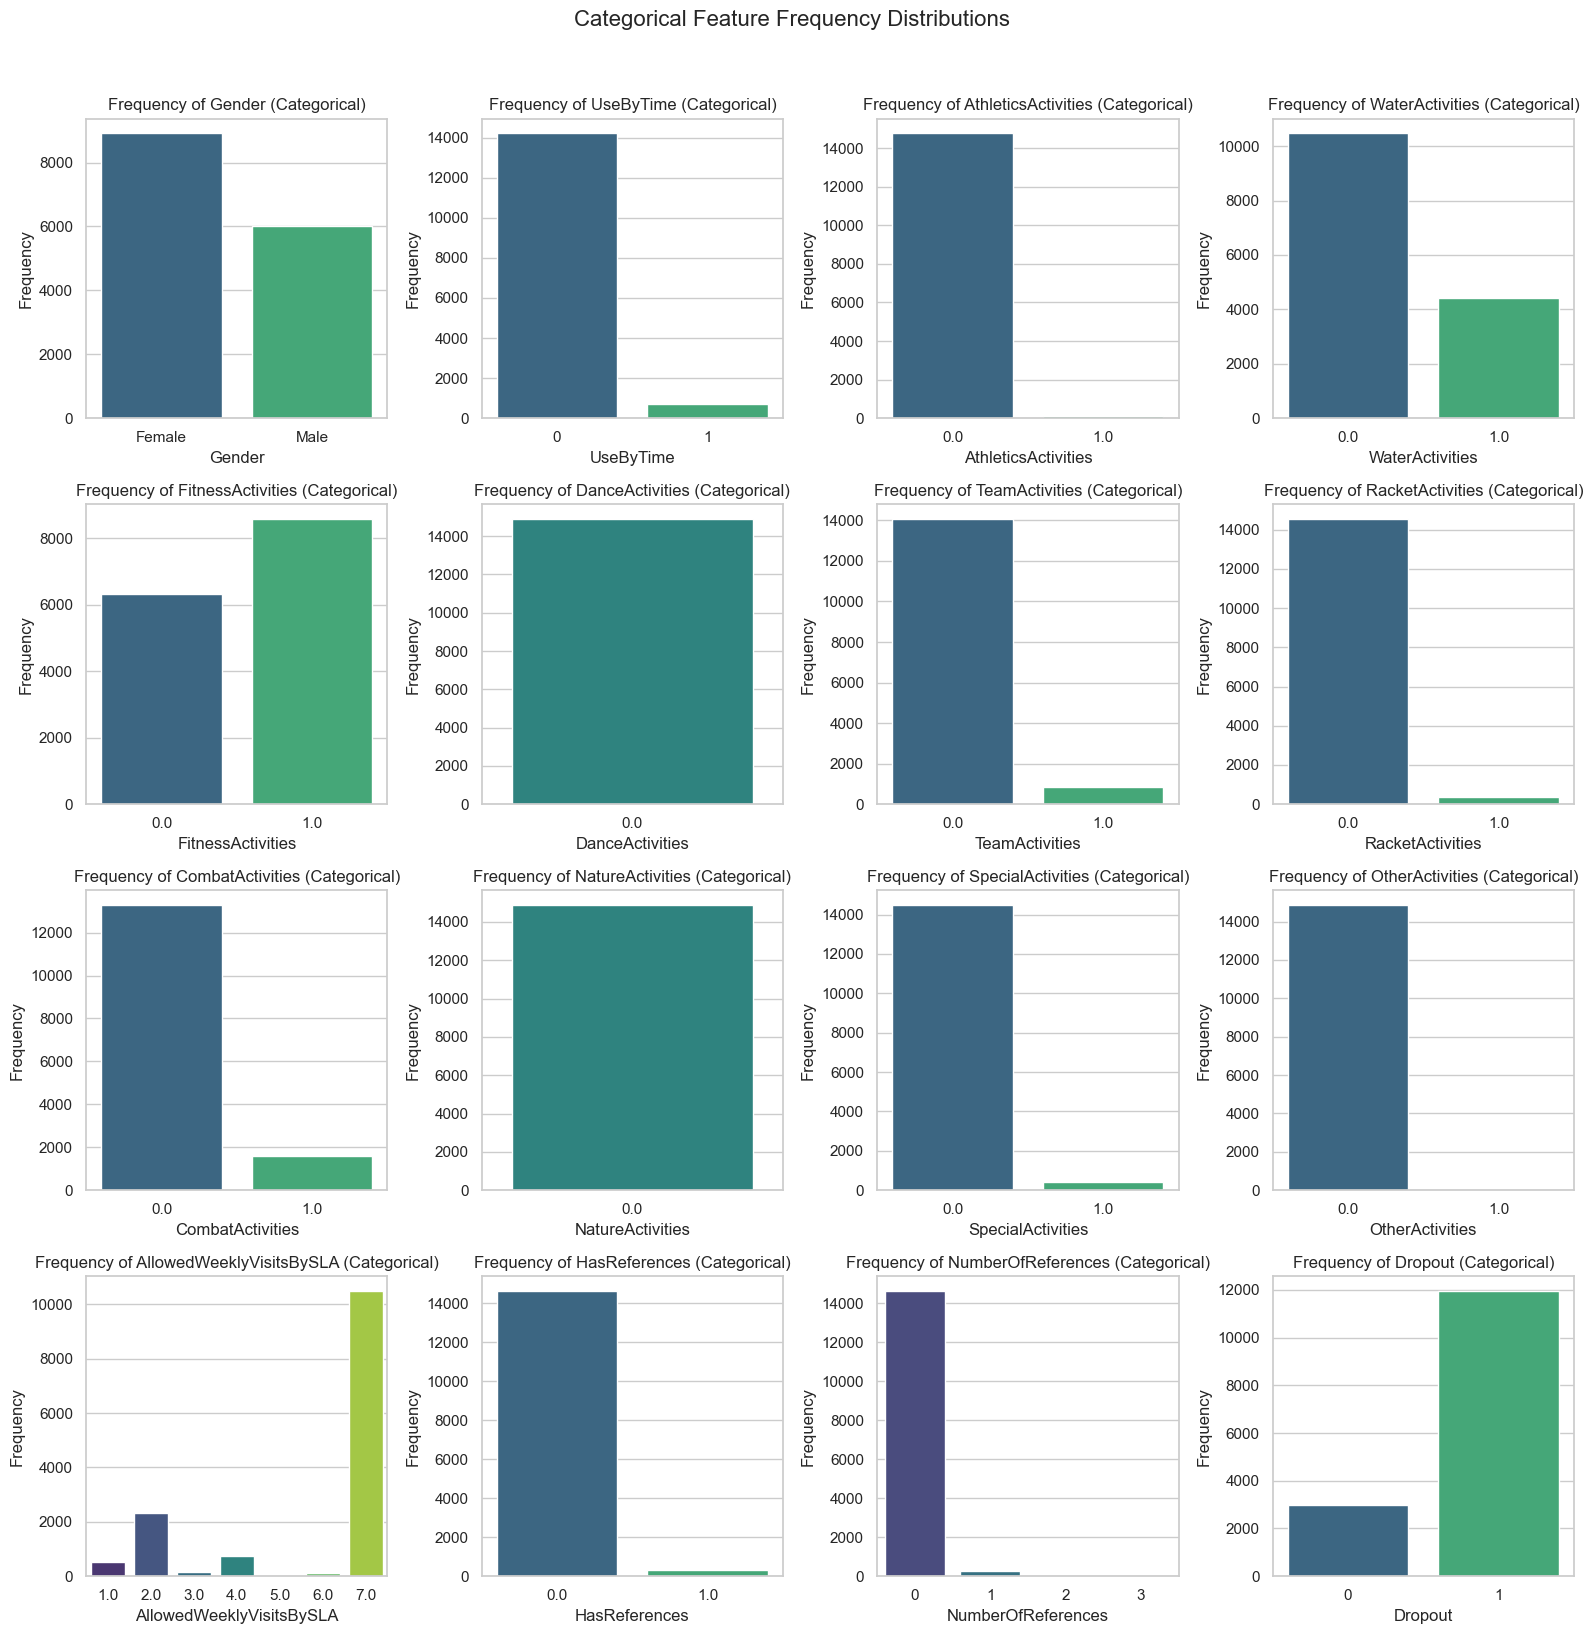

In [39]:
df_categorical = df_original.loc[:, ["Gender","UseByTime", "AthleticsActivities", "WaterActivities", "FitnessActivities", "DanceActivities",
                                         "TeamActivities", "RacketActivities", "CombatActivities",
                                         "NatureActivities", "SpecialActivities", "OtherActivities", 
                                         "AllowedWeeklyVisitsBySLA", "HasReferences", "NumberOfReferences", "Dropout"]]

sns.set(style="whitegrid")

subplots_per_row = 4
num_rows = (len(df_categorical.columns) + subplots_per_row - 1) // subplots_per_row

fig, axes = plt.subplots(num_rows, subplots_per_row, figsize=(16, 4 * num_rows))

axes = axes.flatten()

# Visualize frequency for each feature
for i, column in enumerate(df_categorical.columns):
    sns.countplot(x=column, data=df_categorical, palette="viridis", ax=axes[i])
    axes[i].set_title(f"Frequency of {column} (Categorical)")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Frequency")

plt.suptitle("Categorical Feature Frequency Distributions", y=1.02, fontsize=16)

plt.tight_layout()
plt.set_loglevel('WARNING') 
plt.show()

#### 1.4.3.  Spearman Correlation Matrix – Numerical and Ordinal features | Fig. 3.4.2.

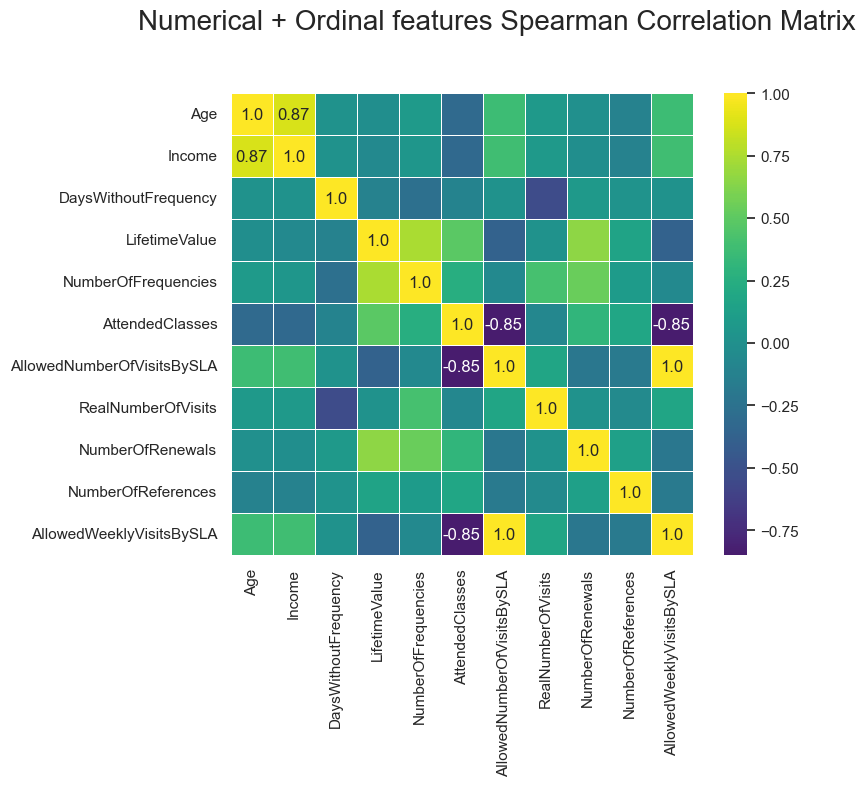

In [40]:
fig = plt.figure(figsize=(8, 6))

# Given we are using Spearman Correlation, it also makes sense to include the ordinal variable
feats = metric_features_original + ['AllowedWeeklyVisitsBySLA']

corr = np.round(df[feats].corr(method="spearman"), decimals=2)

# Only plot the correlation values if the value surpasses a 0.5 threshold
annotations = np.where(np.absolute(corr.values) >= 0.741, corr.values, np.full(corr.shape, ""))

# Change the colormap to viridis
sns.heatmap(data=corr, annot=annotations, cmap='viridis', fmt='s', center=0, square=True, linewidths=.5)

plt.suptitle("Numerical + Ordinal features Spearman Correlation Matrix", fontsize=20, y=1.02)
plt.show()

> **While examining Spearman correlations [Fig. ?], we observed that most of the variables showed moderate correlations. Two pairs of variables stood out: Income and Age, with a positive correlation of 0.87, and AllowedWeeklyVisitsBySLA and AttendedClasses, with a negative correlation of -0.85. The features NumberOfFrequencies and LifetimeValue also exhibited a positive correlation of 0.74, similar to AllowedNumberOfVisitsBySLA and AllowedWeeklyVisitsBySLA, which had a positive correlation of 0.69. Therefore, we decided that using Age and Income would be redundant, so we will soon drop one of them. Additionally, given that AllowedWeeklyVisitsBySLA is correlated not only with another variable but with two other variables, AttendedClasses and AllowedNumberOfVisitsBySLA, we will proceed to drop that one.** 

#### 1.4.3. Age VS  Types of Activities | Table 3.4.3.
Is there a clear association between age groups and preferred activities?

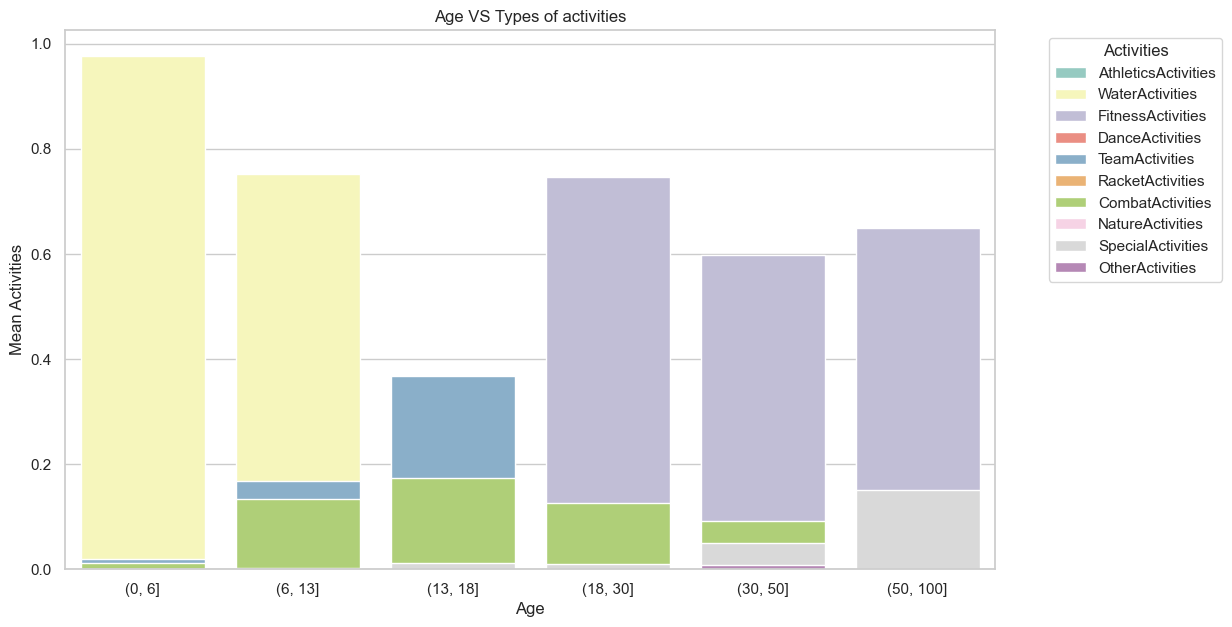

In [41]:
df_age_activities = df.copy()

df_age_activities['Age_binned'] = pd.cut(x=df['Age'], bins=[0, 6, 13, 18, 30, 50, 100])

plt.figure(figsize=(12, 7))

for i, activity in enumerate(activities_features):
    sns.barplot(x='Age_binned', y=activity, data=df_age_activities, color=sns.color_palette('Set3', n_colors=len(activities_features))[i], label=activity, ci = None)

plt.xlabel("Age")
plt.ylabel('Mean Activities')
plt.title("Age VS Types of activities")
plt.xticks(rotation=0)
plt.legend(title='Activities', bbox_to_anchor=(1.05, 1), loc='upper left')

sns.set(style="whitegrid", rc={"axes.grid": False})

plt.show()

> **The analysis of age-related activity preferences reveals distinct patterns. Water activities dominate among children, spanning from newborns to 13 years old, aligning with known benefits for children, specially newborns. Combat Activities show a small but notable presence until age 13, increas-ing in adolescence along with a rise in Team Activities.**

> **Teenagers exhibit a balanced interest in Combat and Team Activities. Young adults prioritize fitness activities, that persists beyond age 30 and continues through older age brackets. Notably, as individuals age, there is a gradual introduction of special activities. This also makes sense, as people begin to deal with certain limitations and disabilities as they get older.**


#### 1.4.4. Activity Types VS Count of Activities by Gender | Table 3.4.4.
1. Which activity types have the highest count of participants overall?
2. Are there specific activities that are more popular among both males and females?
3. Do certain activities show a significant difference in participation between males and females?
4. Can you identify activities that seem to attract participants equally from both genders?
5. Are there diverse preferences in activity participation, or do a few activities dominate the landscape for both genders?
6. For activities with low participation, are there notable differences in interest between males and females?
7. Are there activities that stand out as outliers in terms of participation for either males or females?

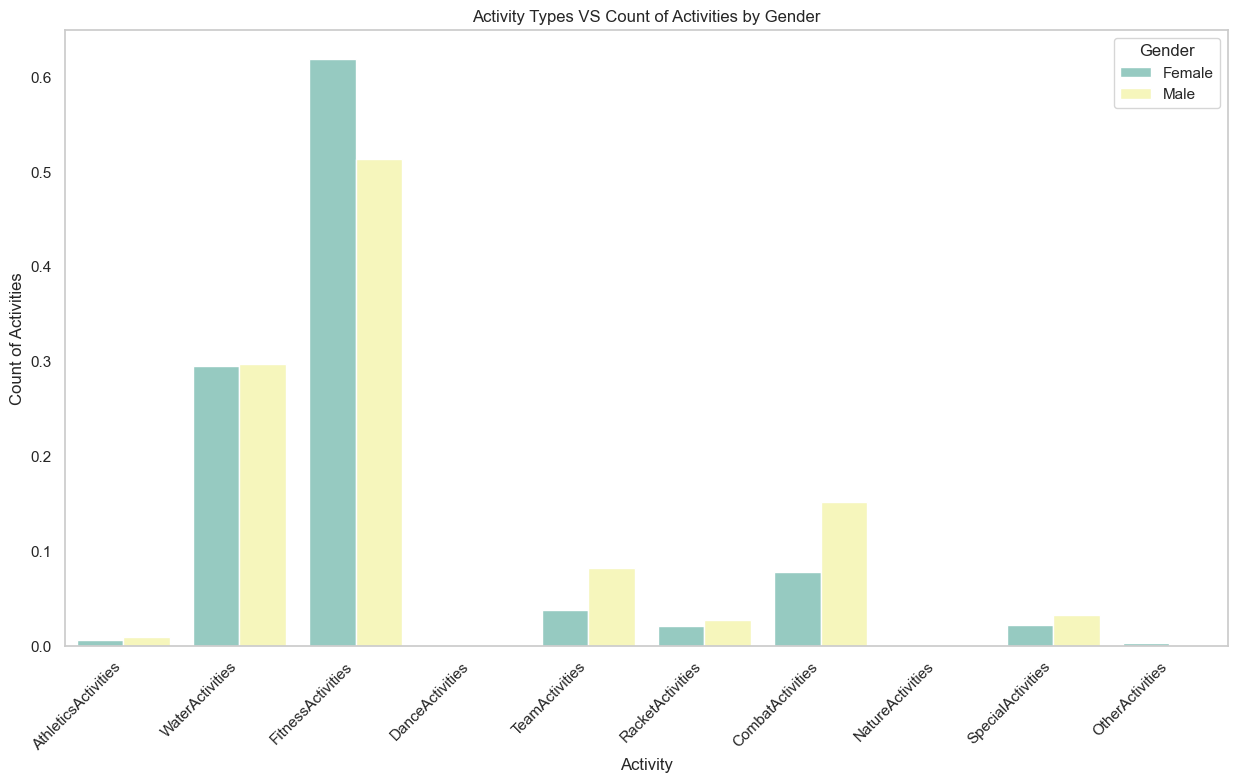

In [42]:
df_gender_activities = df.copy()

set3_palette = sns.color_palette('Set3', n_colors=2)

df_gender_activities_melted = pd.melt(df_gender_activities, id_vars='Gender', value_vars=activities_features, var_name='Activity', value_name='Activity_Count')

plt.figure(figsize=(15, 8))
sns.barplot(x='Activity', y='Activity_Count', hue='Gender', data=df_gender_activities_melted, palette='Set3', ci=None)

plt.xlabel("Activity")
plt.ylabel('Count of Activities')
plt.title("Activity Types VS Count of Activities by Gender")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender', labels=['Female', 'Male'])

plt.show()

> **Here we can clearly see the dominance of fitness activities among other activities, followed by water activities, which also have a significant presence but with around half of the overall participations compared to fitness. Thus, fitness and water activities emerge as the highest-participation categories overall. Even though fitness stands out as more popular among both genders, it has a bigger emphasis on female engagement. Finally, athletics, water, and racket sports show a balanced participation between both genders.**

#### 1.4.4. Age VS Lifetime Value | Table 3.4.5.

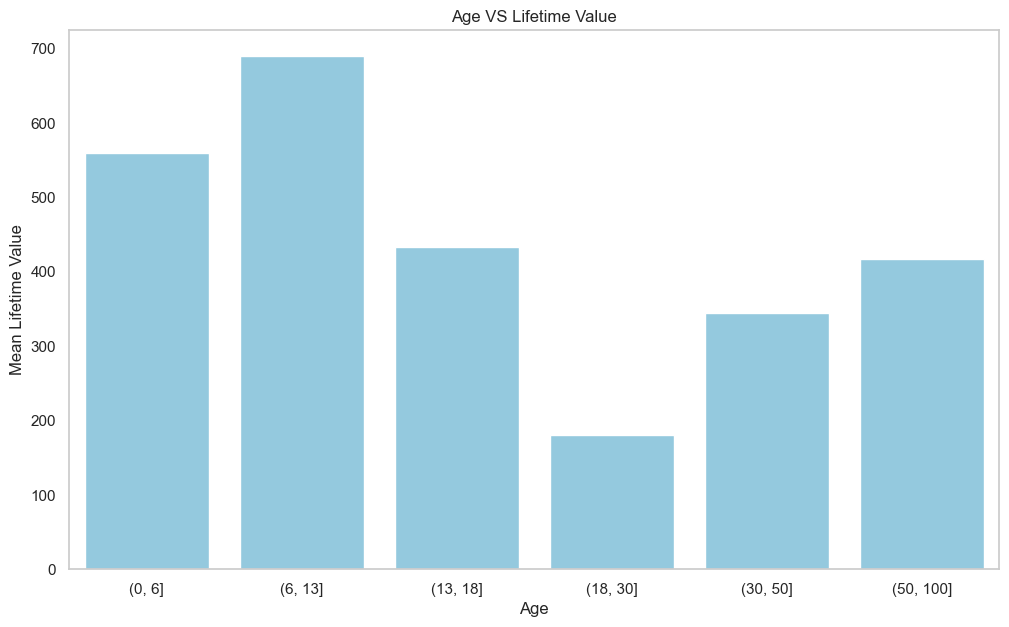

In [43]:
df_age_lifetimevalue = df.copy()

# Bin the age variable
df_age_lifetimevalue['Age_binned'] = pd.cut(x=df['Age'], bins=[0, 6, 13, 18, 30, 50, 100])

# Create a bar plot using Seaborn with a different colormap
plt.figure(figsize=(12, 7))

# Bar plot for LifetimeValue
sns.barplot(x='Age_binned', y='LifetimeValue', data=df_age_lifetimevalue, color='skyblue', ci = None)

plt.xlabel("Age")
plt.ylabel('Mean Lifetime Value')
plt.title("Age VS Lifetime Value")
plt.xticks(rotation=0)

# Set the Seaborn style for the plot
sns.set(style="whitegrid", rc={"axes.grid": False})

# Show the plot
plt.show()

> **Insights from lifetime values reveal a notable peak around 690 in the 7-13 age group, followed by values around 560 in the 0-6 age group. Members aged 14-18, 31-50, and 51-100 show moderate values (around 430, 360, and 420, respectively), suggesting consistent but slightly lower impact. Notably, the 19-30 age range exhibits lower lifetime values (around 185), highlighting potential areas for strategic improvement.**

## 2. Data Preprocessing <a class="anchor" id="datapreprocessing"></a>

### 2.1. Outliers<a class="anchor" id="outliers"></a>

#### Numeric Variables' Box Plots before Outlier Removal | Fig. 4.1.1.

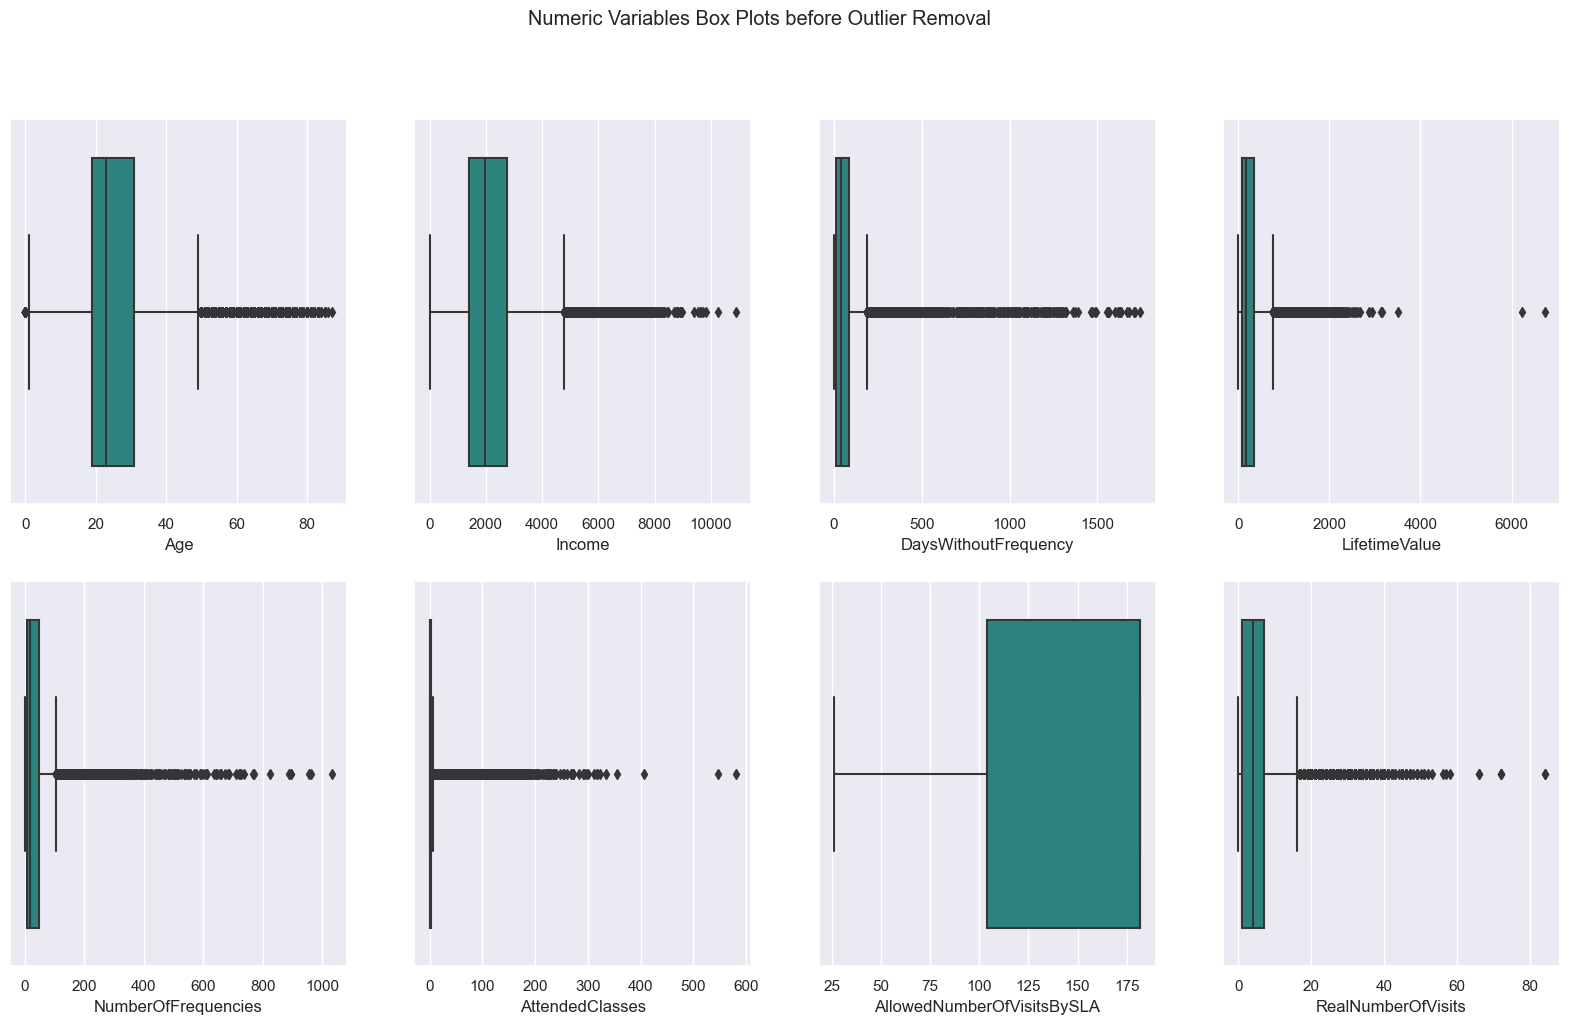

In [44]:
sns.set()

fig, axes = plt.subplots(2, math.ceil(len(metric_features_original) / 3), figsize=(20, 11))

for ax, feat in zip(axes.flatten(), metric_features_original):
    sns.boxplot(x=df[feat], ax=ax, palette='viridis')
    
title = "Numeric Variables Box Plots before Outlier Removal"

plt.suptitle(title)
plt.savefig("boxplot_after.png")
plt.show()

> **We started by a general overview of the outtliers of our metric features using boxplots [Fig. 4.1.1]. It's pretty clears that our dataset is full of outliers.**

#### 2.1.1. Remove Outliers Manually | Fig. 4.1.1.

#### 2.1.1.1. Numerical features

> **Since we can remove outliers manually, we started by looking at our data [Fig. 4.1.1] and discard the values that didn't represent well the general members of the fitness center. The percentage of data removed was 2,05%, an acceptable value.**

> **We don't filter on income because that is a variable that will be removed from our analysis since it's highly correlated with Age. For our purpose of clustering Age gives more insight than Income.**

In [45]:
filters1 = (
    (df["Income"] <= 8000)
    &
    (df["DaysWithoutFrequency"] <= 1400)
    &
    (df["LifetimeValue"] <= 2800)
    &
    (df['NumberOfFrequencies']<=600)
    &
    (df['AttendedClasses']<=400)
    &
    (df['RealNumberOfVisits']<=55)
)

df_out_manual = df[filters1]

In [46]:
print('Percentage of data kept after removing outliers manually:', np.round((df_out_manual.shape[0] / df.shape[0])*100, 2),"%")

Percentage of data kept after removing outliers manually: 98.15 %


#### 2.1.2. Remove Outliers with IQR | Fig. 4.1.1.

In [47]:
df[metric_features_original].drop(columns = "Income", inplace = True)

q25 = df[metric_features_original].quantile(.25)
q75 = df[metric_features_original].quantile(.75)
iqr = (q75 - q25)

upper_lim = q75 + 4.5 * iqr
lower_lim = q25 - 4.5 * iqr

filters = []
for metric in metric_features_original:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters.append(df[metric].between(llim, ulim, inclusive='both') | df[metric].isna())

df_out_iqr = df[np.all(filters, 0)]

print('Percentage of data kept after removing outliers using IQR:', np.round((df_out_iqr.shape[0] / df.shape[0])*100, 2), "%")

Percentage of data kept after removing outliers using IQR: 79.9 %


#### 2.1.3. Remove Outliers with Z-score

In [48]:
#z_scores = np.abs(stats.zscore(df[metric_features], axis=1))

#z_scores[z_scores < 3].count()

#filters_z = (z_scores < 3).all(axis=1)

#df_out_zscore = df[filters_z]

#print('Percentage of data kept after removing outliers using Z-score:', np.round((df_out_zscore.shape[0] / df.shape[0])*100, 2),"%")

#### Metric features distributions after outliers removal manually | Fig. 4.1.?

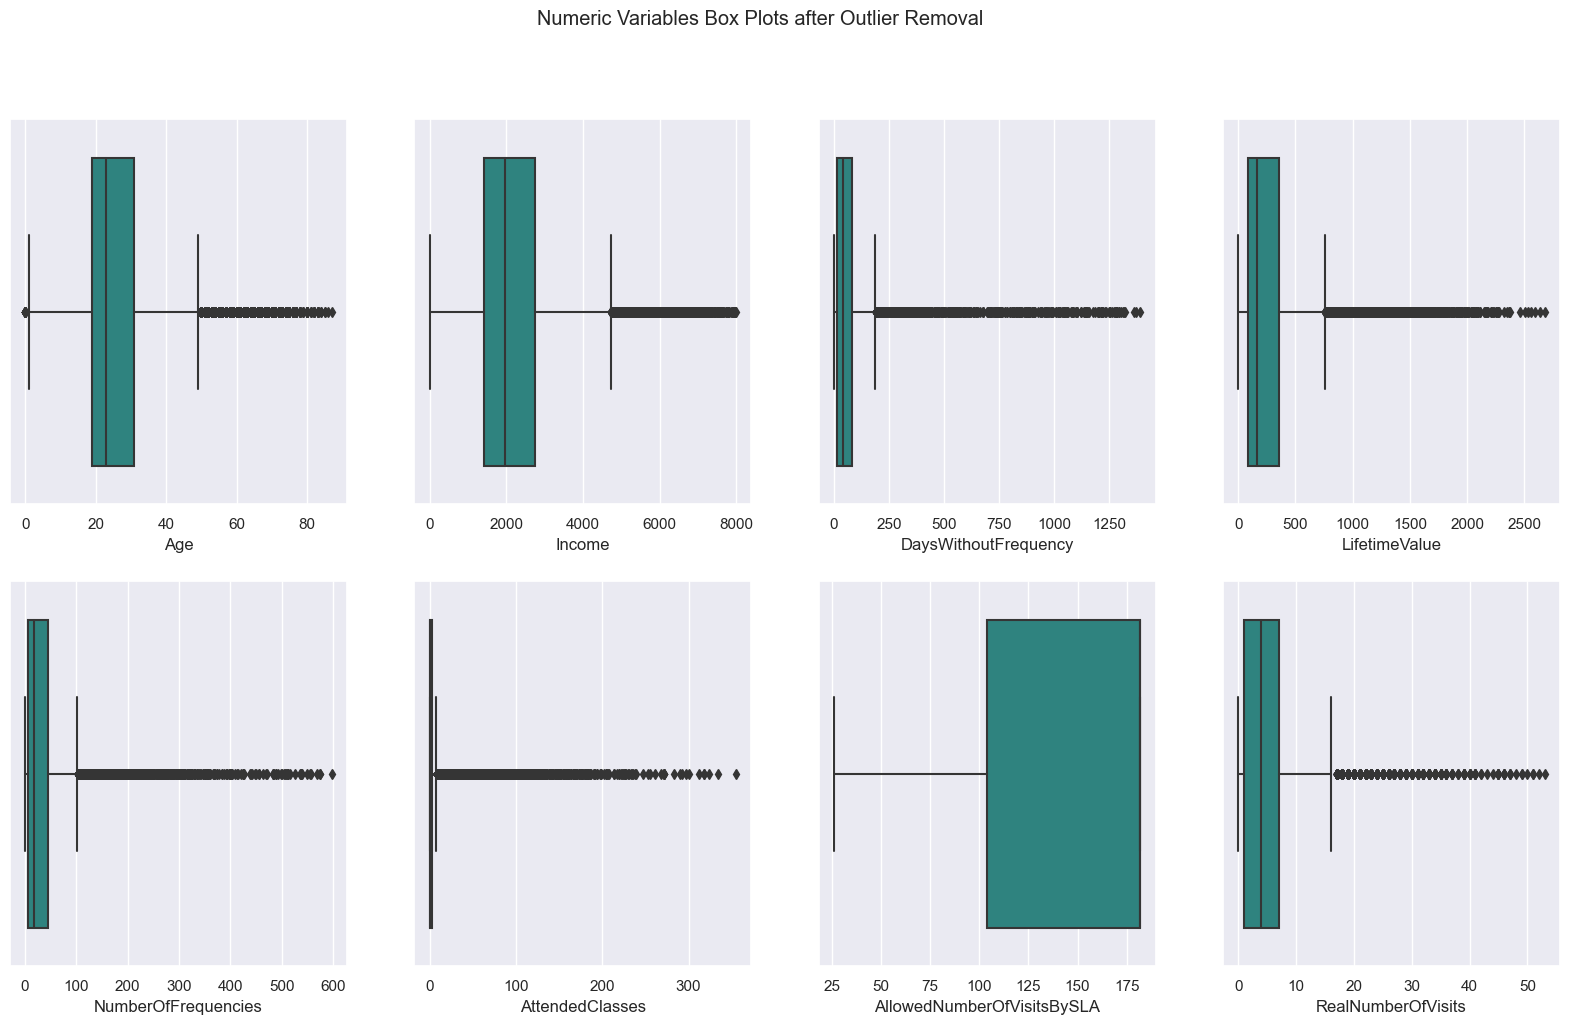

In [49]:
sns.set()

fig, axes = plt.subplots(2, math.ceil(len(metric_features_original) / 3), figsize=(20, 11))

for ax, feat in zip(axes.flatten(), metric_features_original):
    sns.boxplot(x=df_out_manual[feat], ax=ax, palette='viridis')
    
title = "Numeric Variables Box Plots after Outlier Removal"

plt.suptitle(title)
plt.savefig("boxplot_after.png")
plt.show()

#### Metric features distributions after outliers removal using Z-Score | Fig. 4.1.?

In [50]:
#sns.set()

#fig, axes = plt.subplots(2, math.ceil(len(metric_features) / 3), figsize=(20, 11))

#for ax, feat in zip(axes.flatten(), metric_features):
 #   sns.boxplot(x=df_out_zscore[feat], ax=ax, palette='viridis')
    
#title = "Numeric Variables Box Plots after Outlier Removal using Z-Score"

#plt.suptitle(title)
#plt.savefig("boxplot_after.png")
#plt.show()

In [51]:
#df[metric_features].drop(columns = "Income", inplace = True)

#z_scores = np.abs(stats.zscore(df[metric_features], axis=1))

#z_scores[z_scores < 3].count()

#filters_z = (z_scores < 3).all(axis=1)

#df_out = df[filters_z]

#print('Percentage of data kept after removing outliers:', np.round((df_out.shape[0] / df.shape[0])*100, 2),"%")

> I made the code related to Z-Score appear as comment because I believe we shouln't use this method since it is directed to normal distributions, which is not our case.

In [52]:
# Apply method choosen to remove outliers from our dataframe
# df = df_out_manual

#### 2.1.1.2. Non-numerical features

> **Our categorical variables are mostly boolean, so there are no outliers.**

# 2.2. Feature engineering<a class="anchor" id="featureengineering"></a>

To improve customer segmentation, we analyzed raw data and created new features to better understand patterns and enhance insights.

##### Type conversion of dates for feature engineering

In [53]:
df['EnrollmentFinish'] = pd.to_datetime(df['EnrollmentFinish'])
df['EnrollmentStart'] = pd.to_datetime(df['EnrollmentStart'])
df['DateLastVisit'] = pd.to_datetime(df['DateLastVisit'])

#### 2.2.1. AgeGroup
Separate members in age the following age groups.

age_labels = ["Children", "Teens", "Young Adults", "Middle-Aged Adults", "Seniors"]  

In [54]:
age_bins = [0, 12, 19, 39, 59, 90] 
age_labels = ["Children", "Teenagers", "Young Adults", "Adults", "Seniors"]  
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

df[['Age', 'AgeGroup']]

Age      AgeGroup
0       60       Seniors
1       29  Young Adults
2       23  Young Adults
3        9      Children
4       35  Young Adults
...    ...           ...
14937   14     Teenagers
14938   39        Adults
14939   20  Young Adults
14940   55        Adults
14941   32  Young Adults

[14938 rows x 2 columns]

#### 2.2.2. MembershipDuration
Calculate the duration of membership in days.

In [55]:
df['MembershipDuration'] = df['EnrollmentFinish'] - df['EnrollmentStart']+pd.Timedelta(days=1)
df['MembershipDuration'] = df['MembershipDuration'].dt.days

# Display the first few rows of the DataFrame with the specified columns
print(df[['EnrollmentStart', 'EnrollmentFinish', 'MembershipDuration']].head())

  EnrollmentStart EnrollmentFinish  MembershipDuration
0      2019-09-03       2019-10-31                  59
1      2014-08-12       2015-09-14                 399
2      2017-05-02       2017-06-01                  31
3      2018-09-05       2019-02-12                 161
4      2016-04-20       2018-06-07                 779


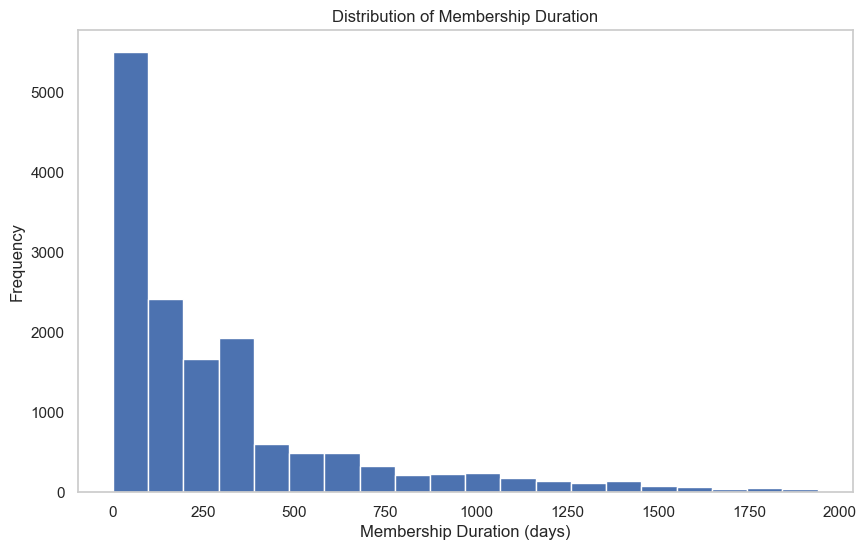

In [56]:
sns.set(style="whitegrid", rc={"axes.grid": False})

# Plotting the histogram for Membership Duration with default colormap and white grid
plt.figure(figsize=(10, 6))
plt.hist(df['MembershipDuration'], bins=20, edgecolor='white')

# Adding labels and title
plt.xlabel('Membership Duration (days)')
plt.ylabel('Frequency')
plt.title('Distribution of Membership Duration')

# Show the plot
plt.show()

In [57]:
df.drop(columns=datetime_features, inplace=True)

#### 2.2.3. MonthlyVisits
This variable represents the average number of visits a customer makes to the sports facility on a monthly basis.

In [58]:
df['MonthlyVisits'] = (df['NumberOfFrequencies'] / (df['MembershipDuration'] / 30))

print(df[['NumberOfFrequencies', 'MembershipDuration', 'MonthlyVisits']].head())

   NumberOfFrequencies  MembershipDuration  MonthlyVisits
0                  9.0                  59       4.576271
1                 23.0                 399       1.729323
2                  6.0                  31       5.806452
3                 20.0                 161       3.726708
4                 41.0                 779       1.578947


#### 2.2.4. MonthlySpending 

In [59]:
df['MonthlySpending'] = (df['LifetimeValue'] / (df['MembershipDuration'] / 30)).round(2)

# Display the first few rows of the DataFrame with the specified columns
print(df[['LifetimeValue', 'MonthlySpending']].head())

   LifetimeValue  MonthlySpending
0          89.35            45.43
1         479.20            36.03
2          37.60            36.39
3         155.40            28.96
4         373.20            14.37


#### 2.2.5. TotalActivities

The TotalActivities variable counts the number of activities in which the customer participated.

In [60]:
df_specified_activities = df[activities_features].drop("OtherActivities", axis=1)
df['TotalActivities'] = df_specified_activities.sum(axis=1)

print(df['TotalActivities'].head())

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: TotalActivities, dtype: float64


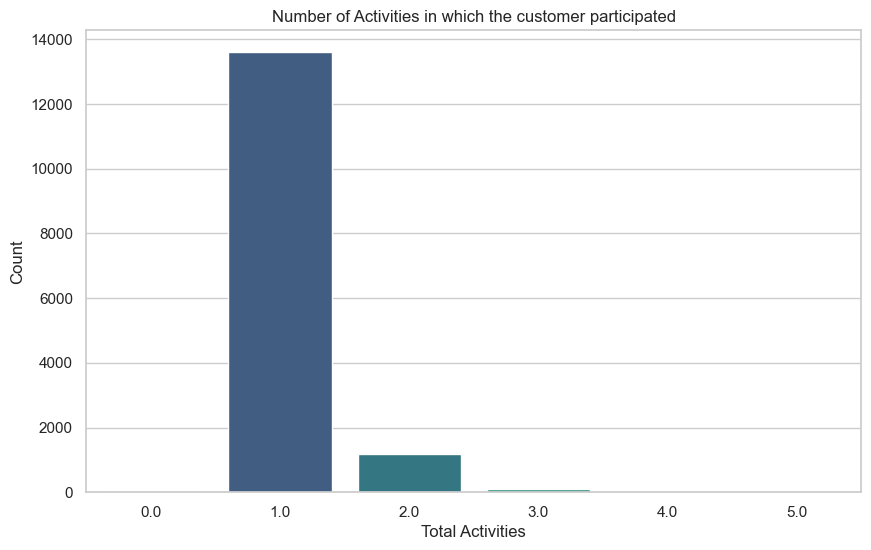

In [61]:
#Set the style for the plot
sns.set(style='whitegrid')

#Create a bar plot for the TotalActivitiesParticipated variable
plt.figure(figsize=(10, 6))
sns.countplot(x='TotalActivities', data=df, palette='viridis')

#Set plot title and labels
plt.title('Number of Activities in which the customer participated')
plt.xlabel('Total Activities')
plt.ylabel('Count')

#Show the plot
plt.show()

##### Add the created features

In [62]:
metric_features = metric_features_original.copy()

In [63]:
metric_features.append('MembershipDuration')
metric_features.append('MonthlyVisits')
metric_features.append('MonthlySpending')
metric_features.append('TotalActivities')
non_metric_features.append('AgeGroup')
categorical_features.append('AgeGroup')
metric_features.remove('Age')

# 2.3. Transforming skewed data<a class="anchor" id="skewed_data"></a>

#### 2.3.1. Distribution of metric features before transformations

In the histograms displayed below, we can notice that when it comes to numerical features, we are essentialy dealing with right-skewed data. In certain cases, clustering algorithms may be sensitive to the skewed nature of the data, as they might assign more weight or importance to the denser region of lower values, potentially neglecting the tail. Transforming the data, such as through log transformations, can sometimes help mitigate this issue by compressing the scale of the higher values and providing a more balanced representation.

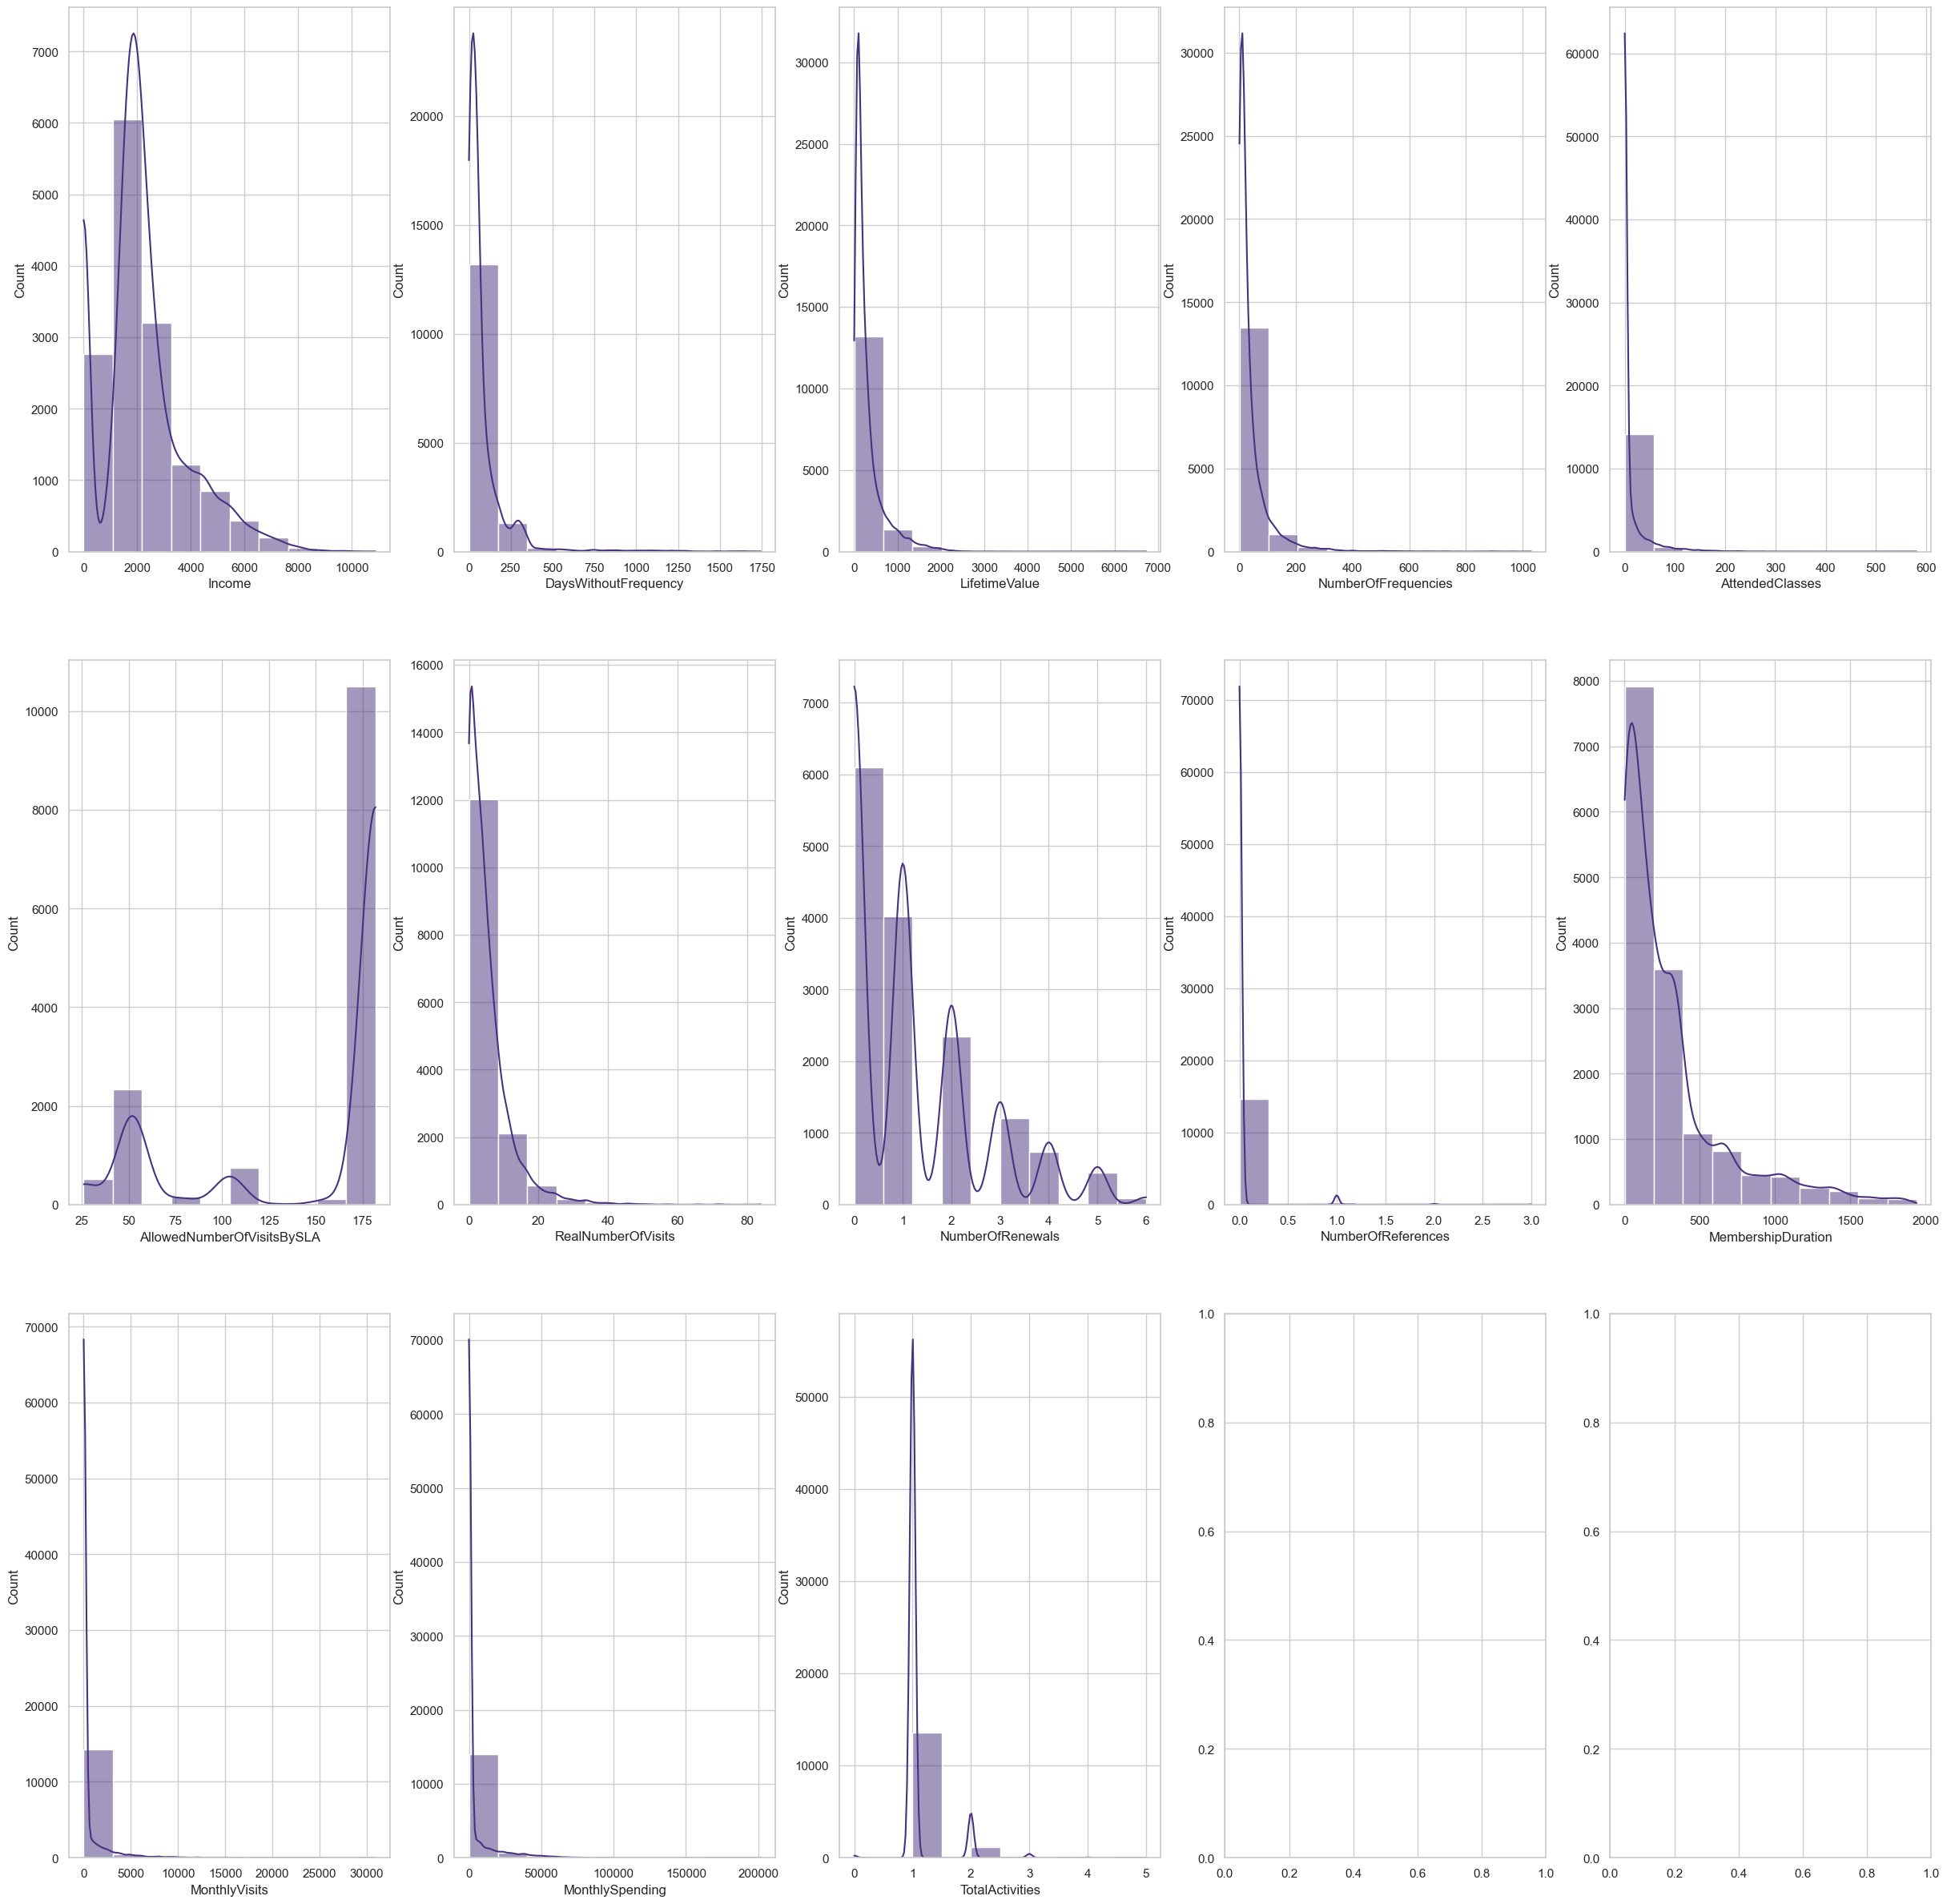

In [64]:
sns.set(style="whitegrid", palette="viridis")

fig, axes = plt.subplots(3, ceil(len(metric_features) / 3), figsize=(30, 30))

for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.histplot(df[feat],bins=10, kde=True , legend=False, ax = ax)

#### 2.3.2. Skewness of metric features

We assessed the skewness measure for each feature, with values exceeding 1 or falling below -1 indicating a highly right or left-skewed distribution, respectively. To align features more closely with a normal distribution, potential transformations include square and cube root, and log conversions.

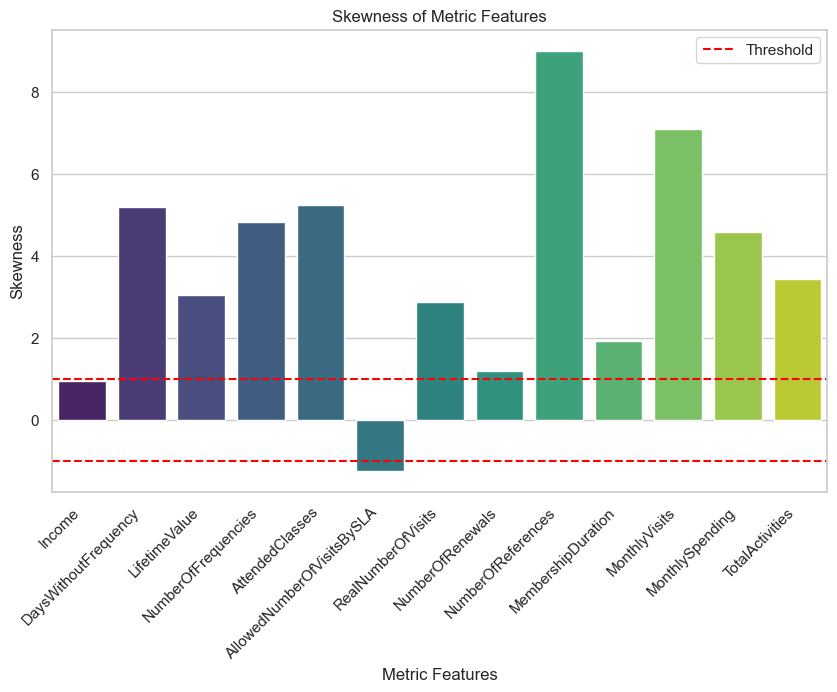

In [65]:
skewness = df[metric_features].skew(axis=0)

threshold = 1.0  

mask = np.abs(skewness) > threshold

colors = np.where(mask, 'orange', 'gray')

plt.figure(figsize=(10, 6))
sns.barplot(x=skewness.index, y=skewness, palette='viridis')
plt.axhline(y=threshold, color='red', linestyle='--', label='Threshold')
plt.axhline(y=-threshold, color='red', linestyle='--')
plt.xticks(rotation=45, ha='right')
plt.title('Skewness of Metric Features')
plt.xlabel('Metric Features')
plt.ylabel('Skewness')
plt.legend()
plt.show()

In [66]:
def get_transformation(skewness):
    transformations = []

    for skew in skewness:
        if abs(skew) < 0.5:
            transformations.append("No Transformation")
        elif skew >= 0.5:
            transformations.append("Square Root or Cube Root Transformation")
        elif skew <= -0.5:
            transformations.append("Logarithmic or Box-Cox Transformation")

    return transformations

# Assuming df is your DataFrame and metric_features is the list of metric features
skew_values = df[metric_features].skew(axis=0)
transformation_table = pd.DataFrame({
    'Feature': metric_features,
    'Skewness': skew_values,
    'Recommended Transformation': get_transformation(skew_values)
})

# Print a more concise output
transformation_table[['Feature', 'Skewness', 'Recommended Transformation']]


Feature  Skewness  \
Income                                          Income  0.956279   
DaysWithoutFrequency              DaysWithoutFrequency  5.195846   
LifetimeValue                            LifetimeValue  3.054136   
NumberOfFrequencies                NumberOfFrequencies  4.825340   
AttendedClasses                        AttendedClasses  5.250247   
AllowedNumberOfVisitsBySLA  AllowedNumberOfVisitsBySLA -1.229342   
RealNumberOfVisits                  RealNumberOfVisits  2.872745   
NumberOfRenewals                      NumberOfRenewals  1.198266   
NumberOfReferences                  NumberOfReferences  9.008162   
MembershipDuration                  MembershipDuration  1.937027   
MonthlyVisits                            MonthlyVisits  7.092846   
MonthlySpending                        MonthlySpending  4.579024   
TotalActivities                        TotalActivities  3.434918   

                                         Recommended Transformation  
Income                      Square Root or Cube Root Transformation  
DaysWithoutFrequency        Square Root or Cube Root Transformation  
LifetimeValue               Square Root or Cube Root Transformation  
NumberOfFrequencies         Square Root or Cube Root Transformation  
AttendedClasses             Square Root or Cube Root Transformation  
AllowedNumberOfVisitsBySLA    Logarithmic or Box-Cox Transformation  
RealNumberOfVisits          Square Root or Cube Root Transformation  
NumberOfRenewals            Square Root or Cube Root Transformation  
NumberOfReferences          Square Root or Cube Root Transformation  
MembershipDuration          Square Root or Cube Root Transformation  
MonthlyVisits               Square Root or Cube Root Transformation  
MonthlySpending             Square Root or Cube Root Transformation  
TotalActivities             Square Root or Cube Root Transformation

Since none of the metric features has a skewed value close to 0, we need to apply transformation to all of them.

##### 2.3.2.1.  Square and cube root transformation 

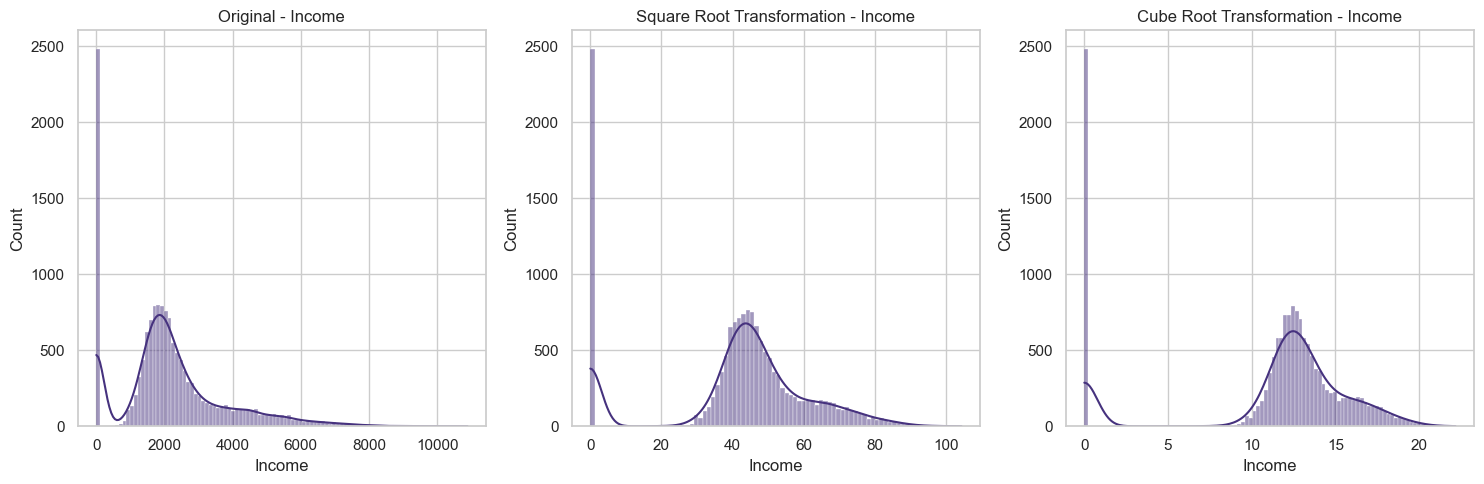

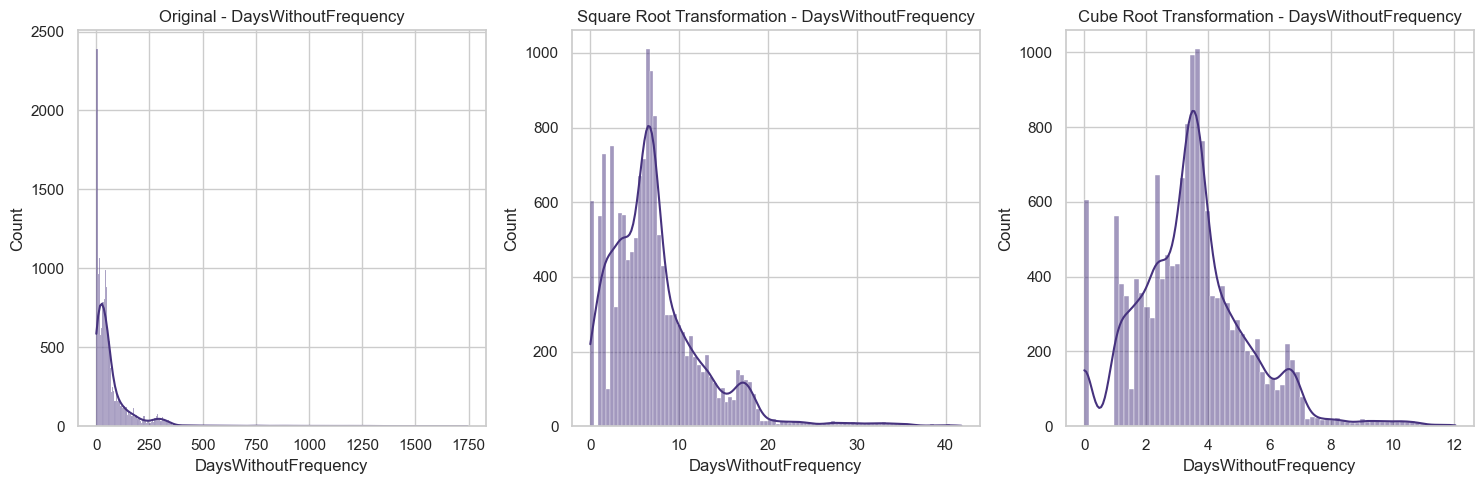

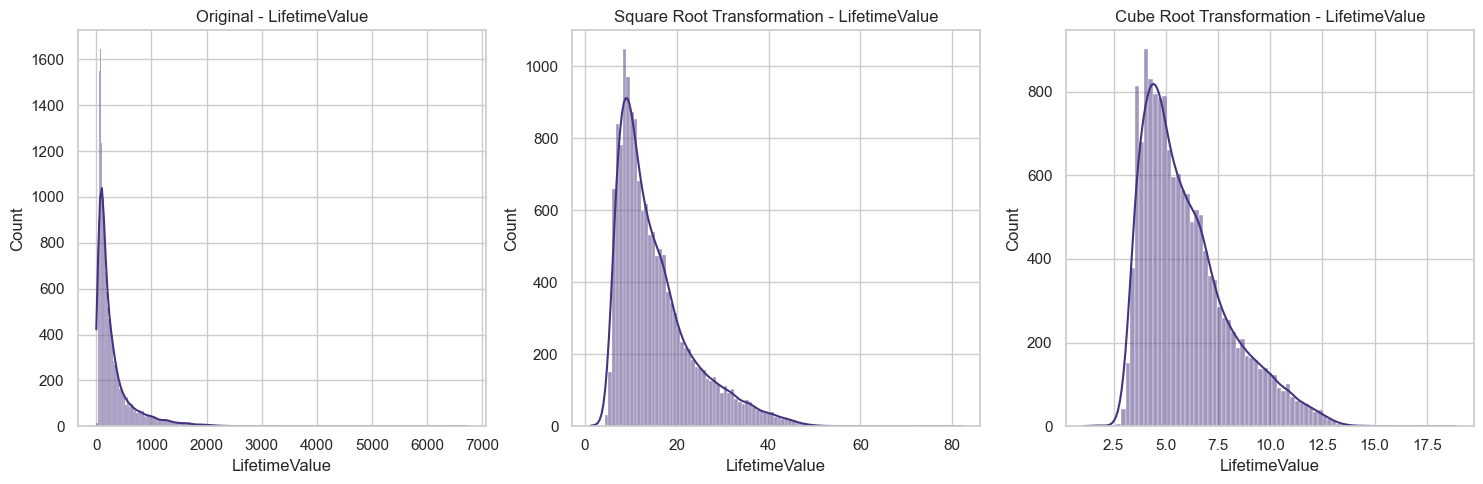

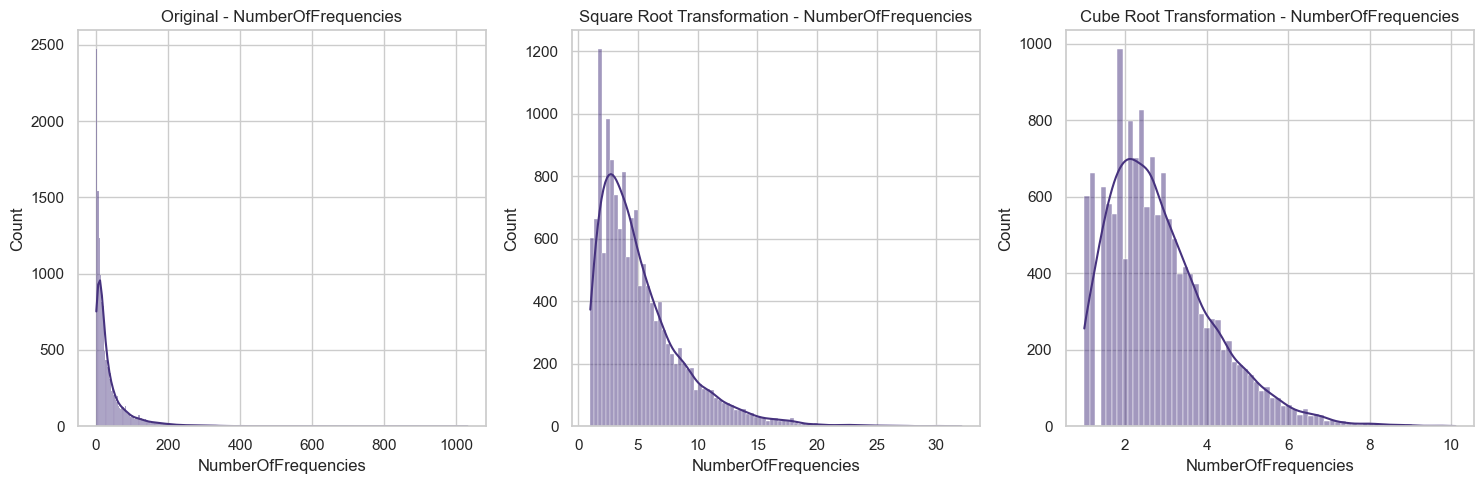

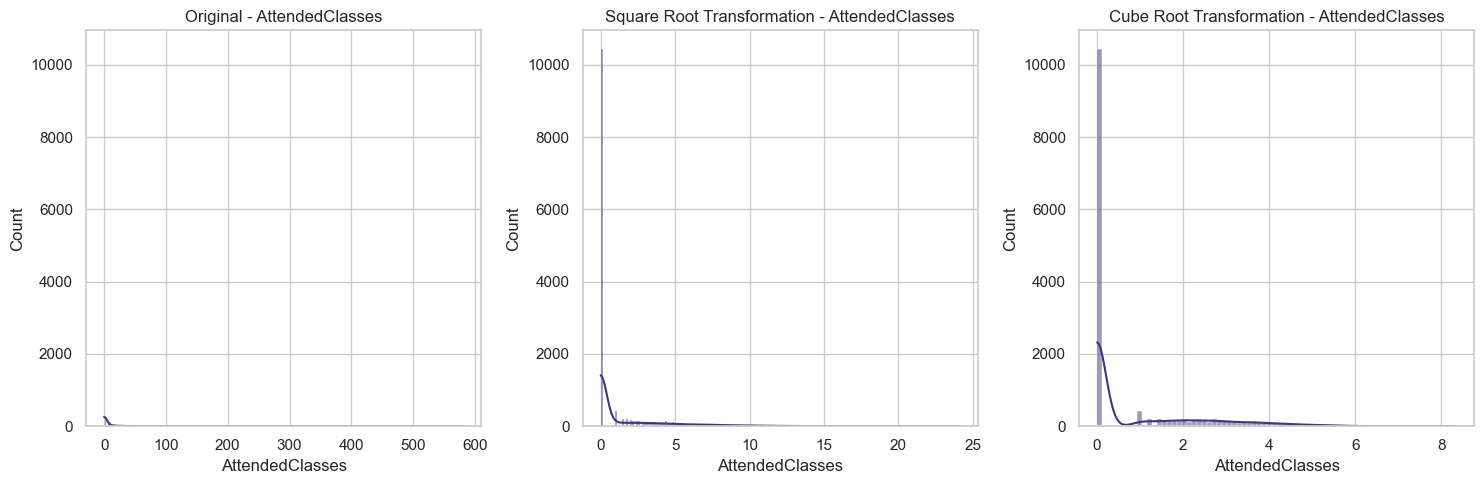

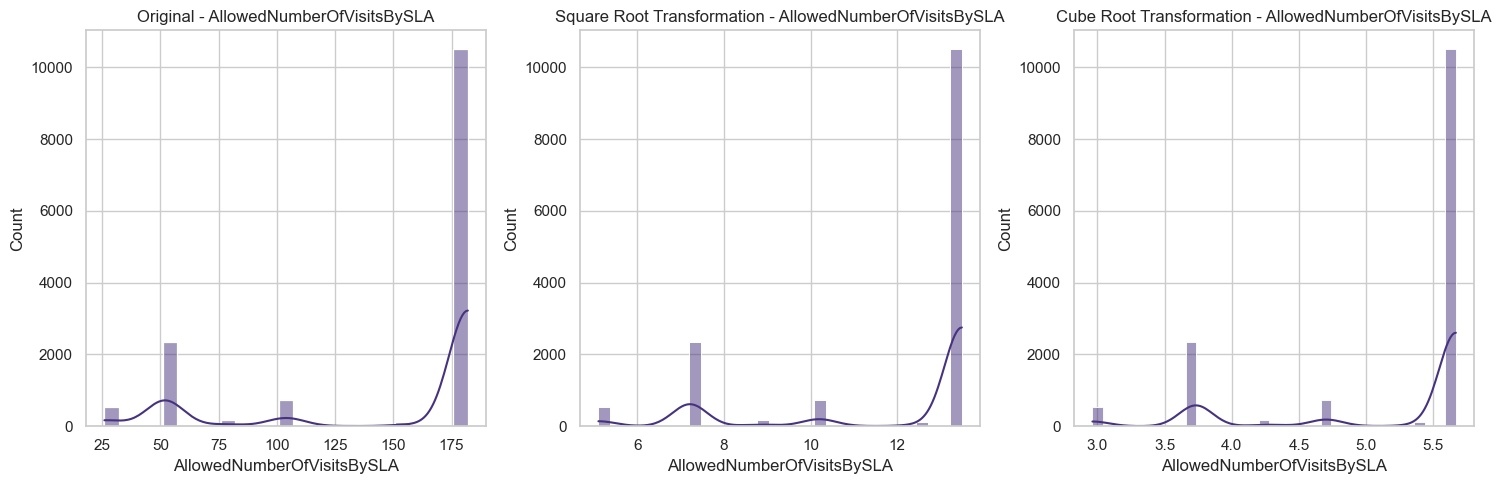

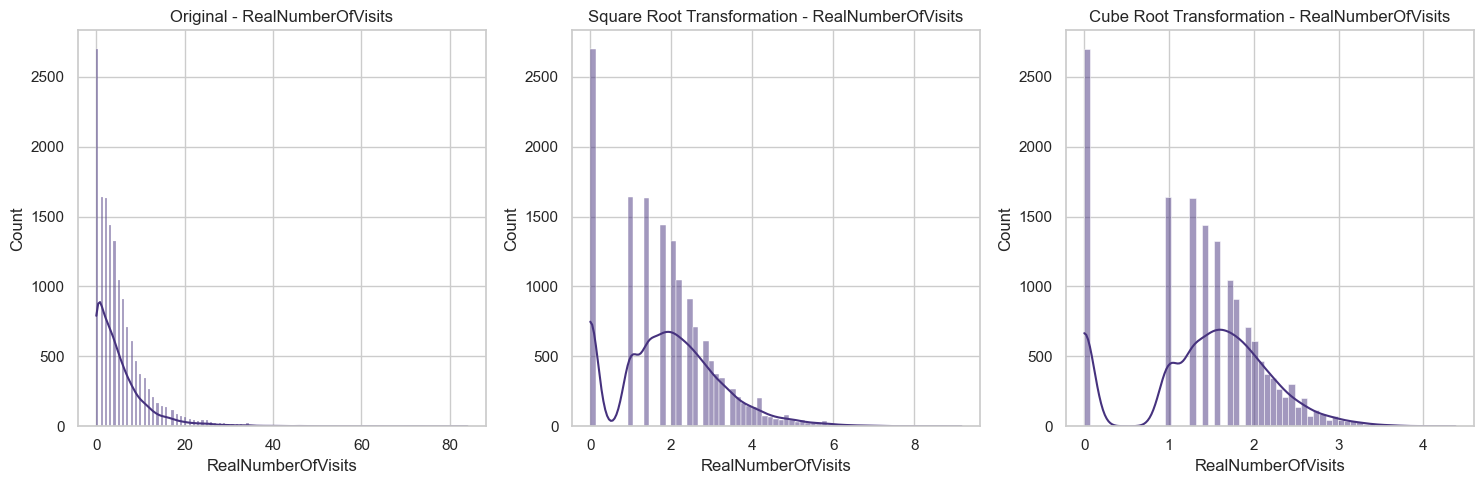

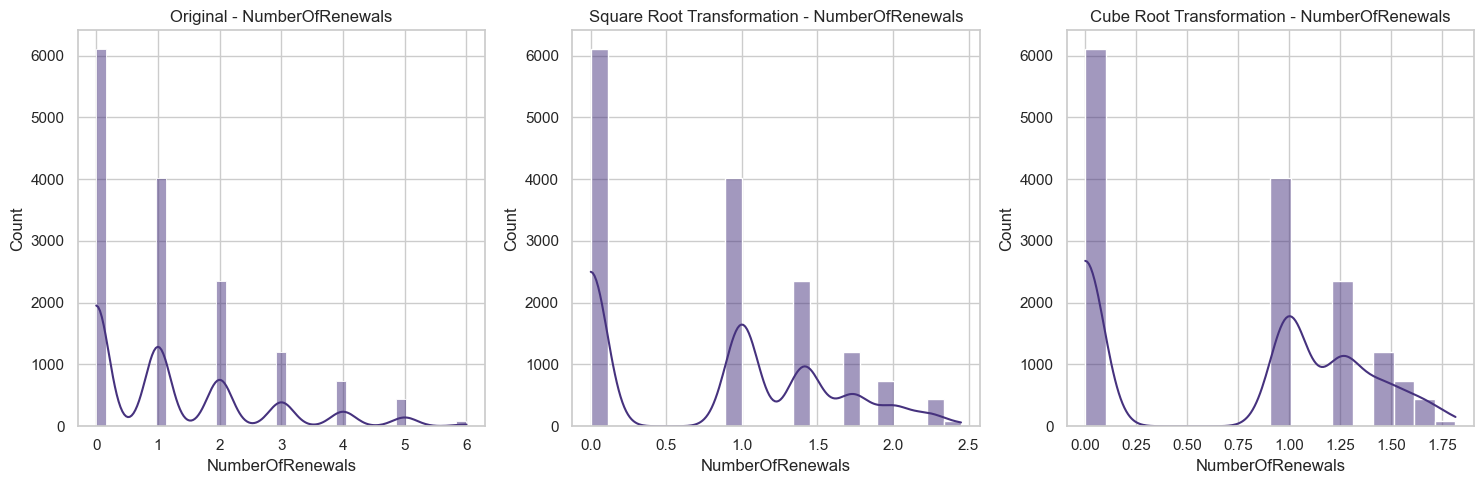

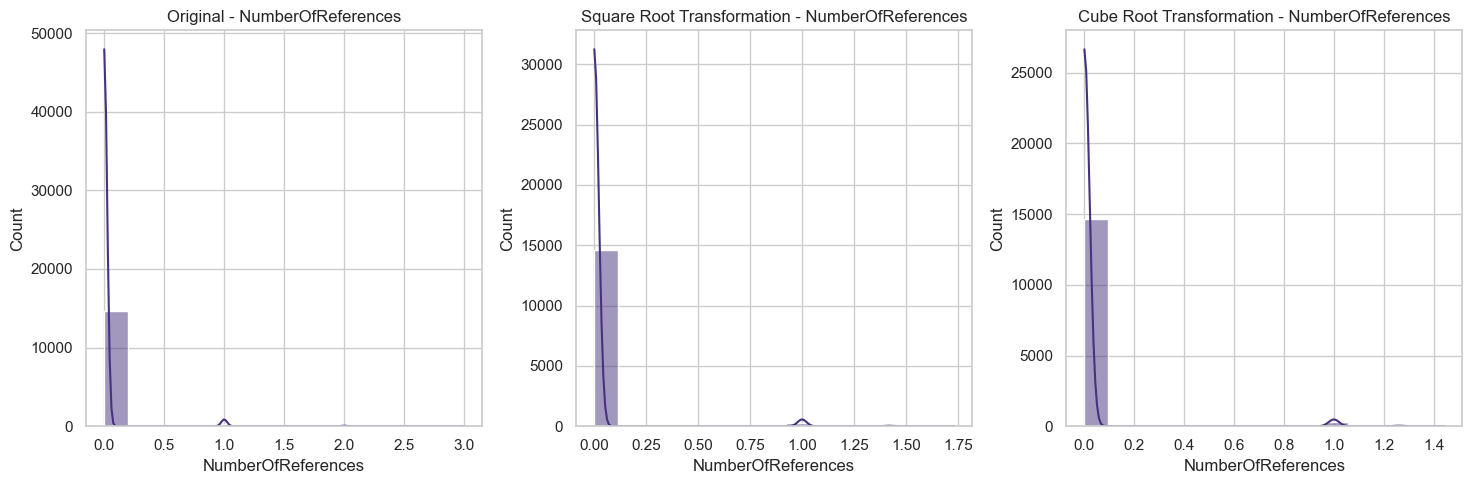

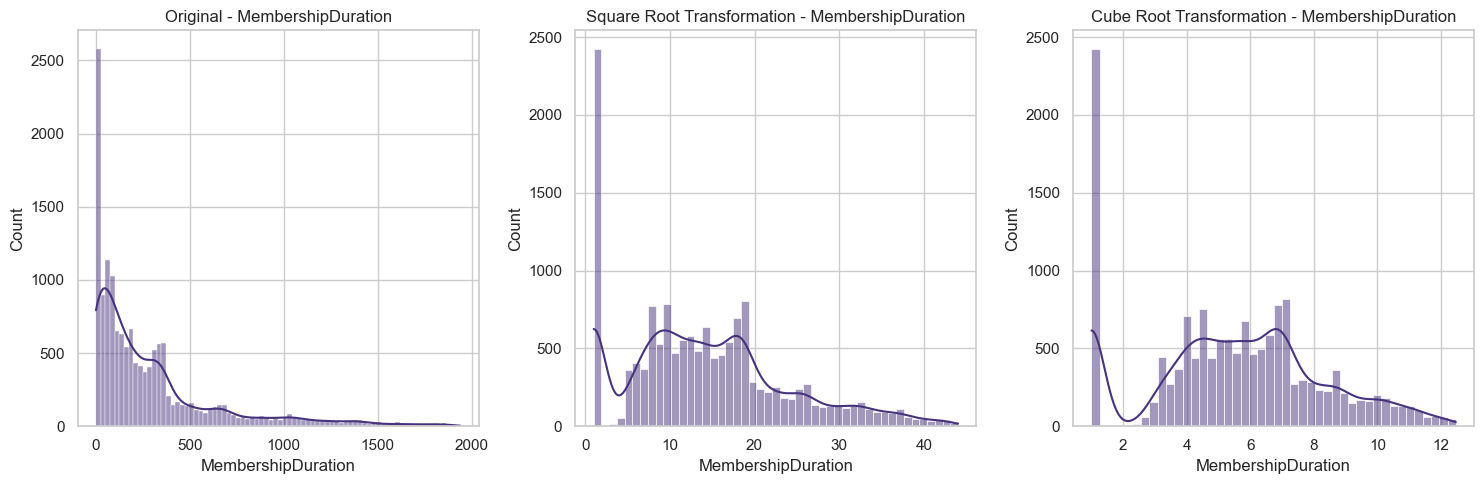

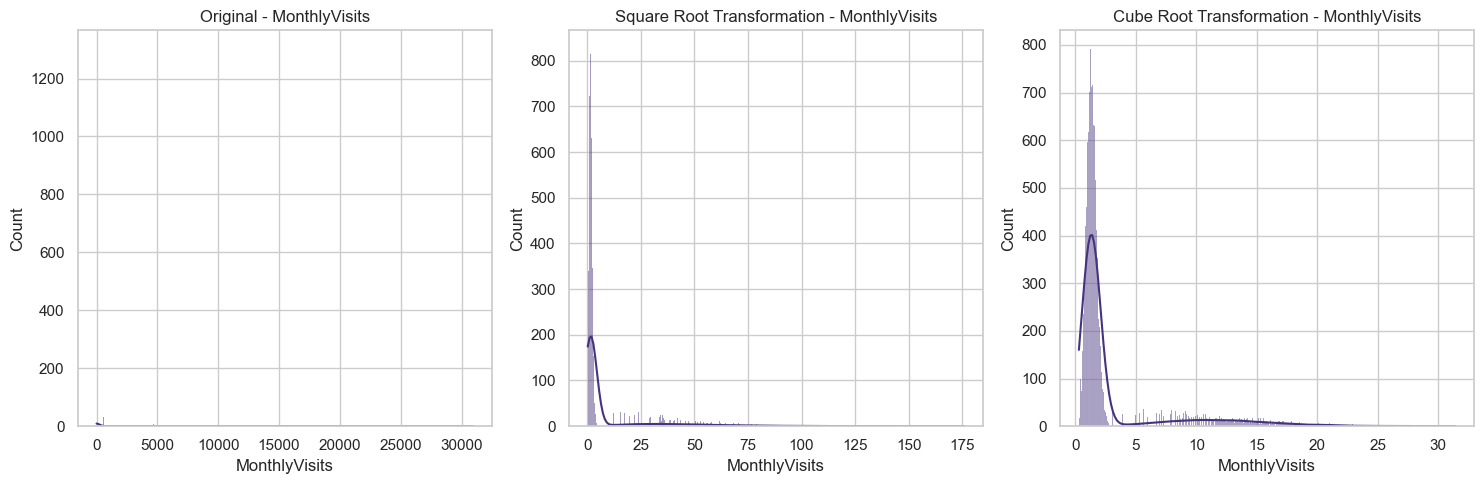

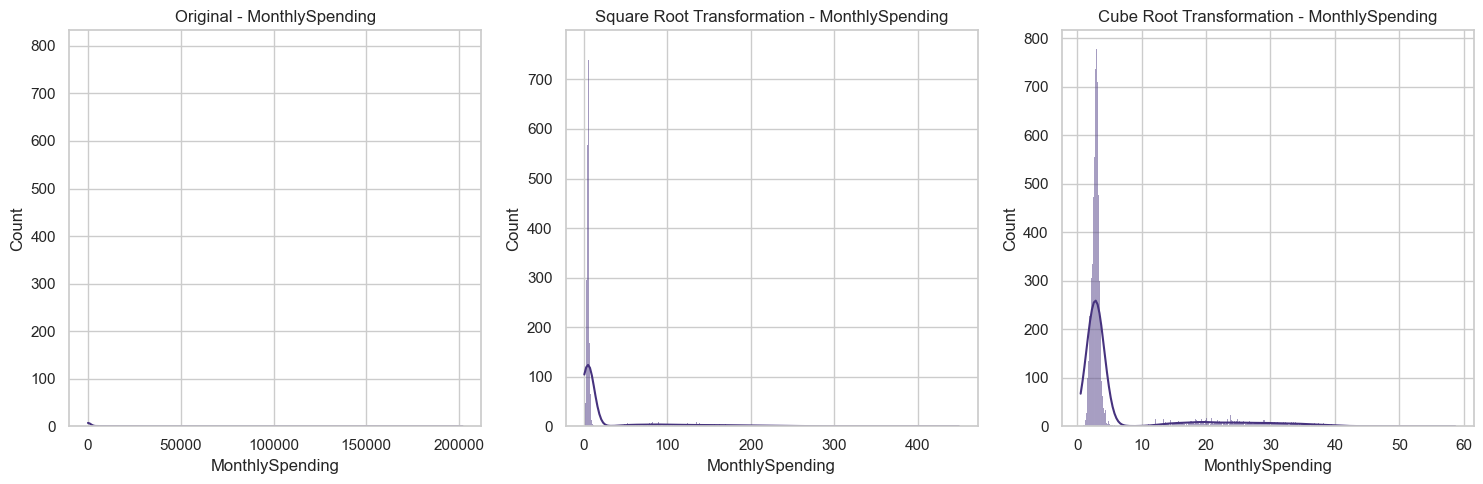

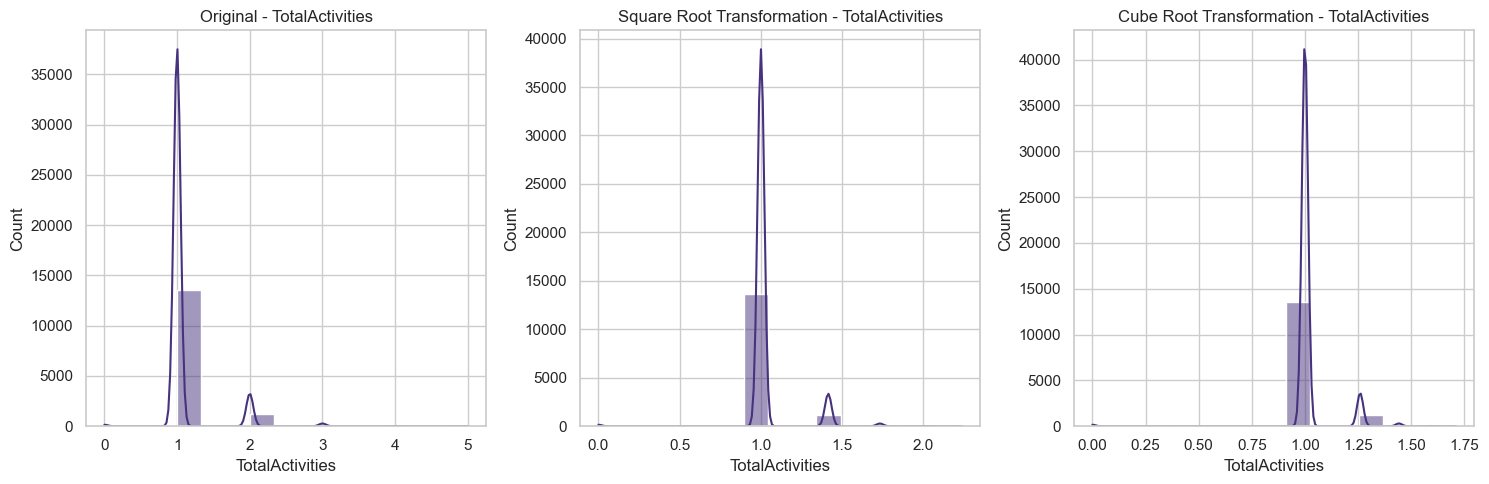

In [67]:
sns.set_palette("viridis")

# Plot histograms for each metric feature and its transformations
for feature in metric_features:
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Original - {feature}')

    plt.subplot(1, 3, 2)
    sns.histplot(np.sqrt(df[feature]), kde=True)
    plt.title(f'Square Root Transformation - {feature}')

    plt.subplot(1, 3, 3)
    sns.histplot(np.cbrt(df[feature]), kde=True)
    plt.title(f'Cube Root Transformation - {feature}')

    plt.tight_layout()
    plt.show()

In [68]:
# Apply transformations
df['Age'] = df['Age'] ** (1/2)
df['DaysWithoutFrequency'] = df['DaysWithoutFrequency'] ** (1/3)
df['LifetimeValue'] = df['LifetimeValue'] ** (1/3)
df['NumberOfFrequencies'] = df['NumberOfFrequencies'] ** (1/3)
df['RealNumberOfVisits'] = df['RealNumberOfVisits'] ** (1/3)
df['MonthlyVisits'] = df['MonthlyVisits'] ** (1/3)
df['MembershipDuration'] = df['MembershipDuration'] ** (1/3)

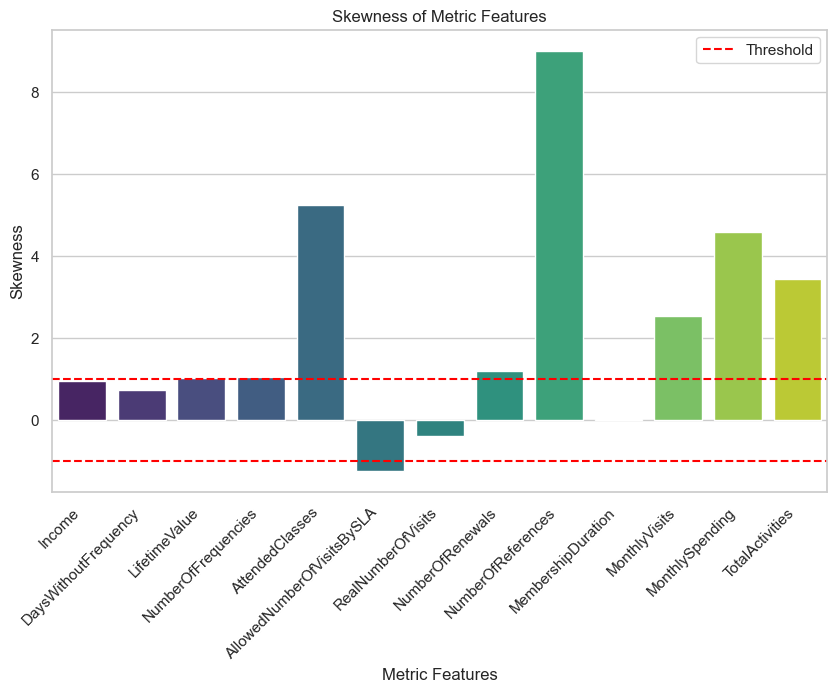

In [69]:
skewness = df[metric_features].skew(axis=0)

threshold = 1.0  

mask = np.abs(skewness) > threshold

colors = np.where(mask, 'orange', 'gray')

plt.figure(figsize=(10, 6))
sns.barplot(x=skewness.index, y=skewness, palette='viridis')
plt.axhline(y=threshold, color='red', linestyle='--', label='Threshold')
plt.axhline(y=-threshold, color='red', linestyle='--')
plt.xticks(rotation=45, ha='right')
plt.title('Skewness of Metric Features')
plt.xlabel('Metric Features')
plt.ylabel('Skewness')
plt.legend()
plt.show()

#### 2.3.2. Distribution of metric features after transformations

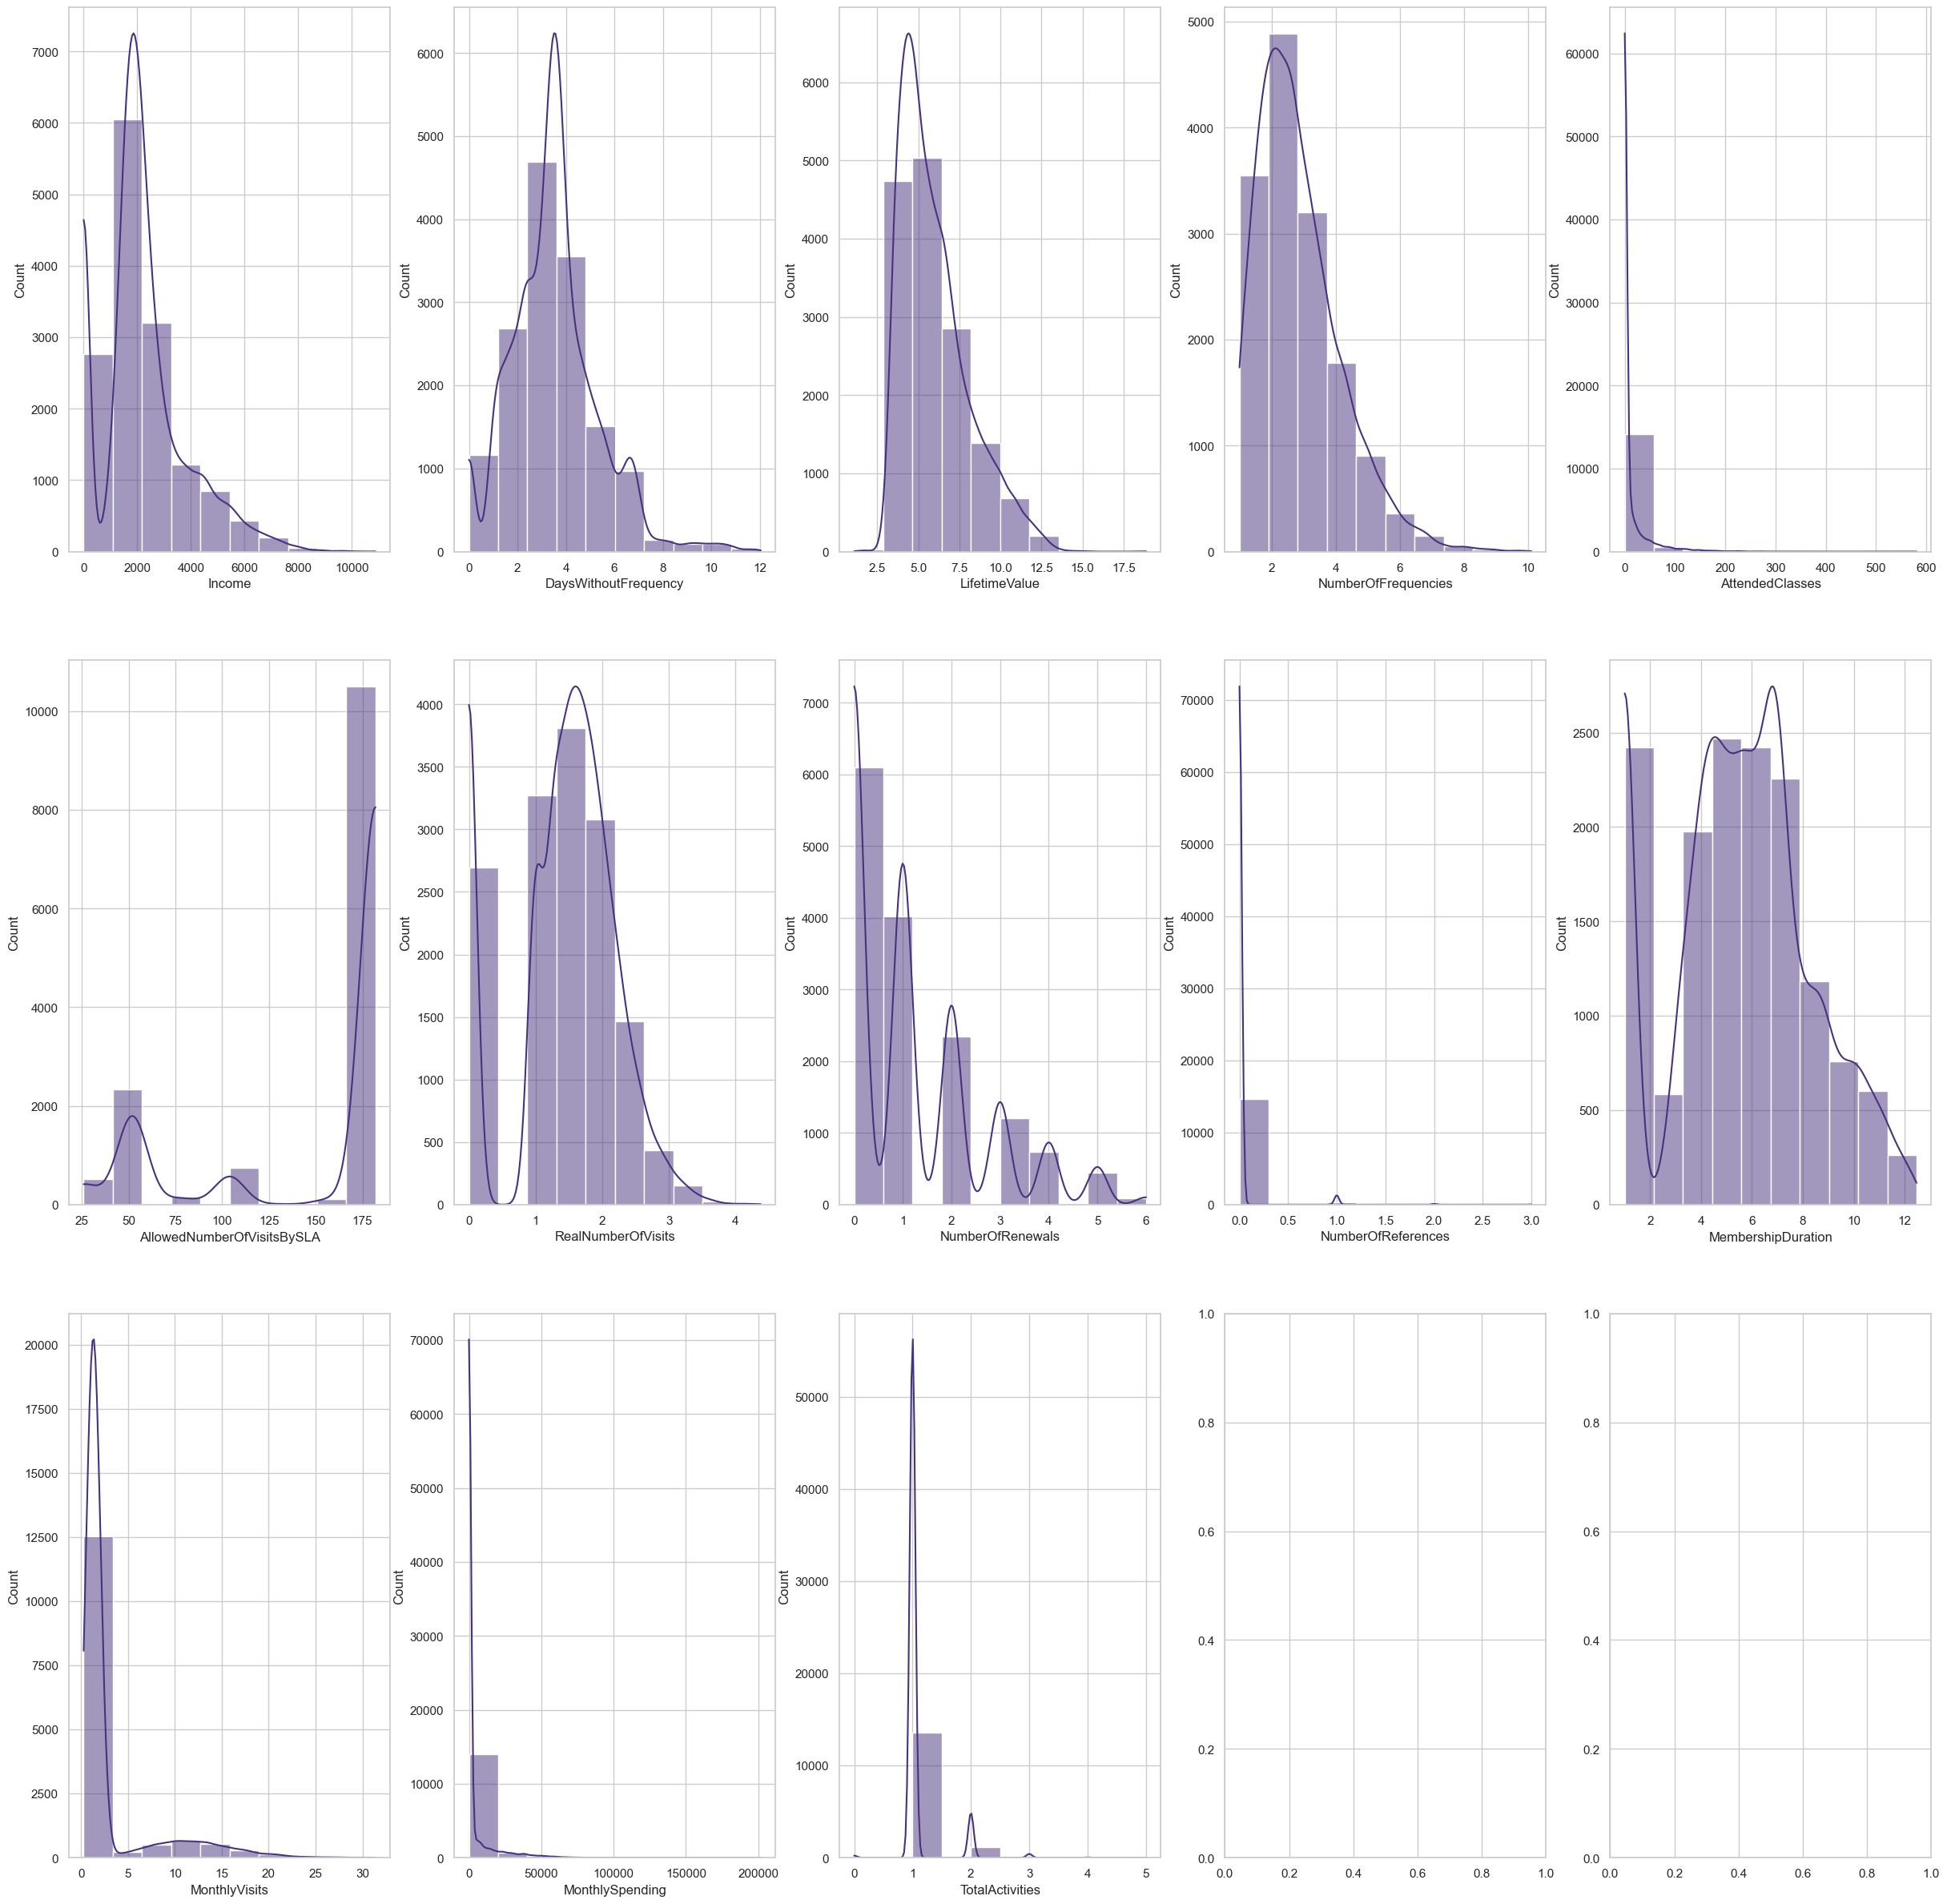

In [70]:
sns.set(style="whitegrid", palette="viridis")

fig, axes = plt.subplots(3, ceil(len(metric_features) / 3), figsize=(30, 30))

for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.histplot(df[feat],bins=10, kde=True , legend=False, ax = ax)

We can see that our data was originally right-skewed and after transformation it still exhibits skewness.

# 2.4. Scaling<a class="anchor" id="scaling"></a>

Before using K-Nearest Neighbors (KNN), we'll make sure all numerical values are on the same scale. Since our data was originally right-skewed and after transformation it still exhibits skewness, it's important to choose a scaling method that is robust to such non-normal distributions. This way, we used the MinMaxScaler.

We thought about using the StandardScaler but this method assumes that the data follows a Gaussian distribution which is not our case.

In [71]:
scaler = MinMaxScaler()
scaled_feat = scaler.fit_transform(df[metric_features])

df[metric_features] = scaled_feat
df.head()

Age Gender    Income  DaysWithoutFrequency  LifetimeValue  UseByTime  \
0  7.745967      0  0.505051              0.083062       0.189985          0   
1  5.385165      0  0.241506              0.325176       0.378597          0   
2  4.795832      1  0.181818              0.158892       0.126991          0   
3  3.000000      1  0.000000              0.232743       0.240905          0   
4  5.916080      1  0.396694              0.493713       0.343420          0   

   AthleticsActivities  WaterActivities  FitnessActivities  DanceActivities  \
0                  0.0              0.0                1.0              0.0   
1                  0.0              0.0                0.0              0.0   
2                  0.0              0.0                1.0              0.0   
3                  0.0              0.0                0.0              0.0   
4                  0.0              0.0                1.0              0.0   

   ...  RealNumberOfVisits  NumberOfRenewals  HasReferences  \
0  ...            0.287685          0.000000            0.0   
1  ...            0.228336          0.333333            0.0   
2  ...            0.414913          0.000000            0.0   
3  ...            0.329317          0.000000            0.0   
4  ...            0.000000          0.500000            0.0   

   NumberOfReferences  Dropout      AgeGroup  MembershipDuration  \
0                 0.0        0       Seniors            0.252227   
1                 0.0        1  Young Adults            0.554667   
2                 0.0        1  Young Adults            0.186697   
3                 0.0        1      Children            0.387114   
4                 0.0        1  Young Adults            0.715028   

   MonthlyVisits  MonthlySpending  TotalActivities  
0       0.044305         0.000224              0.2  
1       0.029520         0.000178              0.2  
2       0.048713         0.000180              0.2  
3       0.040774         0.000143              0.2  
4       0.028368         0.000070              0.2  

[5 rows x 30 columns]

### 2.5. Missing values<a class="anchor" id="missingvalues"></a>

#### 2.5.1. Handle missing values<a class="anchor" id="missingvalues"></a>

At this point, after removing and creating features, we searched for missing values. Specifically, we observed that income had 0.15% missing values, and each of the activity-related features had less than 0.07% missing values.

In [72]:
round((df.isna().sum() / len(df_original)) * 100,2)

Age                           0.00
Gender                        0.00
Income                        1.04
DaysWithoutFrequency          0.00
LifetimeValue                 0.00
UseByTime                     0.00
AthleticsActivities           0.24
WaterActivities               0.25
FitnessActivities             0.23
DanceActivities               0.24
TeamActivities                0.23
RacketActivities              0.25
CombatActivities              0.22
NatureActivities              0.31
SpecialActivities             0.29
OtherActivities               0.23
NumberOfFrequencies           0.17
AttendedClasses               0.00
AllowedWeeklyVisitsBySLA      3.58
AllowedNumberOfVisitsBySLA    3.58
RealNumberOfVisits            0.00
NumberOfRenewals              0.00
HasReferences                 0.00
NumberOfReferences            0.00
Dropout                       0.00
AgeGroup                      0.00
MembershipDuration            0.00
MonthlyVisits                 0.17
MonthlySpending     

#### 2.5.1. (a) Income

In [73]:
# Aplly KNN Imputation
imputer = KNNImputer(n_neighbors=5)

df["Income"] = imputer.fit_transform(df[["Income"]])

#### 2.5.2. (b) Activities

##### Assuming Missing Values as Indicators of Non-Participation

We simply assumed activities with missing information represented non-participation in the acitivity.

In [74]:
df[activities_features] = df[activities_features].fillna(0)

#### 2.5.2. (c) NumberOfFrequencies

In [75]:
df["NumberOfFrequencies"] = df["NumberOfFrequencies"].fillna(df["NumberOfFrequencies"].median())
df["MonthlyVisits"] = df["MonthlyVisits"].fillna(df["MonthlyVisits"].median())

#### 2.5.2. (d) AllowedWeeklyVisitsBySLA and AllowedNumberOfVisitsBySLA

In [76]:
df["AllowedWeeklyVisitsBySLA"] = df["AllowedWeeklyVisitsBySLA"].fillna(df["AllowedWeeklyVisitsBySLA"].mode()[0])

In [77]:
df["AllowedNumberOfVisitsBySLA"] = df["AllowedNumberOfVisitsBySLA"].fillna(int(df["AllowedNumberOfVisitsBySLA"].mode()[0]))

#### 2.5.2. Visualize the impact on distributions<a class="anchor" id="missingvalues"></a>

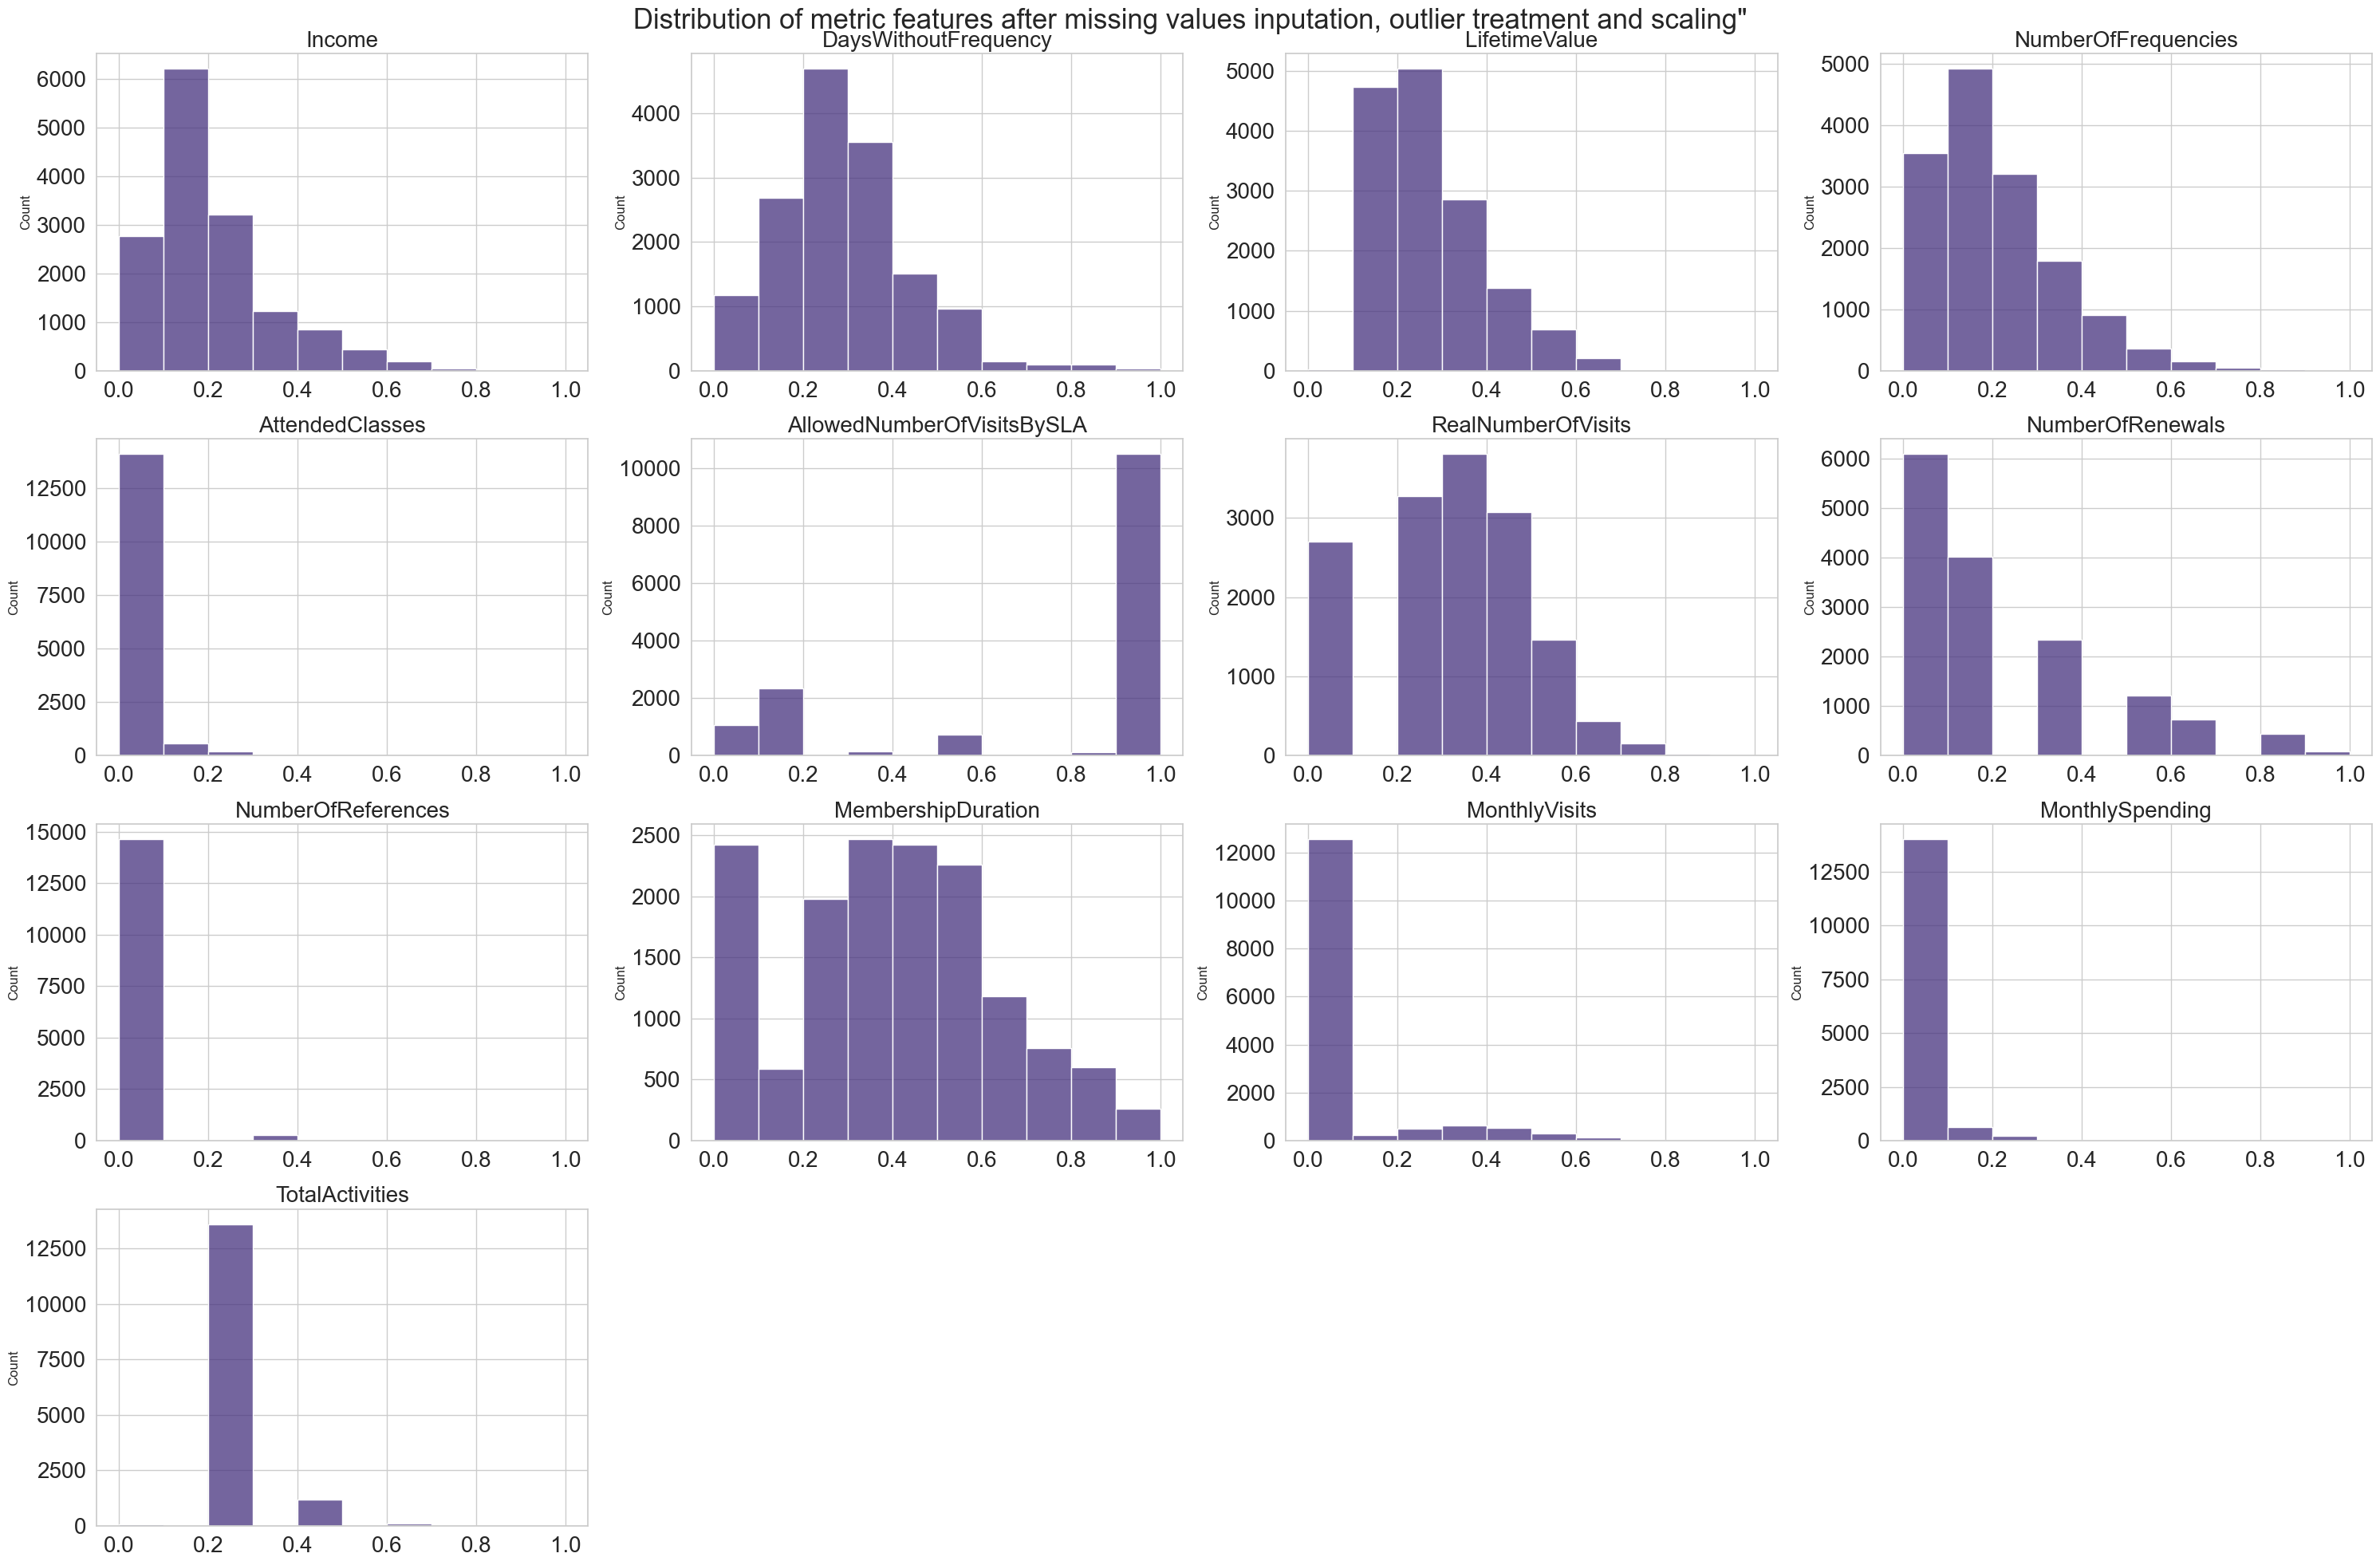

In [78]:
sns.set(style="whitegrid", palette="viridis")

num_cols = 4
num_rows = ceil(len(metric_features) / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, 20))  

for ax, feat in zip(axes.flatten(), metric_features):
    sns.histplot(df[feat], bins=10, legend=False, ax=ax)
    ax.set_title(feat, fontsize=20)  
    ax.tick_params(axis='both', labelsize=20)  
    ax.set_xlabel('')  
    
for i in range(len(metric_features), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.suptitle('Distribution of metric features after missing values inputation, outlier treatment and scaling"', fontsize=25)
plt.tight_layout()
plt.show()

>Post-missing value imputation, a quick check on variable correlations shows consistent results. Confirming that relationships between variables remain intact, the filling process ensures the reliability of correlation analyses.

### 2.6 Outliers using DBSCAN<a class="anchor" id="dbscan"></a>

> DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm that groups together data points that are close to each other based on a density criterion. The smaller the parameter epsilon, the denser the cluster.

In [79]:
def plot_nearest_neighbors_dist(df, minNeigh):
  """
    Auxiliary function that plots the distance to the furthest neighbour among minNeigh nearest neighbors
  """

  neigh = NearestNeighbors(n_neighbors = minNeigh)
  neigh.fit(df)

  dists, _ = neigh.kneighbors(df)

  # Sorted distances to the minPts neighbors
  dists = np.sort(dists[:, -1])

  plt.figure(figsize = (12, 10))
  plt.xlabel('Distances')
  plt.ylabel('Relative frequency')
  plt.title('Plot to choose the best epsilon to use in DBScan')
  plt.plot(dists)

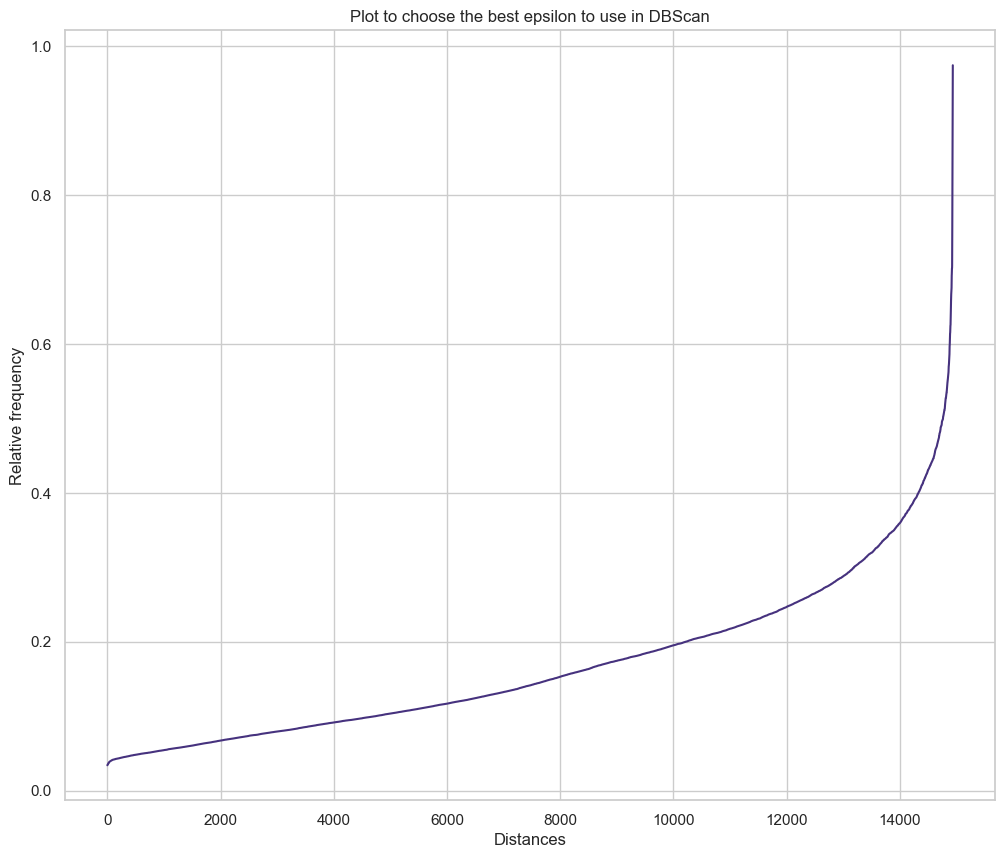

In [80]:
plot_nearest_neighbors_dist(df[metric_features], 2*len(metric_features))

This chart helps us identify the epsilon parameter - the most important one when using DBSCAN. That parameter is what tells DBSCAN what is the acceptable maximum distance for two points to be considered in the vicinity of one another. In this type of chart, which resembles an inverted sillhouette plot, we make our choice at epsilon = 0.4.

In [81]:
dbscan = DBSCAN(eps=0.4, min_samples=(2 * len(metric_features)), n_jobs=4)
dbscan_labels = dbscan.fit_predict(df[metric_features])

In [82]:
df[dbscan_labels == -1]

Age Gender    Income  DaysWithoutFrequency  LifetimeValue  \
262    4.358899      0  0.106520              0.286415       0.586032   
295    2.236068      0  0.000000              0.313954       0.309189   
438    4.795832      0  0.178145              0.689499       0.436202   
449    8.124038      0  0.655647              0.386820       0.523345   
658    9.000000      0  0.803489              0.755002       0.553340   
...         ...    ...       ...                   ...            ...   
14139  7.874008      1  0.486685              0.158892       0.973271   
14250  7.000000      0  0.552801              0.308029       0.391497   
14285  5.477226      1  0.340680              0.688694       0.619185   
14487  6.855655      0  0.398531              0.372234       0.460577   
14700  3.162278      0  0.000000              0.886083       0.437729   

       UseByTime  AthleticsActivities  WaterActivities  FitnessActivities  \
262            0                  0.0              1.0                0.0   
295            0                  0.0              1.0                0.0   
438            0                  0.0              1.0                1.0   
449            0                  0.0              1.0                0.0   
658            0                  0.0              0.0                1.0   
...          ...                  ...              ...                ...   
14139          0                  0.0              0.0                1.0   
14250          0                  0.0              0.0                1.0   
14285          0                  0.0              0.0                0.0   
14487          0                  0.0              0.0                1.0   
14700          0                  0.0              1.0                0.0   

       DanceActivities  ...  RealNumberOfVisits  NumberOfRenewals  \
262                0.0  ...            0.362460          0.666667   
295                0.0  ...            0.000000          0.833333   
438                0.0  ...            0.000000          0.833333   
449                0.0  ...            0.000000          0.500000   
658                0.0  ...            0.000000          0.666667   
...                ...  ...                 ...               ...   
14139              0.0  ...            0.522758          0.666667   
14250              0.0  ...            0.000000          0.333333   
14285              0.0  ...            0.000000          0.833333   
14487              0.0  ...            0.000000          0.833333   
14700              0.0  ...            0.390448          0.666667   

       HasReferences  NumberOfReferences  Dropout      AgeGroup  \
262              1.0            0.333333        1  Young Adults   
295              0.0            0.000000        0      Children   
438              0.0            0.000000        0  Young Adults   
449              0.0            0.000000        0       Seniors   
658              0.0            0.000000        0       Seniors   
...              ...                 ...      ...           ...   
14139            0.0            0.000000        0       Seniors   
14250            0.0            0.000000        0        Adults   
14285            0.0            0.000000        0  Young Adults   
14487            0.0            0.000000        1        Adults   
14700            0.0            0.000000        0      Children   

       MembershipDuration  MonthlyVisits  MonthlySpending  TotalActivities  
262              0.902565       0.064732         0.000154              0.2  
295              0.000000       0.237273         0.042554              0.4  
438              0.000000       0.468071         0.103027              0.6  
449              0.000000       0.726893         0.167194              0.2  
658              0.000000       0.473837         0.194268              0.2  
...                   ...            ...              ...              ...  
14139            0.000000       0.426

In [83]:
df_outliers = df[dbscan_labels ==-1]

In [84]:
# we remove the outliers
df_no_out = df[dbscan_labels != -1]

In [85]:
print(f'Percentage of total removed data: {np.round((1-(df_no_out.shape[0] / df.shape[0] )) * 100, 3)} %')

Percentage of total removed data: 0.904 %


In [86]:
print(f"Percentage of data kept after outlier removal: {round(df_no_out.shape[0] / df_original.shape[0] * 100, 2)}%")

Percentage of data kept after outlier removal: 99.07%


In [87]:
# We choose DBSCAN as outlier handling method
df = df_no_out

## 3. Feature Selection<a class="anchor" id="featselect"></a>

### 3.1. Numerical features

#### 3.1.1. Spearman Correlation

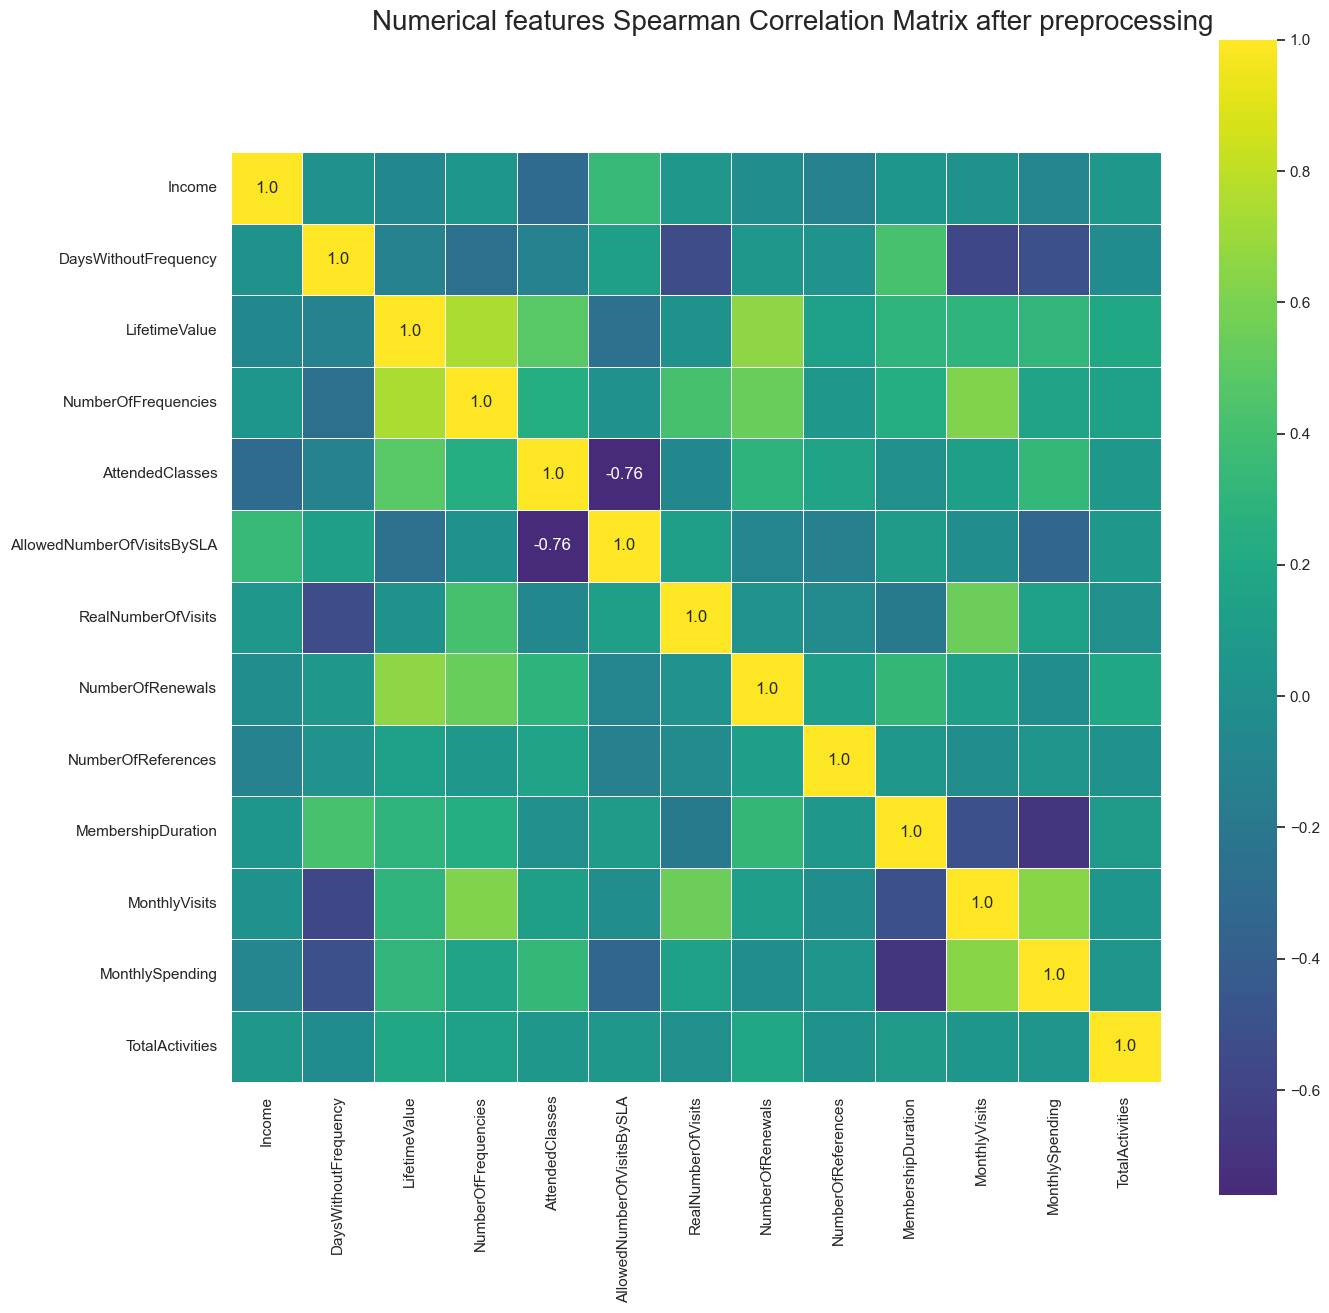

In [88]:
fig = plt.figure(figsize=(15, 15))

# Given we are using Spearman Correlation, it also makes sense to include the ordinal variable
feats = metric_features

corr = np.round(df[feats].corr(method="spearman"), decimals=2)

# Only plot the correlation values if the value surpasses a 0.5 threshold
annotations = np.where(np.absolute(corr.values) >= 0.741, corr.values, np.full(corr.shape,""))
sns.heatmap(data=corr, annot=annotations, cmap='viridis', fmt='s', center=0, square=True, linewidths=.5)

plt.suptitle("Numerical features Spearman Correlation Matrix after preprocessing", fontsize=20, y=0.9)
plt.show()

LifetimeValue and NumberOfFrequencies are strongly correlated with each other, and both are also highly correlated with AttendedClasses and NumberOfRenewals. 

MonthlyVisits is correlated with NumberOfFrequencies and MonthlySpending.

MembershipDuration and MonthlySpending, MonthlySpending and DaysWithoutFrequency, RealNumberOfVisits and DaysWithoutFrequency are also correlated. 

We will remove some of these features because of the high correlation, and the ones that we keep we will have to used them separately in the clusters - they should not be used togheter.


#### Component Planes

In [89]:
np.random.seed(42)

# 15 x 15 SOM hexagonal matrix
sm = sompy.SOMFactory().build(
    df[metric_features].values, 
    mapsize=[15, 15],
    initialization='random', 
    neighborhood='gaussian',
    training='batch',
    lattice='hexa',
    component_names=metric_features
)
sm.train(n_job=4, verbose = False, train_rough_len=100, train_finetune_len=100)

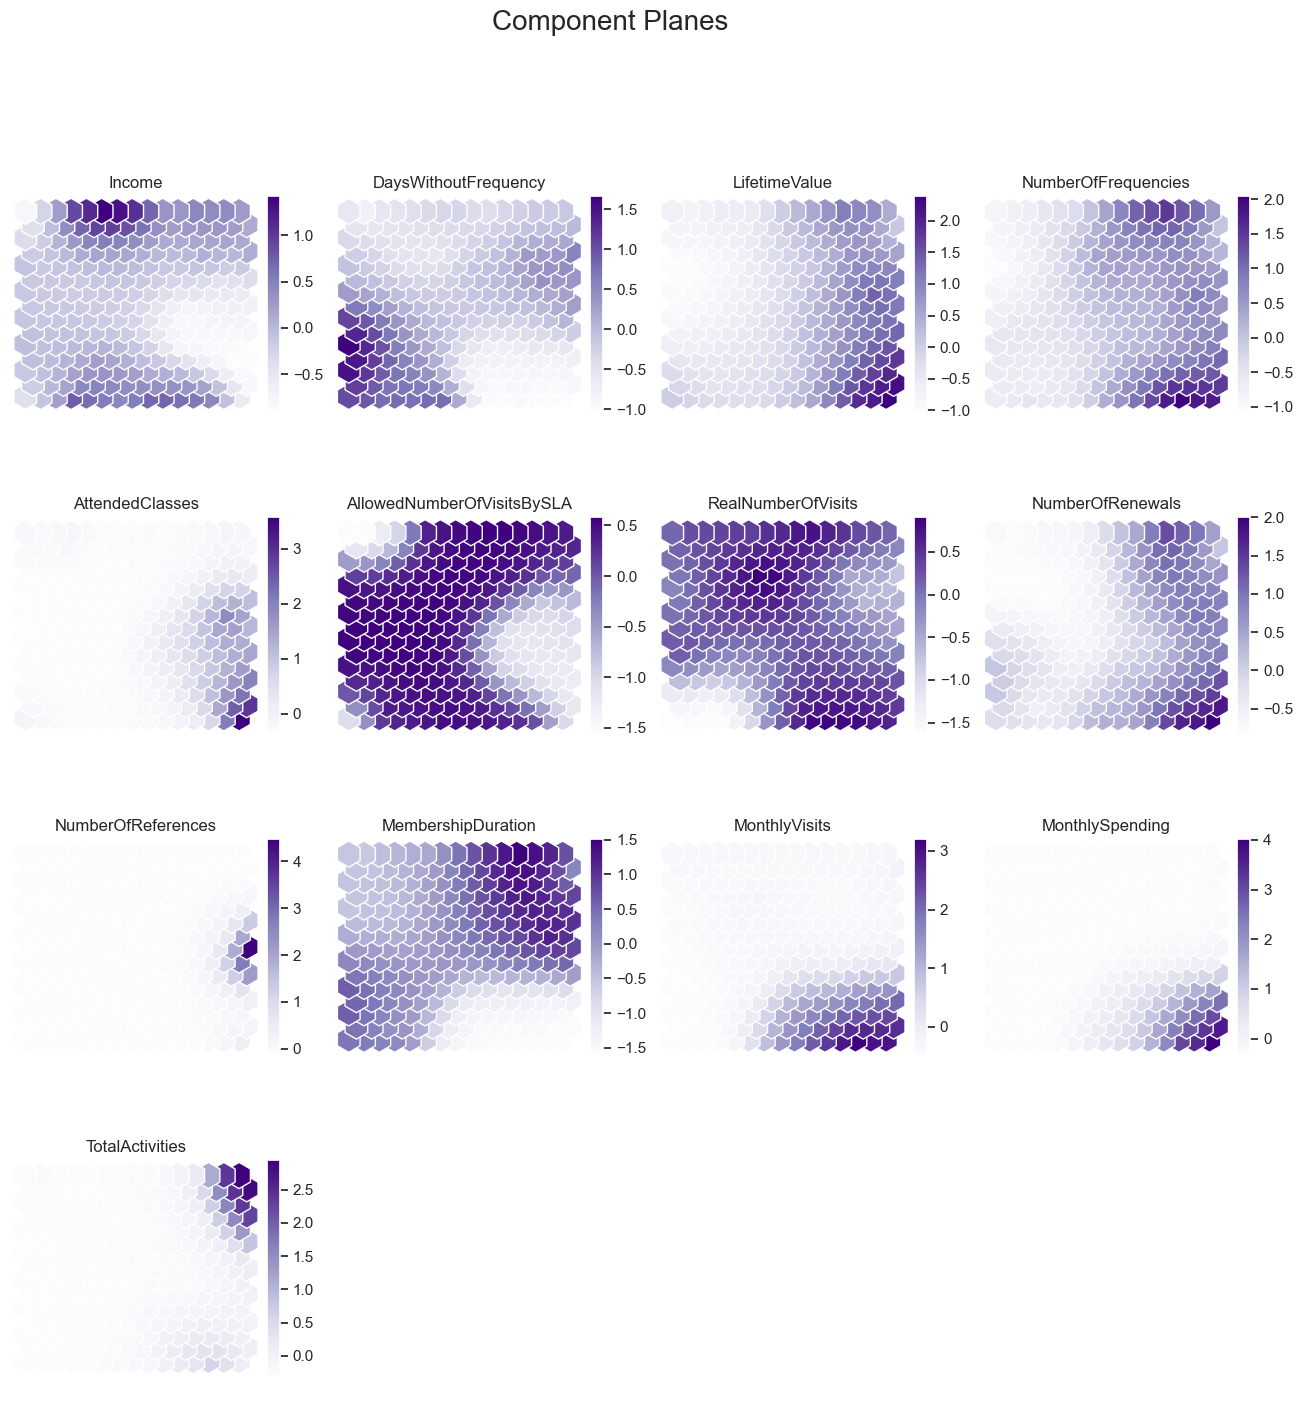

In [90]:
sns.set()
view2D = View2D(12, 12, "", text_size=10)
view2D.show(sm, col_sz = 4, cmap = 'Purples')
plt.suptitle("Component Planes", fontsize=20)
plt.show()

### 3.2. Categorical features

#### 3.1.2. Low variance feature removal

In [91]:
df.drop(columns=['DanceActivities', 'NatureActivities'], inplace=True)
categorical_features.remove('DanceActivities')
categorical_features.remove('NatureActivities')

An essential feature selection step involves removing features with low variance. This way, we removed 'DanceActivities' and 'NatureActivities' since they had only the value 0.

### Analysis

1. Age and Income are highly correlated, so they should not be used together. We will drop Income.

2. MonthlySpending is highly correlated with 3 other features and in the resulting component planes we see that it is not able to distinguish between different groups. Dropped

3. AttendedClasses is highly correlated with 2 other features and in the resulting component planes we see that it is not able to distinguish between different groups. Dropped

4. AllowedWeeklyVisitsBySLA and AllowedNumberOfVisitsBySLA are also not really correlated with any other variable. This meant that none of them would contribute to better grouping customers,
thus we decided not to use them for clustering, but only for cluster profiling.

5. NumberofReferences is not really correlated with any other feature and in the resulting component planes we see that it is not able to distinguish between different groups. Dropped

6. MonthlyVisits is highly correlated with 5 other features and in the resulting component planes we see that it is not able to distinguish between different groups. Dropped

7. TotalActivities is not really correlated with any other feature and in the resulting component planes we see that it is not able to distinguish between different groups. Dropped


### Categorical variables to drop

- UseByTime<br>
- AthleticsActivities<br>
- DanceActivities <br>
- TeamActivities <br>
- RacketActivities<br>
- NatureActivities<br>
- SpecialActivities<br>
- CombatActivities<br>
- OtherActivities <br>
- HasReferences <br>
- NumberOfReferences <br>

> All these variables were dropped on the criteria that they mostly only have one category present and as such they provide little to no information in order to distinguish customers.
> Since we need variability in order to distinguish customers, and these variables had none, we dropped them.

In [92]:
metric_keep = ["Income", "LifetimeValue", "DaysWithoutFrequency", "NumberOfFrequencies", "RealNumberOfVisits", "NumberOfRenewals", "MembershipDuration"]

In [93]:
categorical_features = ["Gender", "WaterActivities", "FitnessActivities", "AllowedWeeklyVisitsBySLA", "Dropout"]

In [94]:
list_dfs = [df[metric_keep], df["AgeGroup"], df["Gender"], df["WaterActivities"], df["FitnessActivities"], df["CombatActivities"], df["Dropout"], df["AllowedWeeklyVisitsBySLA"]]

In [95]:
df_final = pd.concat(list_dfs, axis=1, ignore_index = False)

In [96]:
df.shape

(14803, 28)

In [97]:
df_final.shape

(14803, 14)

In [98]:
df_final.head()

Income  LifetimeValue  DaysWithoutFrequency  NumberOfFrequencies  \
0  0.505051       0.189985              0.083062             0.118661   
1  0.241506       0.378597              0.325176             0.202572   
2  0.181818       0.126991              0.158892             0.089771   
3  0.000000       0.240905              0.232743             0.188350   
4  0.396694       0.343420              0.493713             0.268967   

   RealNumberOfVisits  NumberOfRenewals  MembershipDuration      AgeGroup  \
0            0.287685          0.000000            0.252227       Seniors   
1            0.228336          0.333333            0.554667  Young Adults   
2            0.414913          0.000000            0.186697  Young Adults   
3            0.329317          0.000000            0.387114      Children   
4            0.000000          0.500000            0.715028  Young Adults   

  Gender  WaterActivities  FitnessActivities  CombatActivities  Dropout  \
0      0              0.0                1.0               0.0        0   
1      0              0.0                0.0               0.0        1   
2      1              0.0                1.0               0.0        1   
3      1              0.0                0.0               0.0        1   
4      1              0.0                1.0               0.0        1   

   AllowedWeeklyVisitsBySLA  
0                       7.0  
1                       2.0  
2                       7.0  
3                       2.0  
4                       7.0

In [99]:
df_final = df_final[df_final.columns[[7,0,1,2,3,4,5,6,8,9,10,11,12,13]]]

In [100]:
df_final

AgeGroup    Income  LifetimeValue  DaysWithoutFrequency  \
0           Seniors  0.505051       0.189985              0.083062   
1      Young Adults  0.241506       0.378597              0.325176   
2      Young Adults  0.181818       0.126991              0.158892   
3          Children  0.000000       0.240905              0.232743   
4      Young Adults  0.396694       0.343420              0.493713   
...             ...       ...            ...                   ...   
14937     Teenagers  0.000000       0.576513              0.104651   
14938        Adults  0.199895       0.332518              0.279252   
14939  Young Adults  0.166208       0.136519              0.104651   
14940        Adults  0.440771       0.458066              0.119796   
14941  Young Adults  0.339761       0.485368              0.200191   

       NumberOfFrequencies  RealNumberOfVisits  NumberOfRenewals  \
0                 0.118661            0.287685          0.000000   
1                 0.202572            0.228336          0.333333   
2                 0.089771            0.414913          0.000000   
3                 0.188350            0.329317          0.000000   
4                 0.268967            0.000000          0.500000   
...                    ...                 ...               ...   
14937             0.419706            0.456671          0.500000   
14938             0.312944            0.329317          0.000000   
14939             0.089771            0.456671          0.000000   
14940             0.516136            0.436790          0.333333   
14941             0.497543            0.536893          0.666667   

       MembershipDuration Gender  WaterActivities  FitnessActivities  \
0                0.252227      0              0.0                1.0   
1                0.554667      0              0.0                0.0   
2                0.186697      1              0.0                1.0   
3                0.387114      1              0.0                0.0   
4                0.715028      1              0.0                1.0   
...                   ...    ...              ...                ...   
14937            0.000000      1              1.0                0.0   
14938            0.470700      1              0.0                0.0   
14939            0.186697      1              0.0                1.0   
14940            0.000000      1              1.0                0.0   
14941            0.830727      0              0.0                1.0   

       CombatActivities  Dropout  AllowedWeeklyVisitsBySLA  
0                   0.0        0                       7.0  
1                   0.0        1                       2.0  
2                   0.0        1                       7.0  
3                   0.0        1                       2.0  
4                   0.0        1                       7.0  
...                 ...      ...                       ...  
14937               0.0        0                       4.0  
14938               1.0        1                       7.0  
14939               0.0        1                       7.0  
14940               0.0        0                       3.0  
14941               0.0        1                       7.0  

[14803 rows x 14 columns]

## 4. Segmentation Perspectives <a class="anchor" id="segmentationperspectives"></a>

Our conclusion is:

Socio-demographic clustering:

- AgeGroup
- Income
- Gender
- AllowedWeeklyVisitsBySLA



Value:

- LifetimeValue
- DaysWithoutFrequency 
- NumberOfFrequencies
- RealNumberOfVisits
- NumberOfRenewals
- Dropout


Product

- WaterActivities
- FitnessActivities
- CombatActivities
- MembershipDuration




## 5. Clustering <a class="anchor" id="clustering"></a>

For ***Socio-Demographic***:

K-Prototypes:
1. Find best number of cluster using the elbow method

Hierarchical Clustering
1. Calculate gower distance matrix
2. Choose best linkage by plotting silhouette scores across a number of clusters
3. Choose best number of clusters with a dendogram

K-Medoids (PAM)
1. Choose best number of clusters using elbow and silhouette

#### Auxiliary functions

In [101]:
# ----------------------- GENERAL Auxiliary Functions ---------------------------------#
def get_sst(df):
  """
    Calculates the um of squared distances of each point to the mean of the points

  """
  return np.sum(df.var() * (df.count() - 1))

def get_r2(df, labels):
  """
    Calculates r2 given a dataframe and the clustering solution
  """
  sst = get_sst(df)
  ssw = np.sum(df.groupby(labels).apply(get_sst))
  ssb = sst - ssw
  return ssb / sst

# ----------------------- HIERARQUICAL Auxiliary Functions ---------------------------------#

def get_hierarquical_scores(df, min_clust, max_clust):
  """
    Returns r2 scores for each nr of clusters and each linkage method
  """
  hc_r2_scores = {}

  # get r2 scores for each model
  for linkage in ['single', 'complete', 'average', 'ward']:
    r2_linkage = {}
    # get the r2 scores for each number of clusters
    for n_clust in range(min_clust, max_clust + 1):
      model = AgglomerativeClustering(linkage = linkage, n_clusters = n_clust)
      labels = model.fit_predict(df)
      r2_linkage[n_clust] = get_r2(df, labels)

    hc_r2_scores[linkage] = r2_linkage

  return hc_r2_scores

def choose_hc_linkage(df, min_clust, max_clust, description):
  """
    Plots the r2 scores for each nr of clusters and each linkage method
  """
  r2_scores = get_hierarquical_scores(df, min_clust, max_clust)

  r2_df = pd.DataFrame(r2_scores)

  sns.set()
  fig = plt.figure(figsize = (10, 5))
  sns.lineplot(data = r2_df, linewidth = 2.5, markers = ['o'] * 4)

  fig.suptitle(f"R2 plot for various linkages and nr of clusters for {description}", fontsize = 15)
  plt.gca().invert_xaxis()
  plt.legend(title = 'Clustering Algorithm', title_fontsize = 12)
  plt.xticks(range(1, max_clust + 1))
  plt.xlabel("Number of clusters", fontsize = 10)
  plt.ylabel("R2", fontsize = 10)

  plt.show()

def plot_dendogram(hclust, y_threshold, purpose):
  """
    Creates linkage matrix and then plots the dendrogram
  """
  # Adapted from:
  # https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py
  linkage = hclust.get_params()['linkage']
  distance = hclust.get_params()['affinity']
  plt.figure(figsize = (10, 10))

  # create the counts of samples under each node
  counts = np.zeros(hclust.children_.shape[0])
  n_samples = len(hclust.labels_)

  for i, merge in enumerate(hclust.children_):
      current_count = 0
      for child_idx in merge:
          if child_idx < n_samples:
              current_count += 1  # leaf node
          else:
              # Otherwise, we are merging a previously formed cluster
              current_count += counts[child_idx - n_samples]
      counts[i] = current_count

  linkage_matrix = np.column_stack(
      [hclust.children_, hclust.distances_, counts]
  ).astype(float)

  # Plot the corresponding dendrogram
  sns.set()
  fig = plt.figure(figsize=(11,5))
  dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
  plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
  plt.title(f'HC - {linkage.title()}\'s Dendrogram for {purpose}', fontsize=21)
  plt.xlabel('Number of points in node (or index of point if no parenthesis)')
  plt.ylabel(f'{distance.title()} Distance', fontsize=13)
  plt.show()

# ----------------------- K-MEANS auxiliary functions ---------------------------------#
def get_kmeans_inertia_silhouette(df, min_clust, max_clust):
  """ 
    Returns values of inertia and silhouette for a range of number of clusters
  """
  inertia = []
  silhouette = []
  for n_clus in range(min_clust, max_clust):  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters = n_clus, init = 'k-means++', n_init = 15, random_state = 42)
    kmclust.fit(df)
    inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution

    # skip n_clus == 1 because it only makes sense to compute silhouette with at least 2 clusters
    if n_clus == 1:
      continue
    labels = kmclust.predict(df)
    silhouette.append(silhouette_score(df, labels)) # save silhouette of the given solution

  return inertia, silhouette

# ----------------------- K-MEANS and K-PROTOTYPES auxiliary functions ---------------------------------#

def plot_scores(inertia, silhouette, description, clust_range):
  f = plt.figure(figsize=(20,5))

  ax1 = f.add_subplot(121)
  ax1.plot(range(clust_range[0], clust_range[1]), inertia)
  ax1.set_ylabel("Inertia = SSw")
  ax1.set_xlabel('Nr clusters')
  ax1.set_title(f'Elbow method for {description}', fontsize = 20)

  ax2 = f.add_subplot(122)
  ax2.plot(range(clust_range[0] + 1, clust_range[1]), silhouette)
  ax2.set_ylabel("Avg silhouette")
  ax2.set_xlabel('Nr clusters')
  ax2.set_title(f'Avg silhouette for {description}', fontsize = 20)


# ----------------- SOM auxiliary function ----------------- #

def create_som(df, mapsize):
  """
    Instantiates and trains a SOM
  """

  np.random.seed(42)

  sm = sompy.SOMFactory().build(
      df.values, 
      mapsize=mapsize,
      initialization='random', 
      neighborhood='gaussian',
      training='batch',
      lattice='hexa',
      component_names=df.columns
  )
  sm.train(n_job=4, verbose = False, train_rough_len=100, train_finetune_len=100)

  return sm

def plot_umat(description, sm):
  """
    U-Matrix plot: distances between neurons
  """
  u = sompy.umatrix.UMatrixView(9, 9, f'{description} U-Matrix', show_axis=True, text_size=20, show_text=True)

  UMAT = u.show(
      sm, 
      distance=2,
      row_normalized=False,
      show_data=True, 
      contour=True,
      blob=True
  )

def plot_hitmap(description, sm):
  """
    Hit-Map plot: number of observations that consider a neuron its BMU
  """

  vhts  = BmuHitsView(12,12,f"{description} Hit Map")
  vhts.show(sm, anotate=True, onlyzeros=False, labelsize=12, cmap="GnBu")
  plt.show()

def cluster_som_units(model, sm, description):
  """
    Runs the clustering algorithm (model) on SOM units
  """
  nodeclus_labels = model.fit_predict(sm.codebook.matrix)
  sm.cluster_labels = nodeclus_labels

  hits = HitMapView(12, 12, description, text_size = 15)
  hits.show(sm, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")
  plt.show()
  return sm

def kmeans_on_som_plot(n_clusters, sm, description):
  kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=20, random_state=42)

  return cluster_som_units(kmeans, sm, description)

def hc_on_som_plot(n_clusters, sm, description, linkage):
  hc = AgglomerativeClustering(n_clusters=n_clusters, linkage = linkage)
  
  return cluster_som_units(hc, sm, description)

def merge_bmu_labels(df, sm):
  """
    Returns a match between the BMU label and the observations that have that BMU
  """

  df_nodes = pd.DataFrame(sm.codebook.matrix, columns=df.columns)
  df_nodes['label'] = sm.cluster_labels
  
  bmus_map = sm.find_bmu(df)[0]  # Get BMU for each observation in df

  df_bmus = pd.DataFrame(
      np.concatenate((df, np.expand_dims(bmus_map,1)), axis=1),
      index=df.index, columns=np.append(df.columns,"BMU")
  )
  
  # Labels for each observation based on BMU label
  df_final = df_bmus.merge(df_nodes['label'], 'left', left_on="BMU", right_index=True)

  return df_final

In [102]:
value_feats=df_final[["LifetimeValue","DaysWithoutFrequency","RealNumberOfVisits","NumberOfFrequencies","NumberOfRenewals","Dropout"]]

In [103]:
product_feats=df_final[["WaterActivities","FitnessActivities","CombatActivities","MembershipDuration"]]

# Socio-Demographic Clustering <a class="anchor" id="sociodemoClust"></a>

In [104]:
sociodemo_results = pd.DataFrame(columns = ['silhouette']) # To store the silhouette scores of each algorithm

In [105]:
df.columns

Index(['Age', 'Gender', 'Income', 'DaysWithoutFrequency', 'LifetimeValue',
       'UseByTime', 'AthleticsActivities', 'WaterActivities',
       'FitnessActivities', 'TeamActivities', 'RacketActivities',
       'CombatActivities', 'SpecialActivities', 'OtherActivities',
       'NumberOfFrequencies', 'AttendedClasses', 'AllowedWeeklyVisitsBySLA',
       'AllowedNumberOfVisitsBySLA', 'RealNumberOfVisits', 'NumberOfRenewals',
       'HasReferences', 'NumberOfReferences', 'Dropout', 'AgeGroup',
       'MembershipDuration', 'MonthlyVisits', 'MonthlySpending',
       'TotalActivities'],
      dtype='object')

In [106]:
df_demog = df[['Income', 'Gender', 'AllowedWeeklyVisitsBySLA']].copy()

#### K-Prototypes <a class="anchor" id="kprototypes"></a>

> We use K-Prototypes only to start getting a sense of how many clusters our data will have

__1.__ Choose best K using the elbow method

In [107]:
cost = []
for cluster in range(2, 10):
  kprototype = KPrototypes(n_jobs = 4, n_clusters = cluster, random_state = 42)
  kprototype.fit_predict(df_demog, categorical = [1, 2])
  cost.append(kprototype.cost_)
  print(f'Cluster initiation: {cluster}')

Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9


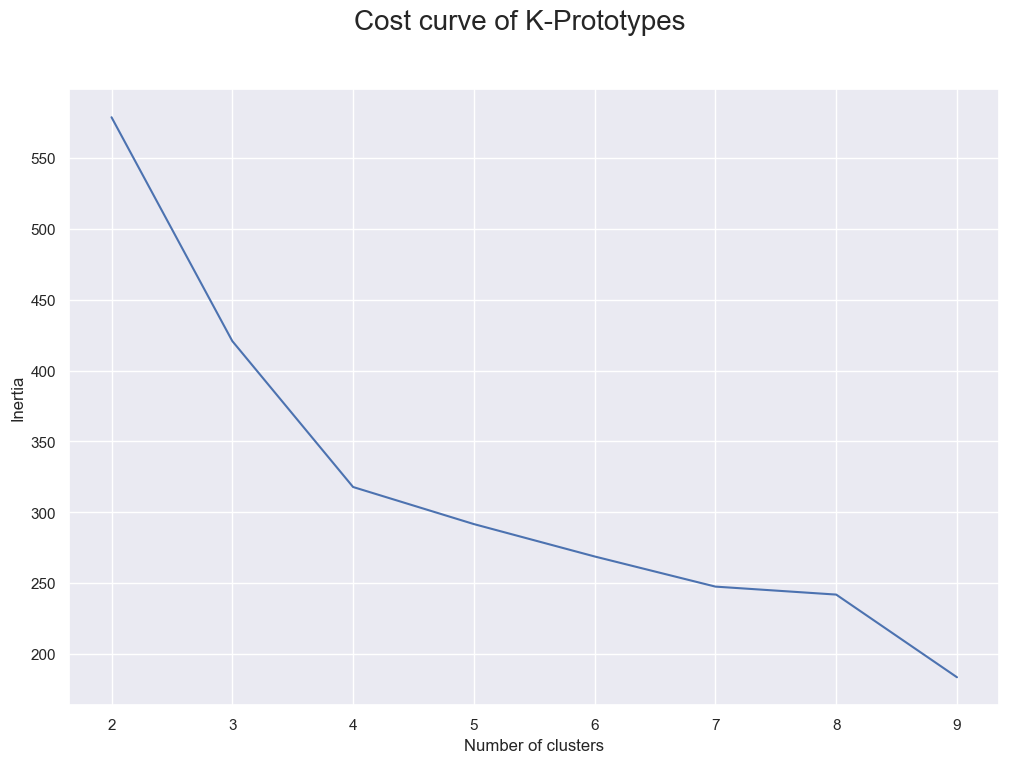

In [108]:
plt.figure(figsize = (12, 8))
plt.plot(range(2, len(cost) + 2), cost)
plt.suptitle('Cost curve of K-Prototypes', fontsize = 20)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia');

> For this method we decide by 4 clusters

#### Hierarchical Clustering <a class="anchor" id="hcSociodemo"></a>

__1.__ Calculate distance matrix using gower distance

In [110]:
distance_matrix = gower.gower_matrix(df_demog, cat_features = [False, True, True])

__2.__ Choose best linkage by plotting silhouette scores across a number of clusters


In [111]:
silhouette_scores = {}

# get silhouette scores for each model
for linkage in ['single', 'complete', 'average']:
  silhouette_linkage = {}
  # get the silhouette scores for each number of clusters
  for n_clust in range(2, 10):
    model = AgglomerativeClustering(linkage = linkage, n_clusters = n_clust, metric='precomputed')
    labels = model.fit_predict(distance_matrix)
    silhouette_linkage[n_clust] = silhouette_score(distance_matrix, labels)

  silhouette_scores[linkage] = silhouette_linkage

silhouette_df = pd.DataFrame(silhouette_scores)

In [112]:
silhouette_df

single  complete   average
2  0.235267  0.616105  0.443157
3  0.008565  0.476944  0.520323
4  0.009067  0.468838  0.474357
5  0.044391  0.656393  0.462214
6  0.045324  0.683160  0.401471
7  0.076889  0.817797  0.382563
8  0.101535  0.821517  0.416150
9  0.143130  0.815781  0.413133

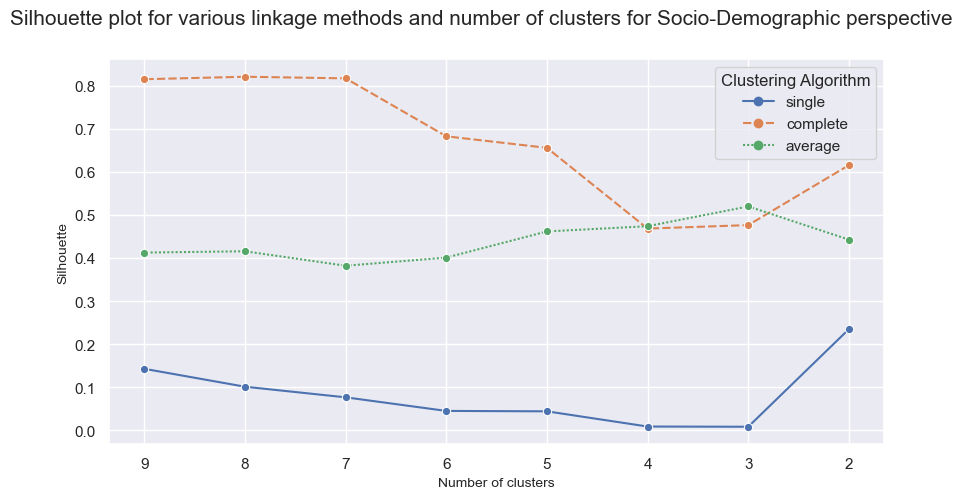

In [113]:
sns.set()
fig = plt.figure(figsize = (10, 5))
sns.lineplot(data = silhouette_df, linewidth = 1.5, markers = ['o'] * 3)

fig.suptitle(f"Silhouette plot for various linkage methods and number of clusters for Socio-Demographic perspective ", fontsize = 15)
plt.gca().invert_xaxis()
plt.legend(title = 'Clustering Algorithm', title_fontsize = 12)
plt.xticks(range(2, 10))
plt.xlabel("Number of clusters", fontsize = 10)
plt.ylabel("Silhouette", fontsize = 10)

plt.show()

___3.___ Choose best number of clusters with a dendogram


<Figure size 1000x1000 with 0 Axes>

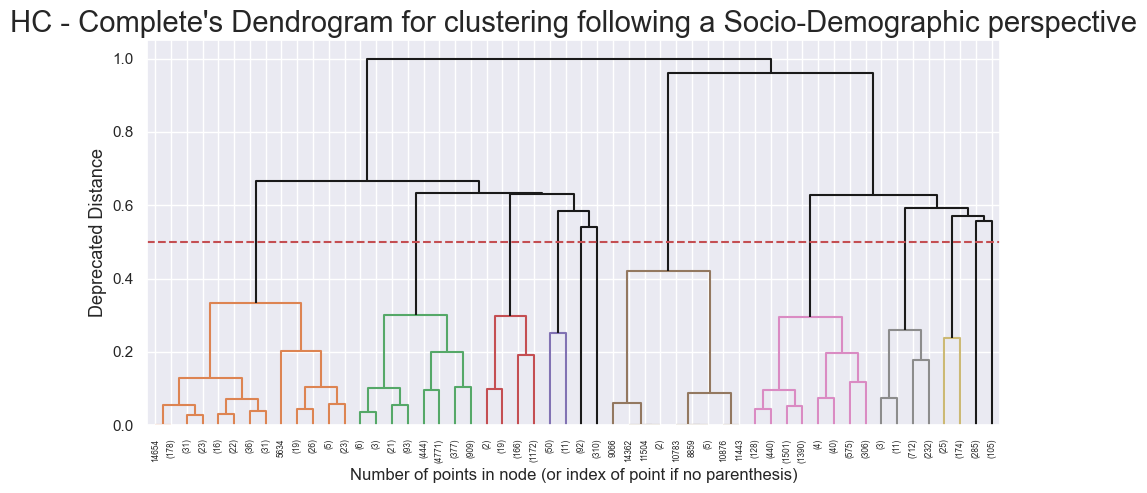

In [114]:
clst = AgglomerativeClustering(linkage='complete', distance_threshold=0, n_clusters=None, metric='precomputed')
clst.fit_predict(distance_matrix)
plot_dendogram(clst, 0.5, 'clustering following a Socio-Demographic perspective');

In [115]:
hc_scores = {}

clst = AgglomerativeClustering(linkage='complete', n_clusters=4, metric='precomputed')
labels_hierc = clst.fit_predict(distance_matrix)
hc_scores['hc'] = [silhouette_score(distance_matrix, labels)]

In [116]:
hc_scores

{'hc': [0.4131329]}

#### K-Medoids (PAM) <a class="anchor" id="kmedoids"></a>

__1.__ Choose best number of clusters using elbow and silhouette


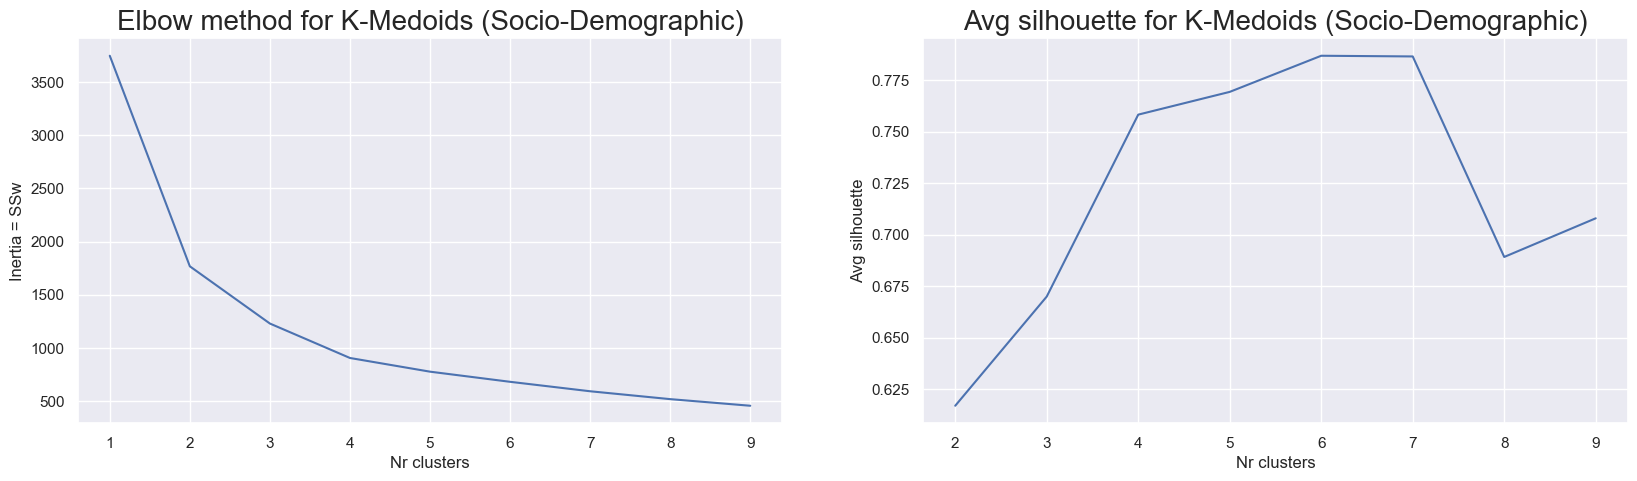

In [117]:
inertia = []
silhouette = []
for n_clus in range(1, 10):
  km = kmedoids.KMedoids(n_clus, method='fasterpam', random_state = 42).fit(distance_matrix)
  inertia.append(km.inertia_)

  # we can not calculate the silhouette for a solution with only one cluster, so we skip it
  if n_clus == 1:
    continue

  silhouette.append(silhouette_score(distance_matrix, km.labels_))

plot_scores(inertia, silhouette, 'K-Medoids (Socio-Demographic)', (1, 10))

In [118]:
kmedoids_scores = {}

km = kmedoids.KMedoids(4, method='fasterpam').fit(distance_matrix)
labels = km.labels_
kmedoids_scores['k-medoids'] = [silhouette_score(distance_matrix, labels)]

In [119]:
kmedoids_scores['k-medoids']

[0.75826067]

In [120]:
silhouette

[0.6168806,
 0.66990155,
 0.75826067,
 0.76931083,
 0.7868576,
 0.7865233,
 0.6891447,
 0.7079174]

> We use k-medoids as our algorithm of choice for socio-demographic as the silhouette score is the highest <br>
4 clusters <br>
0.7582 silhouette score

# Value Clustering <a class="anchor" id="valueClust"></a>

In [121]:
value_results_results = pd.DataFrame(columns = ['silhouette']) # To store the silhouette scores of each algorithm

#### K-Prototypes <a class="anchor" id="kprototypes"></a>

__1.__ Choose best K using the elbow method

In [122]:
cost = []
for cluster in range(2, 10):
  kprototype = KPrototypes(n_jobs = 4, n_clusters = cluster, random_state = 0)
  kprototype.fit_predict(value_feats, categorical = [5])
  cost.append(kprototype.cost_)
  print('Cluster initiation: {}'.format(cluster))

Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9


Text(0, 0.5, 'Inertia')

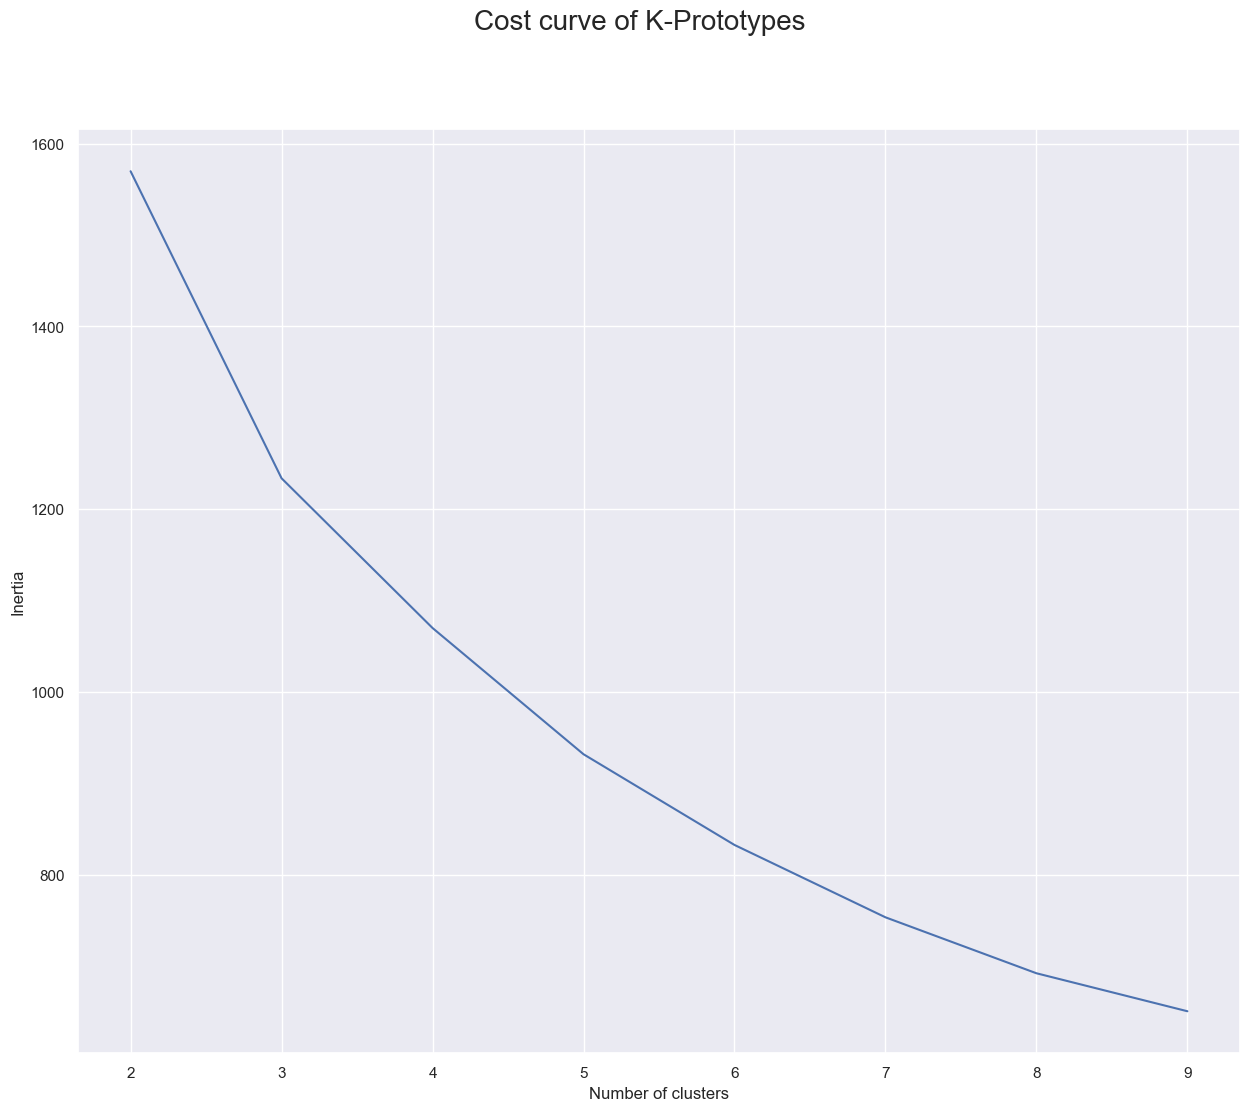

In [123]:
plt.figure(figsize = (15, 12))
plt.plot(range(2, len(cost) + 2), cost)
plt.suptitle('Cost curve of K-Prototypes', fontsize = 20)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

#### Hierarchical Clustering <a class="anchor" id="hcSociodemo"></a>



__1.__ Calculate distance matrix using gower distance

In [125]:
distance_matrix = gower.gower_matrix(value_feats, cat_features = [False, False, False,False,False,True])

__2.__ Choose best linkage by plotting silhouette scores across a number of clusters


In [126]:
silhouette_scores = {}

# get silhouette scores for each model
for linkage in ['single', 'complete', 'average']:
  silhouette_linkage = {}
  # get the silhouette scores for each number of clusters
  for n_clust in range(2, 8):
    model = AgglomerativeClustering(linkage = linkage, n_clusters = n_clust, metric='precomputed')
    labels = model.fit_predict(distance_matrix)
    silhouette_linkage[n_clust] = silhouette_score(distance_matrix, labels)

  silhouette_scores[linkage] = silhouette_linkage

silhouette_df = pd.DataFrame(silhouette_scores)

In [127]:
silhouette_df

single  complete   average
2  0.625277  0.625277  0.625277
3  0.547882  0.552687  0.547882
4  0.516999  0.327582  0.547784
5  0.516701  0.336097  0.516611
6  0.495393  0.328466  0.379928
7  0.495190  0.309078  0.342741

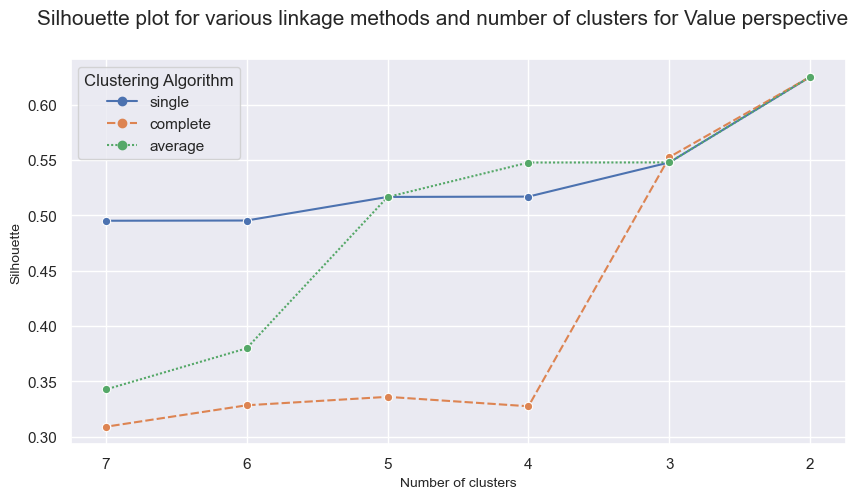

In [128]:
sns.set()
fig = plt.figure(figsize = (10, 5))
sns.lineplot(data = silhouette_df, linewidth = 1.5, markers = ['o'] * 3)

fig.suptitle(f"Silhouette plot for various linkage methods and number of clusters for Value perspective ", fontsize = 15)
plt.gca().invert_xaxis()
plt.legend(title = 'Clustering Algorithm', title_fontsize = 12)
plt.xticks(range(2, 8))
plt.xlabel("Number of clusters", fontsize = 10)
plt.ylabel("Silhouette", fontsize = 10)

plt.show()

___3.___ Choose best number of clusters with a dendogram


<Figure size 1000x1000 with 0 Axes>

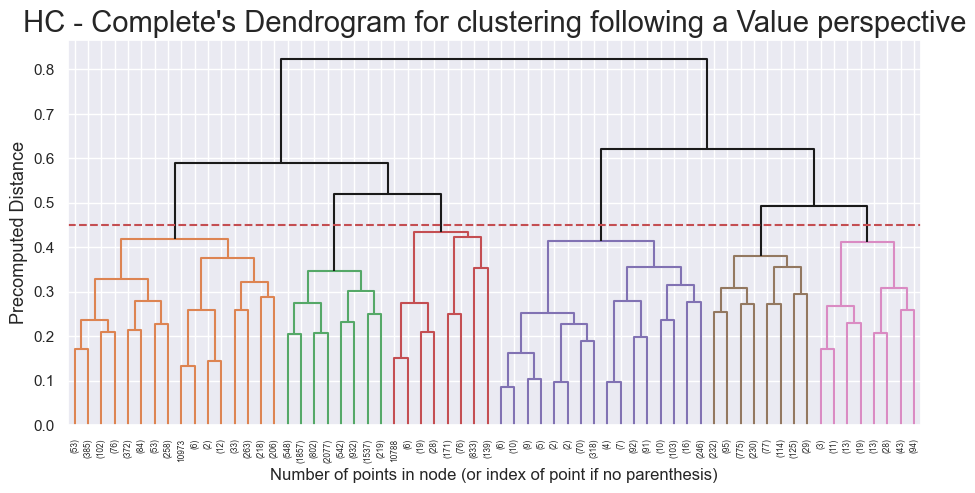

In [129]:
clst = AgglomerativeClustering(linkage='complete', distance_threshold=0, n_clusters=None, affinity='precomputed')
clst.fit_predict(distance_matrix)
plot_dendogram(clst, 0.45, 'clustering following a Value perspective')

In [130]:
hc_scores = {}

clst = AgglomerativeClustering(linkage='average', n_clusters=3, metric='precomputed')
labels = clst.fit_predict(distance_matrix)
hc_scores['hc'] = [silhouette_score(distance_matrix, labels)]

In [131]:
value_results = (pd.DataFrame(hc_scores, index = ['silhouette']).T)
value_results

silhouette
hc    0.547882

#### K-Medoids (PAM) <a class="anchor" id="kmedoids"></a>

__1.__ Choose best number of clusters using elbow and silhouette


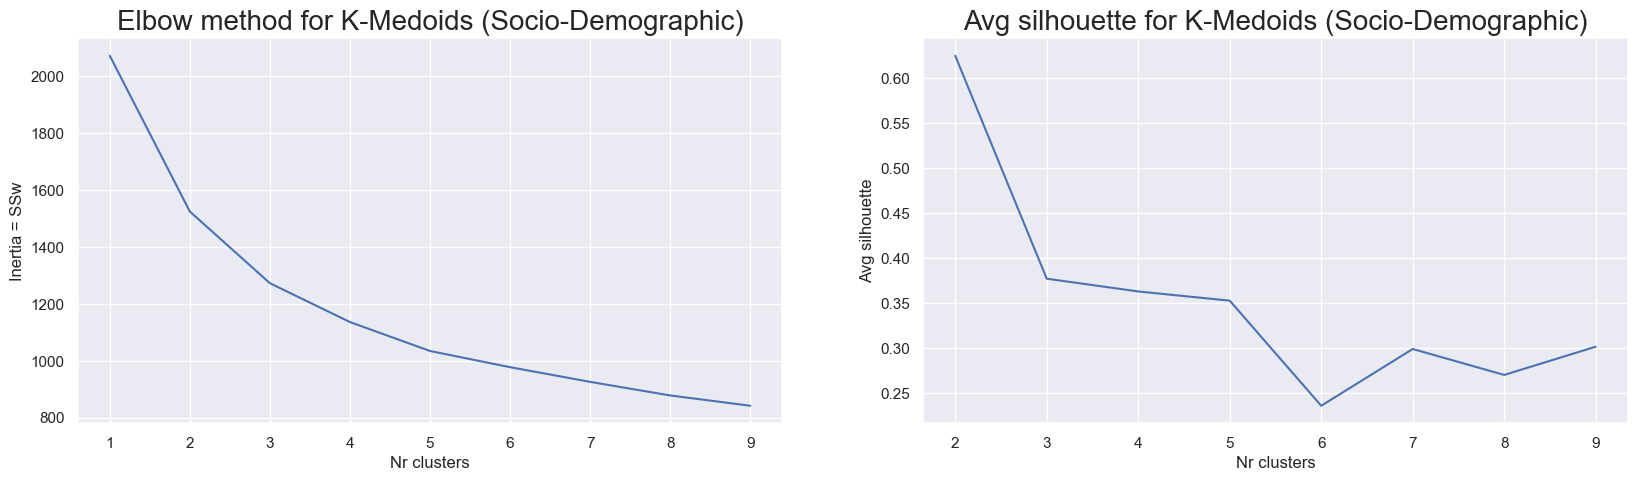

In [132]:
inertia = []
silhouette = []
for n_clus in range(1, 10):
  km = kmedoids.KMedoids(n_clus, method='fasterpam', random_state = 0).fit(distance_matrix)
  inertia.append(km.inertia_)

  # we can not calculate the silhouette for a solution with only one cluster, so we skip it
  if n_clus == 1:
    continue

  silhouette.append(silhouette_score(distance_matrix, km.labels_))

plot_scores(inertia, silhouette, 'K-Medoids (Socio-Demographic)', (1, 10))

In [133]:
silhouette

[0.625277,
 0.3771435,
 0.3629388,
 0.3526892,
 0.235724,
 0.2988926,
 0.27003464,
 0.30143973]

In [134]:
kmedoids_scores = {}

km = kmedoids.KMedoids(3, method='fasterpam').fit(distance_matrix)
labels = km.labels_
kmedoids_scores['k-medoids'] = [silhouette_score(distance_matrix, labels)]

In [135]:
value_results =(pd.DataFrame(kmedoids_scores, index = ['silhouette']).T)
value_results

silhouette
k-medoids    0.377144

> We use hierarchical clustering with 'average' algorithm to decide on 3 clusters for value<br>
> 3 clusters<br>
> 0.6580 silhouette score

# Product Clustering <a class="anchor" id="productClust"></a>

In [136]:
product_results = pd.DataFrame(columns = ['silhouette']) # To store the silhouette scores of each algorithm

#### K-Prototypes <a class="anchor" id="kprototypes"></a>

__1.__ Choose best K using the elbow method

In [137]:
cost = []
for cluster in range(2, 10):
  kprototype = KPrototypes(n_jobs = 4, n_clusters = cluster, random_state = 0)
  kprototype.fit_predict(product_feats, categorical = [3])
  cost.append(kprototype.cost_)
  print('Cluster initiation: {}'.format(cluster))

Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9


Text(0, 0.5, 'Inertia')

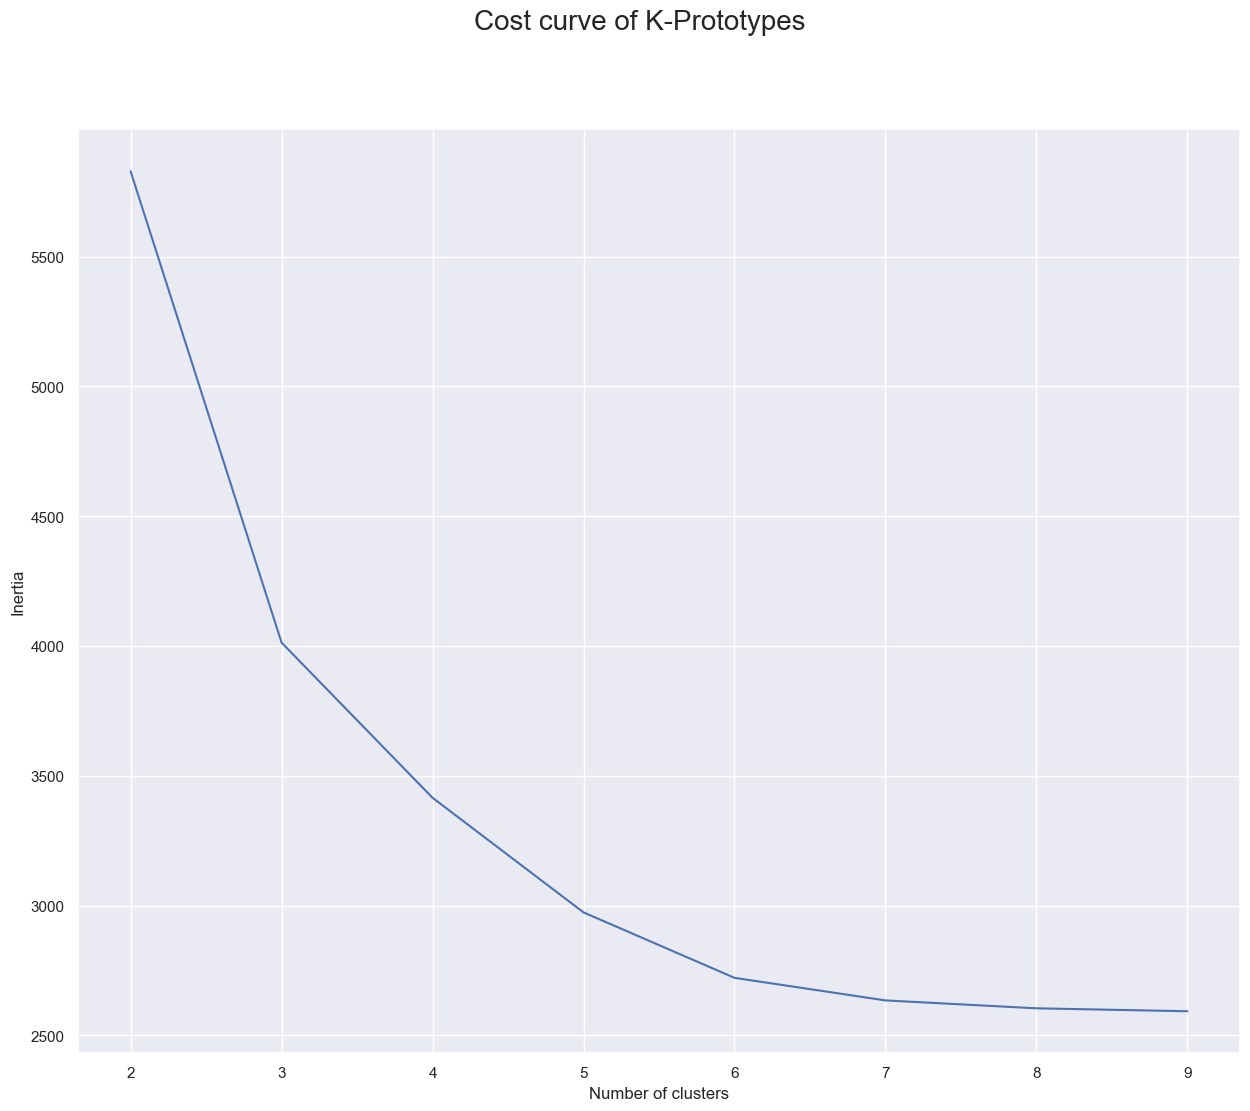

In [138]:
plt.figure(figsize = (15, 12))
plt.plot(range(2, len(cost) + 2), cost)
plt.suptitle('Cost curve of K-Prototypes', fontsize = 20)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

#### Hierarchical Clustering <a class="anchor" id="hcSociodemo"></a>


__1.__ Calculate distance matrix using gower distance

In [140]:
distance_matrix = gower.gower_matrix(product_feats, cat_features = [True, True, True, False])

__2.__ Choose best linkage by plotting silhouette scores across a number of clusters


In [141]:
silhouette_scores = {}

# get silhouette scores for each model
for linkage in ['single', 'complete', 'average']:
  silhouette_linkage = {}
  # get the silhouette scores for each number of clusters
  for n_clust in range(2, 8):
    model = AgglomerativeClustering(linkage = linkage, n_clusters = n_clust, metric='precomputed')
    labels = model.fit_predict(distance_matrix)
    silhouette_linkage[n_clust] = silhouette_score(distance_matrix, labels)

  silhouette_scores[linkage] = silhouette_linkage

silhouette_df = pd.DataFrame(silhouette_scores)

In [142]:
silhouette_df

single  complete   average
2  0.248539  0.359224  0.657690
3  0.217404  0.683645  0.687961
4  0.057097  0.664400  0.700775
5  0.488375  0.714545  0.681559
6  0.642597  0.757362  0.688136
7  0.669942  0.781877  0.717842

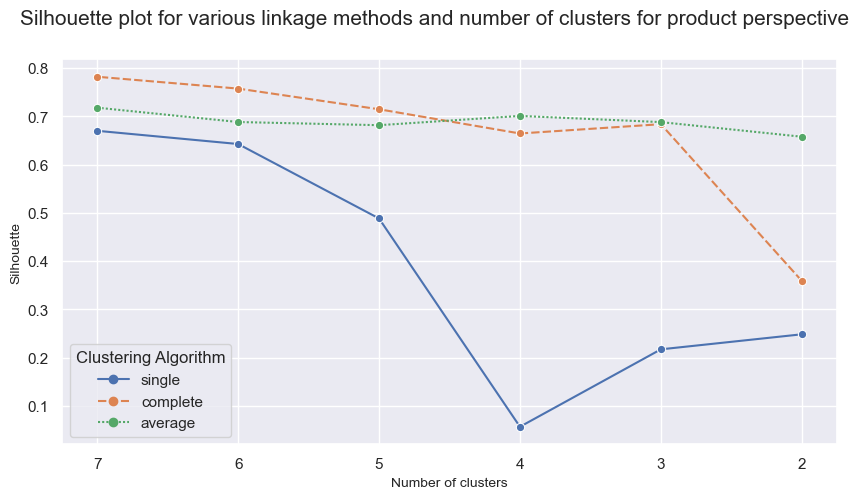

In [143]:
sns.set()
fig = plt.figure(figsize = (10, 5))
sns.lineplot(data = silhouette_df, linewidth = 1.5, markers = ['o'] * 3)

fig.suptitle(f"Silhouette plot for various linkage methods and number of clusters for product perspective ", fontsize = 15)
plt.gca().invert_xaxis()
plt.legend(title = 'Clustering Algorithm', title_fontsize = 12)
plt.xticks(range(2, 8))
plt.xlabel("Number of clusters", fontsize = 10)
plt.ylabel("Silhouette", fontsize = 10)

plt.show()

___3.___ Choose best number of clusters with a dendogram


<Figure size 1000x1000 with 0 Axes>

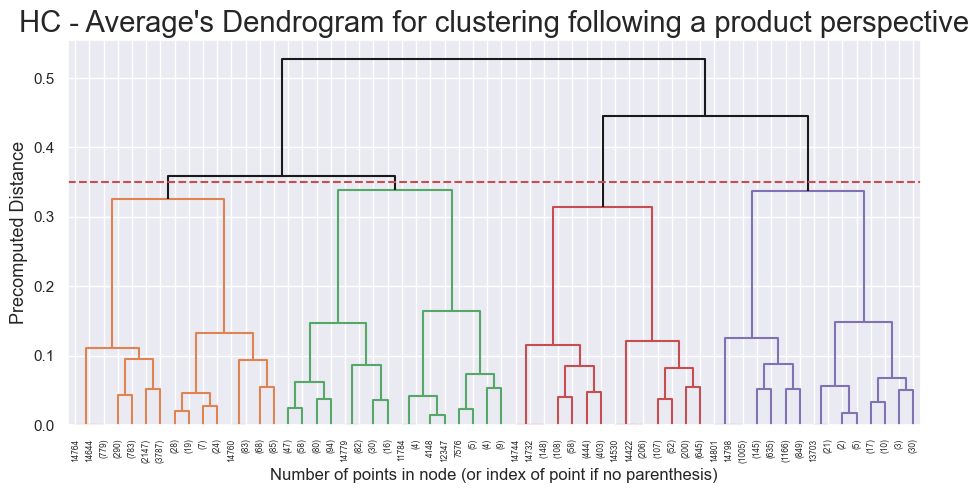

In [144]:
clst = AgglomerativeClustering(linkage='average', distance_threshold=0, n_clusters=None, affinity='precomputed')
clst.fit_predict(distance_matrix)
plot_dendogram(clst, 0.35, 'clustering following a product perspective');

In [145]:
hc_scores = {}

clst = AgglomerativeClustering(linkage='average', n_clusters=4, metric='precomputed')
labels = clst.fit_predict(distance_matrix)
hc_scores['hc'] = [silhouette_score(distance_matrix, labels)]

In [146]:
hc_scores

{'hc': [0.70077497]}

In [147]:
product_results = (pd.DataFrame(hc_scores, index = ['silhouette']).T)
product_results

silhouette
hc    0.700775

#### K-Medoids (PAM) <a class="anchor" id="kmedoids"></a>

__1.__ Choose best number of clusters using elbow and silhouette


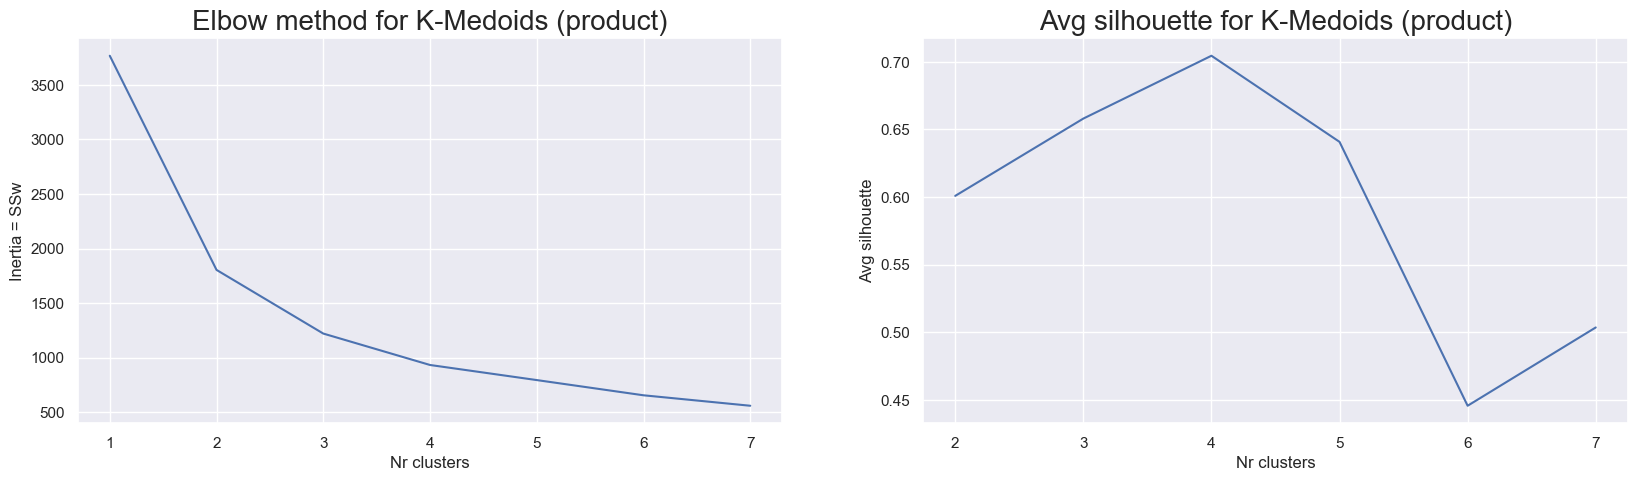

In [148]:
inertia = []
silhouette = []
for n_clus in range(1, 8):
  km = kmedoids.KMedoids(n_clus, method='fasterpam', random_state = 0).fit(distance_matrix)
  inertia.append(km.inertia_)

  # we can not calculate the silhouette for a solution with only one cluster, so we skip it
  if n_clus == 1:
    continue

  silhouette.append(silhouette_score(distance_matrix, km.labels_))

plot_scores(inertia, silhouette, 'K-Medoids (product)', (1, 8))

In [149]:
silhouette

[0.60085577, 0.6580245, 0.70449954, 0.6408047, 0.44562054, 0.5035226]

In [150]:
kmedoids_scores = {}

km = kmedoids.KMedoids(2, method='fasterpam').fit(distance_matrix)
labels = km.labels_
kmedoids_scores['k-medoids'] = [silhouette_score(distance_matrix, labels)]

In [151]:
kmedoids_scores

{'k-medoids': [0.60085577]}

In [152]:
product_results3 = (pd.DataFrame(kmedoids_scores, index = ['silhouette']).T)
product_results3

silhouette
k-medoids    0.600856

> We decide by k medoids clustering <br>
2 clusters <br>
0.6 silhouette score

# Cluster Analysis

In [153]:
def numerical_variables_analysis(df, labels_col, description):
  # calculate mean of each numerical variable per cluster
  numerical_means = df.groupby(labels_col, as_index=False).mean()

  plt.figure(figsize = (20, 7))

  pd.plotting.parallel_coordinates(numerical_means, labels_col, color = ['#25bbbf','#25bf5d', '#de3838', '#e5d627', '#2367c4', '#ad487f', '#de7e4e'])

  plt.suptitle(f'Cluster analysis for numerical variables following a {description} clustering perspective', fontsize = 20)
  plt.legend(title = 'Cluster')

  plt.show()

In [154]:
def categorical_variables_analysis(df, labels_col, categorical_vars, description):
  fig, axes = plt.subplots(1, 3, figsize=(30, 7))

  for ax, var in zip(axes, categorical_vars):

    df_percent = df.groupby(labels_col)[var].value_counts(normalize = True).reset_index(name = 'percentage')
    sns.barplot(data = df_percent, x = labels_col, y = 'percentage', hue = var, ax = ax)

    ax.set_title(var + '% per cluster')
    ax.set_ylabel('Percentage')
    ax.set_xlabel('Cluster')


  plt.suptitle(f"Analysis of categorical variables for each cluster following a {description} perspective", fontsize = 20)

### Socio-Demographic

In [155]:
df_clusters = df_final.copy()
distance_matrix = gower.gower_matrix(df_demog, cat_features = [False, True, True])
km = kmedoids.KMedoids(2, method='fasterpam').fit(distance_matrix)
df_clusters["demo_labels"] = km.labels_

In [156]:
df_clusters["demo_labels"].value_counts()

demo_labels
0    8867
1    5936
Name: count, dtype: int64

In [157]:
df_clusters.groupby('demo_labels')["Income"].mean()

demo_labels
0    0.202716
1    0.195171
Name: Income, dtype: float64

In [158]:
df_clusters.groupby('demo_labels')["Gender"].count()

demo_labels
0    8867
1    5936
Name: Gender, dtype: int64

In [159]:
metric_demo = ['Income']

In [160]:
#numerical_variables_analysis(df_clusters[metric_demo + ['demo_labels']], 'demo_labels', 'Socio-Demographic')

> These plots are useless when we only have one metric feature

In [161]:
categoricals_demo = ["AgeGroup", "Gender", "AllowedWeeklyVisitsBySLA"]

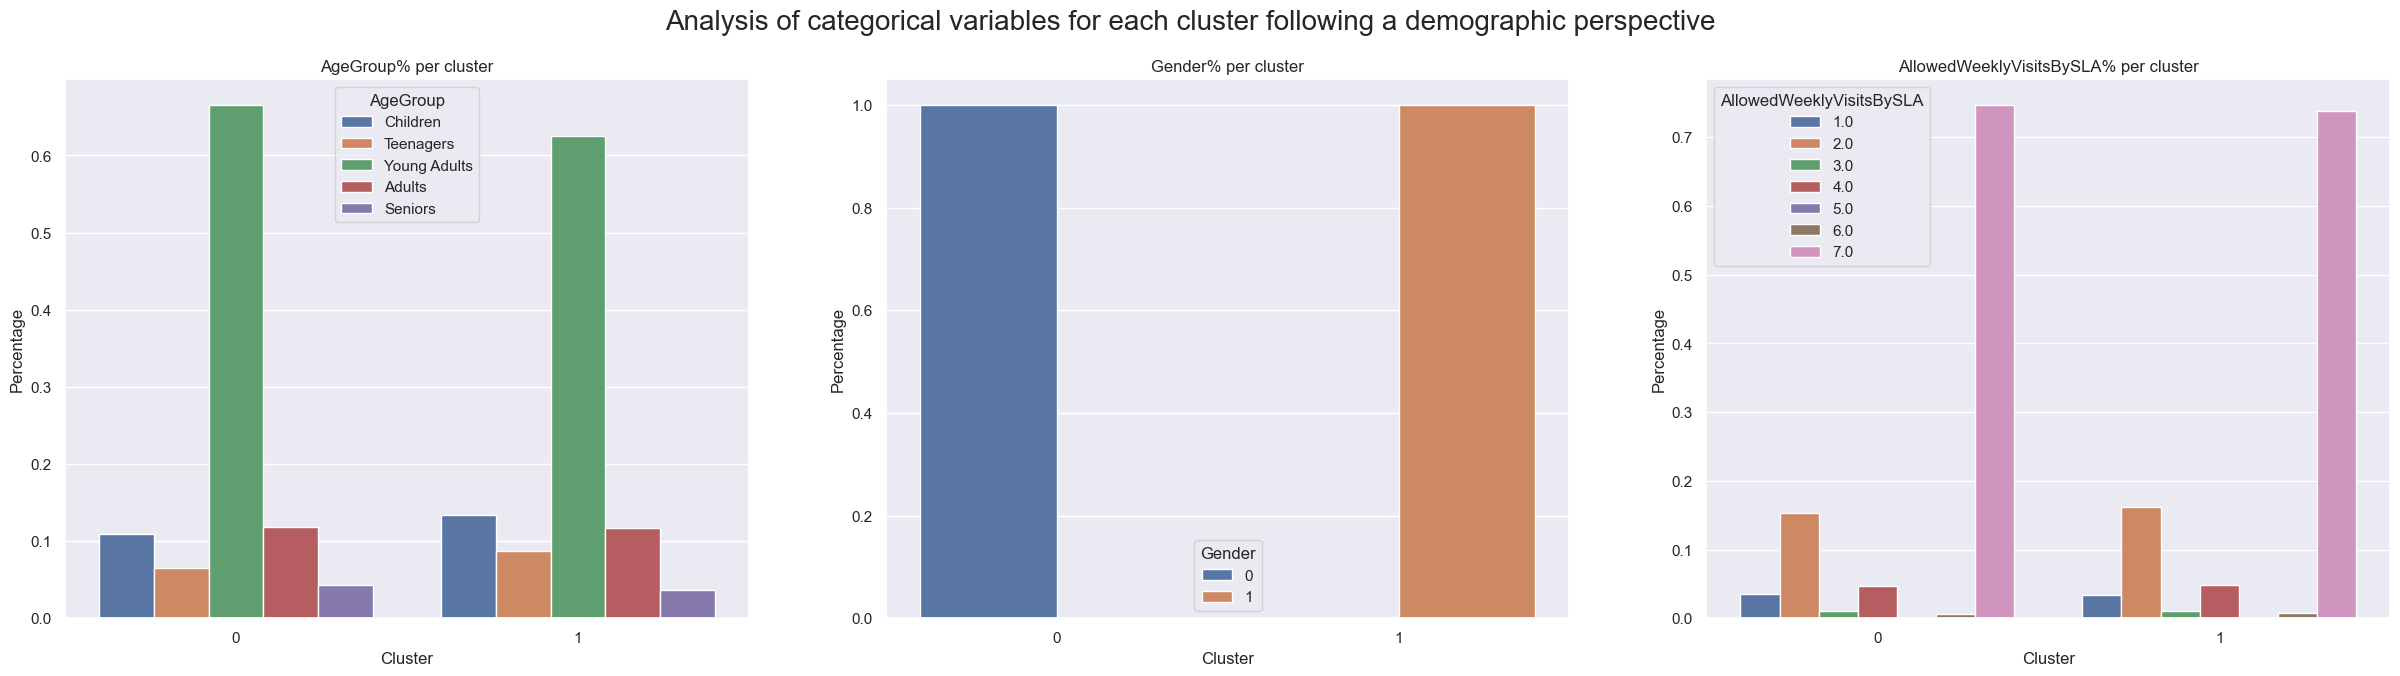

In [162]:
categorical_variables_analysis(df_clusters[categoricals_demo + ['demo_labels']], 'demo_labels', categoricals_demo, 'demographic')

### Value

In [163]:
distance_matrix = gower.gower_matrix(value_feats, cat_features = [False, False, False,False,False,True])
km = kmedoids.KMedoids(3, method='fasterpam').fit(distance_matrix)
labels = km.labels_
df_clusters["value_labels"] = labels

In [164]:
metric_value = ["LifetimeValue", "DaysWithoutFrequency", "NumberOfFrequencies", "RealNumberOfVisits", "NumberOfRenewals"]

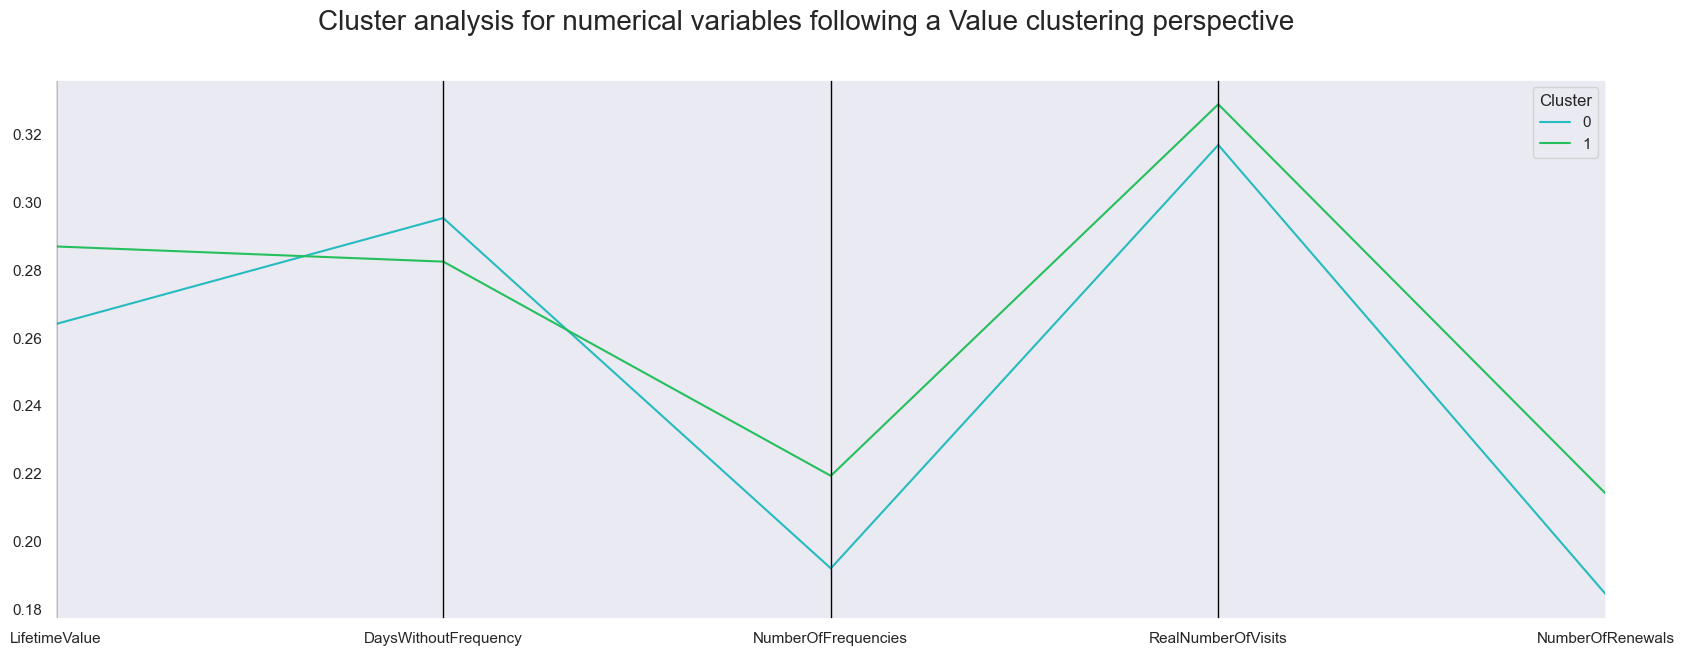

In [165]:
numerical_variables_analysis(df_clusters[metric_value + ['demo_labels']], 'demo_labels', 'Value')

In [166]:
df_clusters.groupby("demo_labels")["Dropout"].value_counts()

demo_labels  Dropout
0            1          7212
             0          1655
1            1          4699
             0          1237
Name: count, dtype: int64

In [167]:
categorical_value = ["Dropout"]

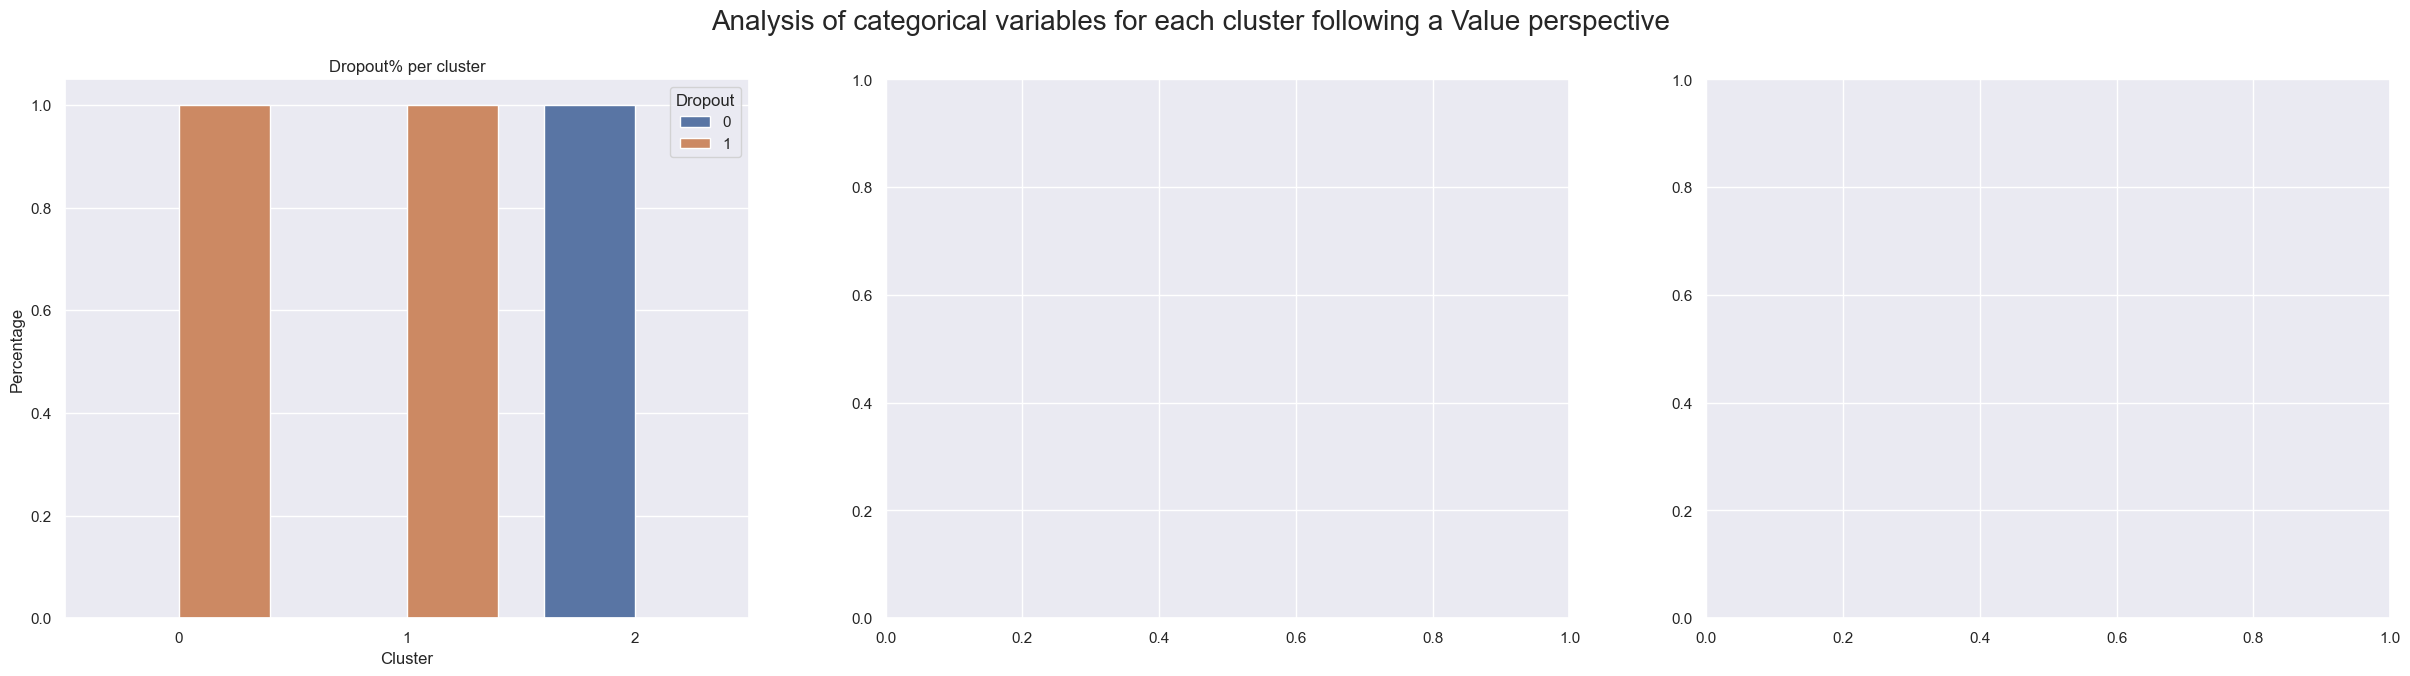

In [168]:
categorical_variables_analysis(df_clusters[categorical_value + ['value_labels']], 'value_labels', categorical_value, 'Value')

### Product

In [169]:
distance_matrix = gower.gower_matrix(product_feats, cat_features = [True, True, True, False])
km = kmedoids.KMedoids(2, method='fasterpam').fit(distance_matrix)
labels = km.labels_
df_clusters["product_labels"] = labels

In [170]:
df_clusters["product_labels"].value_counts()

product_labels
0    9457
1    5346
Name: count, dtype: int64

In [171]:
metric_product = ["MembershipDuration"]

In [172]:
df_clusters.groupby("product_labels")["MembershipDuration"].mean()

product_labels
0    0.370557
1    0.432910
Name: MembershipDuration, dtype: float64

In [173]:
#numerical_variables_analysis(df_clusters[metric_product + ['demo_labels']], 'demo_labels', 'Product')

> These plots are useless when we only have one metric feature

In [174]:
categorical_product = ["WaterActivities", "FitnessActivities"]

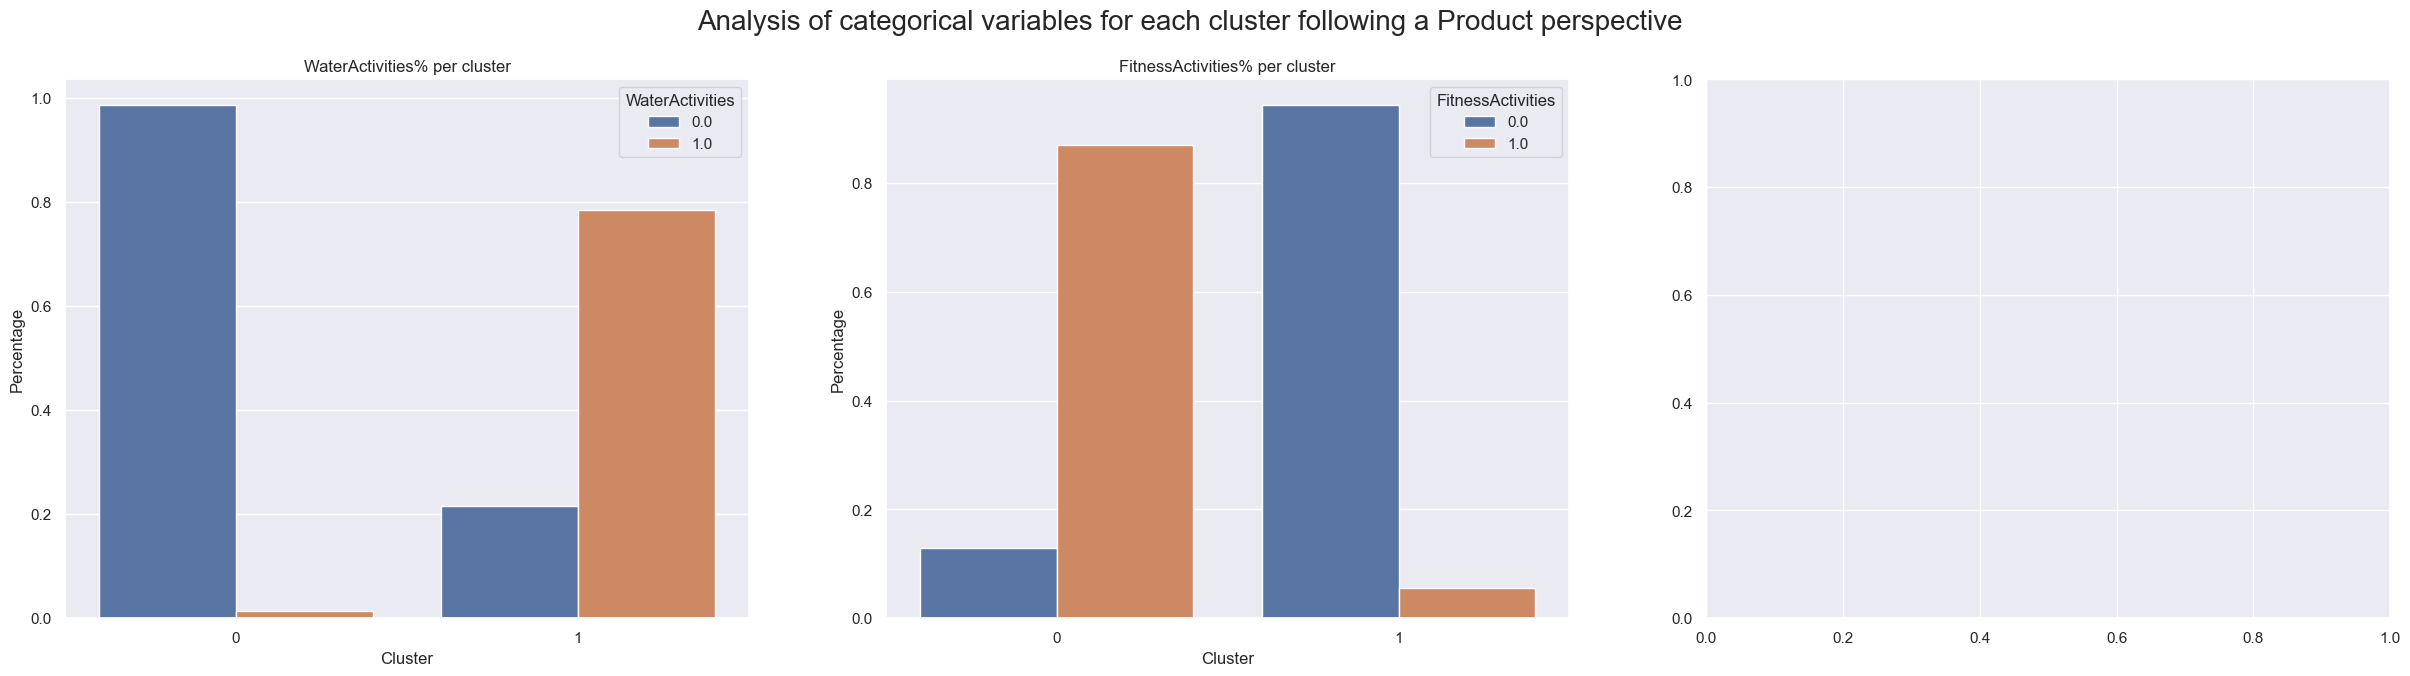

In [175]:
categorical_variables_analysis(df_clusters[categorical_product + ['product_labels']], 'product_labels', categorical_product, 'Product')

# Merging Cluster Perspectives

In [176]:
metric_features

['Income',
 'DaysWithoutFrequency',
 'LifetimeValue',
 'NumberOfFrequencies',
 'AttendedClasses',
 'AllowedNumberOfVisitsBySLA',
 'RealNumberOfVisits',
 'NumberOfRenewals',
 'NumberOfReferences',
 'MembershipDuration',
 'MonthlyVisits',
 'MonthlySpending',
 'TotalActivities']

In [177]:
# Centroids of the concatenated cluster labels
df_centroids = df_clusters.groupby(['demo_labels', 'value_labels', 'product_labels'])\
    [metric_keep].mean()
df_centroids

Income  LifetimeValue  \
demo_labels value_labels product_labels                            
0           0            0               0.215174       0.188383   
                         1               0.169282       0.237394   
            1            0               0.244762       0.305886   
                         1               0.174000       0.372443   
            2            0               0.262729       0.284258   
                         1               0.086575       0.391933   
1           0            0               0.209753       0.192788   
                         1               0.172260       0.248144   
            1            0               0.235368       0.314518   
                         1               0.164015       0.380995   
            2            0               0.249668       0.324730   
                         1               0.091241       0.408914   

                                         DaysWithoutFrequency  \
demo_labels value_labels product_labels                         
0           0            0                           0.310093   
                         1                           0.322563   
            1            0                           0.325012   
                         1                           0.349414   
            2            0                           0.202392   
                         1                           0.152836   
1           0            0                           0.295895   
                         1                           0.316865   
            1            0                           0.302725   
                         1                           0.342719   
            2            0                           0.188816   
                         1                           0.151993   

                                         NumberOfFrequencies  \
demo_labels value_labels product_labels                        
0           0            0                          0.126884   
                         1                          0.130474   
            1            0                          0.279154   
                         1                          0.262062   
            2            0                          0.236899   
                         1                          0.274716   
1           0            0                          0.134359   
                         1                          0.136192   
            1            0                          0.313085   
                         1                          0.266033   
            2            0                          0.293262   
                         1                          0.302814   

                                         RealNumberOfVisits  NumberOfRenewals  \
demo_labels value_labels product_labels                                         
0           0            0                         0.330286          0.043470   
                         1                         0.241684          0.044829   
            1            0                         0.334510          0.357633   
                         1                         0.226630          0.366485   
            2            0                         0.389790          0.271099   
                         1                         0.392216          0.357110   
1           0            0                         0.335590          0.037210   
                         1                         0.239872          0.039385   
            1            0                         0.373606          0.373915   
                         1                         0.233007          0.369167   
            2            0                         0.422896          0.332169   
                         1                         0.416150          0.377159   

                                         MembershipDuration  
demo_labels value_labels product_labels                      
0           0          

In [178]:
# Using Hierarchical clustering to merge the concatenated cluster centroids
linkage = 'ward'
hclust = AgglomerativeClustering(
    linkage=linkage, 
    metric='euclidean', 
    distance_threshold=0, 
    n_clusters=None
)
hclust_labels = hclust.fit_predict(df_centroids)

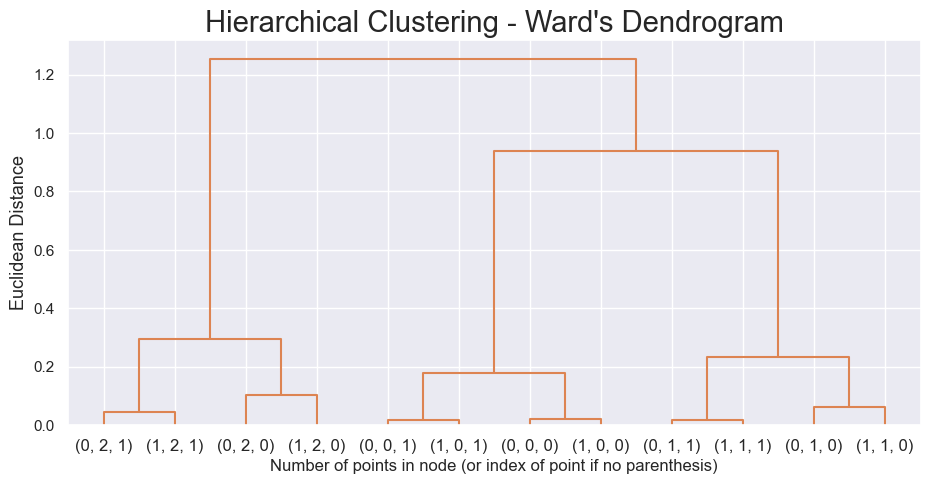

In [179]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 2.3
dendrogram(linkage_matrix, 
           truncate_mode='level', 
           labels=df_centroids.index, p=5, 
           color_threshold=y_threshold, 
           above_threshold_color='k')

plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'Euclidean Distance', fontsize=13)
plt.show()

In [180]:
# Re-running the Hierarchical clustering based on the correct number of clusters
hclust = AgglomerativeClustering(
    linkage='ward', 
    metric='euclidean', 
    n_clusters=3
)
hclust_labels = hclust.fit_predict(df_centroids)
df_centroids['hclust_labels'] = hclust_labels

df_centroids  # centroid's cluster labels

Income  LifetimeValue  \
demo_labels value_labels product_labels                            
0           0            0               0.215174       0.188383   
                         1               0.169282       0.237394   
            1            0               0.244762       0.305886   
                         1               0.174000       0.372443   
            2            0               0.262729       0.284258   
                         1               0.086575       0.391933   
1           0            0               0.209753       0.192788   
                         1               0.172260       0.248144   
            1            0               0.235368       0.314518   
                         1               0.164015       0.380995   
            2            0               0.249668       0.324730   
                         1               0.091241       0.408914   

                                         DaysWithoutFrequency  \
demo_labels value_labels product_labels                         
0           0            0                           0.310093   
                         1                           0.322563   
            1            0                           0.325012   
                         1                           0.349414   
            2            0                           0.202392   
                         1                           0.152836   
1           0            0                           0.295895   
                         1                           0.316865   
            1            0                           0.302725   
                         1                           0.342719   
            2            0                           0.188816   
                         1                           0.151993   

                                         NumberOfFrequencies  \
demo_labels value_labels product_labels                        
0           0            0                          0.126884   
                         1                          0.130474   
            1            0                          0.279154   
                         1                          0.262062   
            2            0                          0.236899   
                         1                          0.274716   
1           0            0                          0.134359   
                         1                          0.136192   
            1            0                          0.313085   
                         1                          0.266033   
            2            0                          0.293262   
                         1                          0.302814   

                                         RealNumberOfVisits  NumberOfRenewals  \
demo_labels value_labels product_labels                                         
0           0            0                         0.330286          0.043470   
                         1                         0.241684          0.044829   
            1            0                         0.334510          0.357633   
                         1                         0.226630          0.366485   
            2            0                         0.389790          0.271099   
                         1                         0.392216          0.357110   
1           0            0                         0.335590          0.037210   
                         1                         0.239872          0.039385   
            1            0                         0.373606          0.373915   
                         1                         0.233007          0.369167   
            2            0                         0.422896          0.332169   
                         1                         0.416150          0.377159   

                                         MembershipDuration  hclust_labels  
demo_labels value_labels product_labels                               

In [181]:
# Mapper between concatenated clusters and hierarchical clusters
cluster_mapper = df_centroids['hclust_labels'].to_dict()

df_ = df_clusters.copy()

# Mapping the hierarchical clusters on the centroids to the observations
df_['merged_labels'] = df_.apply(
    lambda row: cluster_mapper[
        (row['demo_labels'], row['value_labels'], row['product_labels'])
    ], axis=1
)

# Merged cluster centroids
df_.groupby('merged_labels')[metric_keep].mean()

Income  LifetimeValue  DaysWithoutFrequency  \
merged_labels                                                  
0              0.185050       0.343356              0.177700   
1              0.203331       0.344612              0.331861   
2              0.203192       0.202107              0.308588   

               NumberOfFrequencies  RealNumberOfVisits  NumberOfRenewals  \
merged_labels                                                              
0                         0.272078            0.403335          0.326591   
1                         0.277762            0.287005          0.366114   
2                         0.130316            0.310773          0.041560   

               MembershipDuration  
merged_labels                      
0                        0.040003  
1                        0.656769  
2                        0.369965

In [182]:
df_.groupby('merged_labels')[metric_keep].mean()

Income  LifetimeValue  DaysWithoutFrequency  \
merged_labels                                                  
0              0.185050       0.343356              0.177700   
1              0.203331       0.344612              0.331861   
2              0.203192       0.202107              0.308588   

               NumberOfFrequencies  RealNumberOfVisits  NumberOfRenewals  \
merged_labels                                                              
0                         0.272078            0.403335          0.326591   
1                         0.277762            0.287005          0.366114   
2                         0.130316            0.310773          0.041560   

               MembershipDuration  
merged_labels                      
0                        0.040003  
1                        0.656769  
2                        0.369965

# Cluster Profiling

In [183]:
def cluster_profiles(df, label_columns, figsize, compar_titles=None):
    """
    Pass df with labels columns of one or multiple clustering labels. 
    Then specify this label columns to perform the cluster profile according to them.
    """
    if compar_titles == None:
        compar_titles = [""]*len(label_columns)
        
    sns.set()
    fig, axes = plt.subplots(nrows=len(label_columns), ncols=2, figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):
        # Filtering df
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)
        
        # Getting the cluster centroids and counts
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        
        # Setting Data
        pd.plotting.parallel_coordinates(centroids, label, color=sns.color_palette(), ax=ax[0])
        sns.barplot(x=label, y="counts", data=counts, ax=ax[1])

        #Setting Layout
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        ax[0].annotate(text=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=13, fontweight = 'heavy') 
        ax[0].legend(handles, cluster_labels) # Adaptable to number of clusters
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=13)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-20)
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=13)
    
    plt.subplots_adjust(hspace=0.4, top=0.90)
    plt.suptitle("Cluster Simple Profilling", fontsize=23)
    plt.show()

## Cluster visualization using t-SNE

In [184]:
df_

AgeGroup    Income  LifetimeValue  DaysWithoutFrequency  \
0           Seniors  0.505051       0.189985              0.083062   
1      Young Adults  0.241506       0.378597              0.325176   
2      Young Adults  0.181818       0.126991              0.158892   
3          Children  0.000000       0.240905              0.232743   
4      Young Adults  0.396694       0.343420              0.493713   
...             ...       ...            ...                   ...   
14937     Teenagers  0.000000       0.576513              0.104651   
14938        Adults  0.199895       0.332518              0.279252   
14939  Young Adults  0.166208       0.136519              0.104651   
14940        Adults  0.440771       0.458066              0.119796   
14941  Young Adults  0.339761       0.485368              0.200191   

       NumberOfFrequencies  RealNumberOfVisits  NumberOfRenewals  \
0                 0.118661            0.287685          0.000000   
1                 0.202572            0.228336          0.333333   
2                 0.089771            0.414913          0.000000   
3                 0.188350            0.329317          0.000000   
4                 0.268967            0.000000          0.500000   
...                    ...                 ...               ...   
14937             0.419706            0.456671          0.500000   
14938             0.312944            0.329317          0.000000   
14939             0.089771            0.456671          0.000000   
14940             0.516136            0.436790          0.333333   
14941             0.497543            0.536893          0.666667   

       MembershipDuration Gender  WaterActivities  FitnessActivities  \
0                0.252227      0              0.0                1.0   
1                0.554667      0              0.0                0.0   
2                0.186697      1              0.0                1.0   
3                0.387114      1              0.0                0.0   
4                0.715028      1              0.0                1.0   
...                   ...    ...              ...                ...   
14937            0.000000      1              1.0                0.0   
14938            0.470700      1              0.0                0.0   
14939            0.186697      1              0.0                1.0   
14940            0.000000      1              1.0                0.0   
14941            0.830727      0              0.0                1.0   

       CombatActivities  Dropout  AllowedWeeklyVisitsBySLA  demo_labels  \
0                   0.0        0                       7.0            0   
1                   0.0        1                       2.0            0   
2                   0.0        1                       7.0            1   
3                   0.0        1                       2.0            1   
4                   0.0        1                       7.0            1   
...                 ...      ...                       ...          ...   
14937               0.0        0                       4.0            1   
14938               1.0        1                       7.0            1   
14939               0.0        1                       7.0            1   
14940               0.0        0                       3.0            1   
14941               0.0        1                       7.0            0   

       value_labels  product_labels  merged_labels  
0                 2               0              0  
1                 1               1              1  
2                 0               0              2  
3                 0               0              2  
4                 1               0              1  
...             ...             ...            ...  
14937             2               1              0  
14938             0               1              2  
14939             0               0              2  
14940             2               1              0  
1494

In [185]:
# This is step can be quite time consuming
two_dim = TSNE(random_state=42).fit_transform(df_[metric_keep])

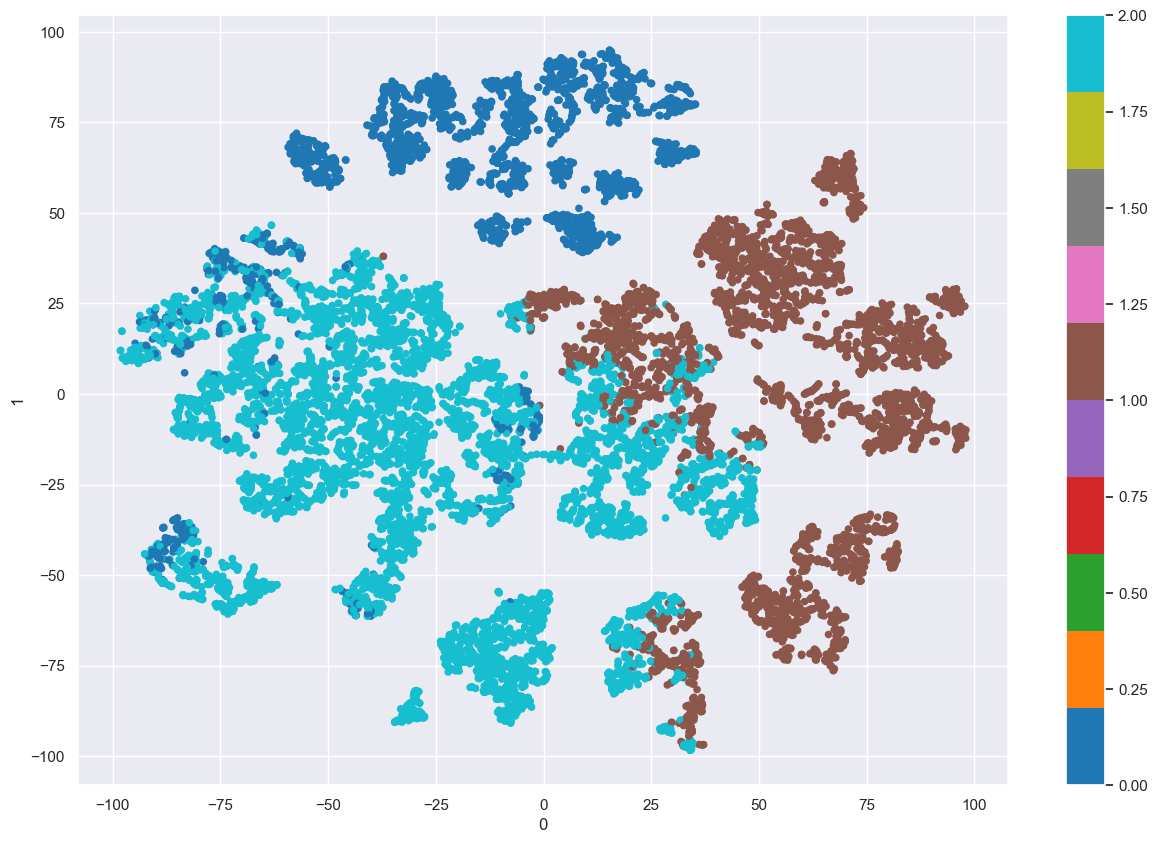

In [186]:
# t-SNE visualization
pd.DataFrame(two_dim).plot.scatter(x=0, y=1, c=df_['merged_labels'], colormap='tab10', figsize=(15,10))
plt.show()

In [187]:
metric_final = metric_demo + metric_value + metric_product

In [191]:
categorical_final = ["AgeGroup", "Gender", "WaterActivities", "FitnessActivities","CombatActivities","Dropout", "AllowedWeeklyVisitsBySLA"]

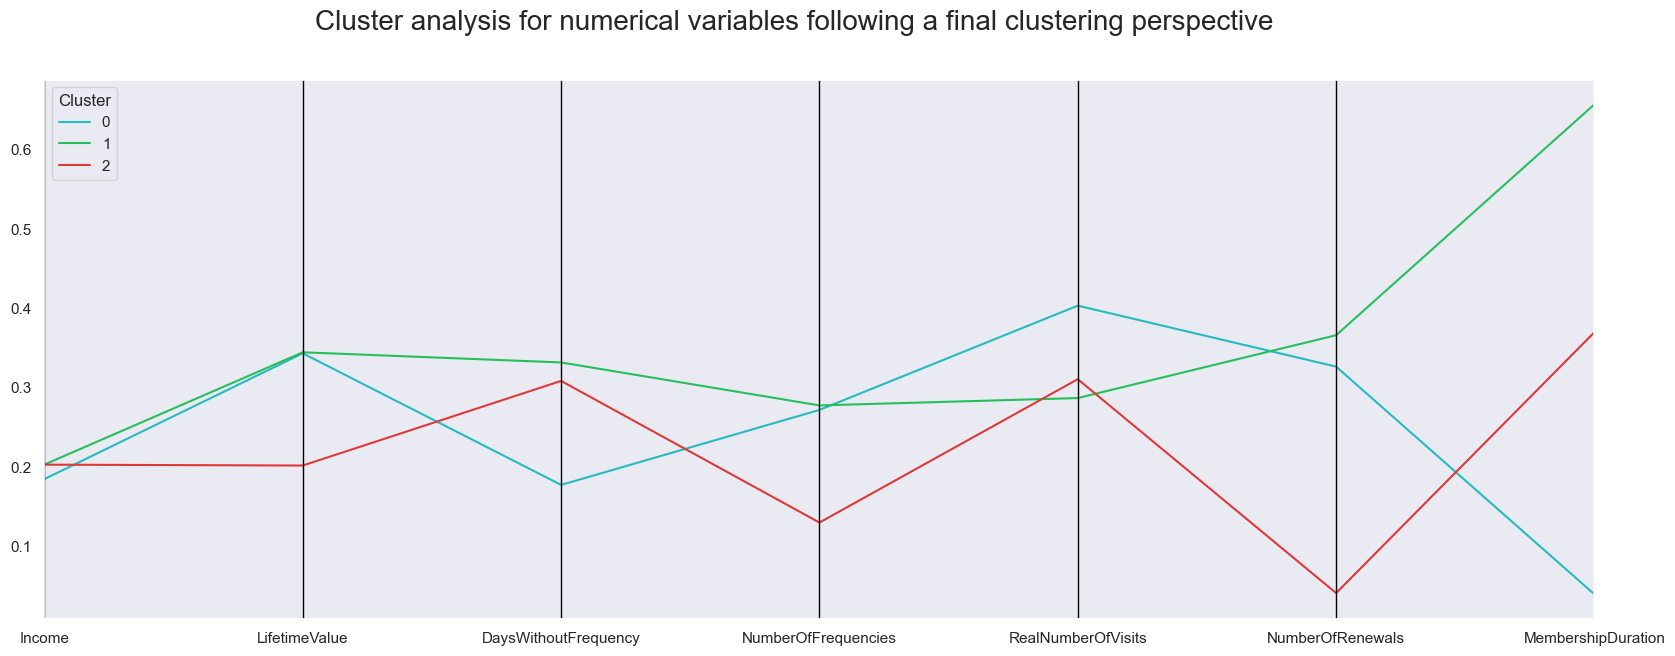

In [189]:
numerical_variables_analysis(df_[metric_final + ['merged_labels']], 'merged_labels', 'final')

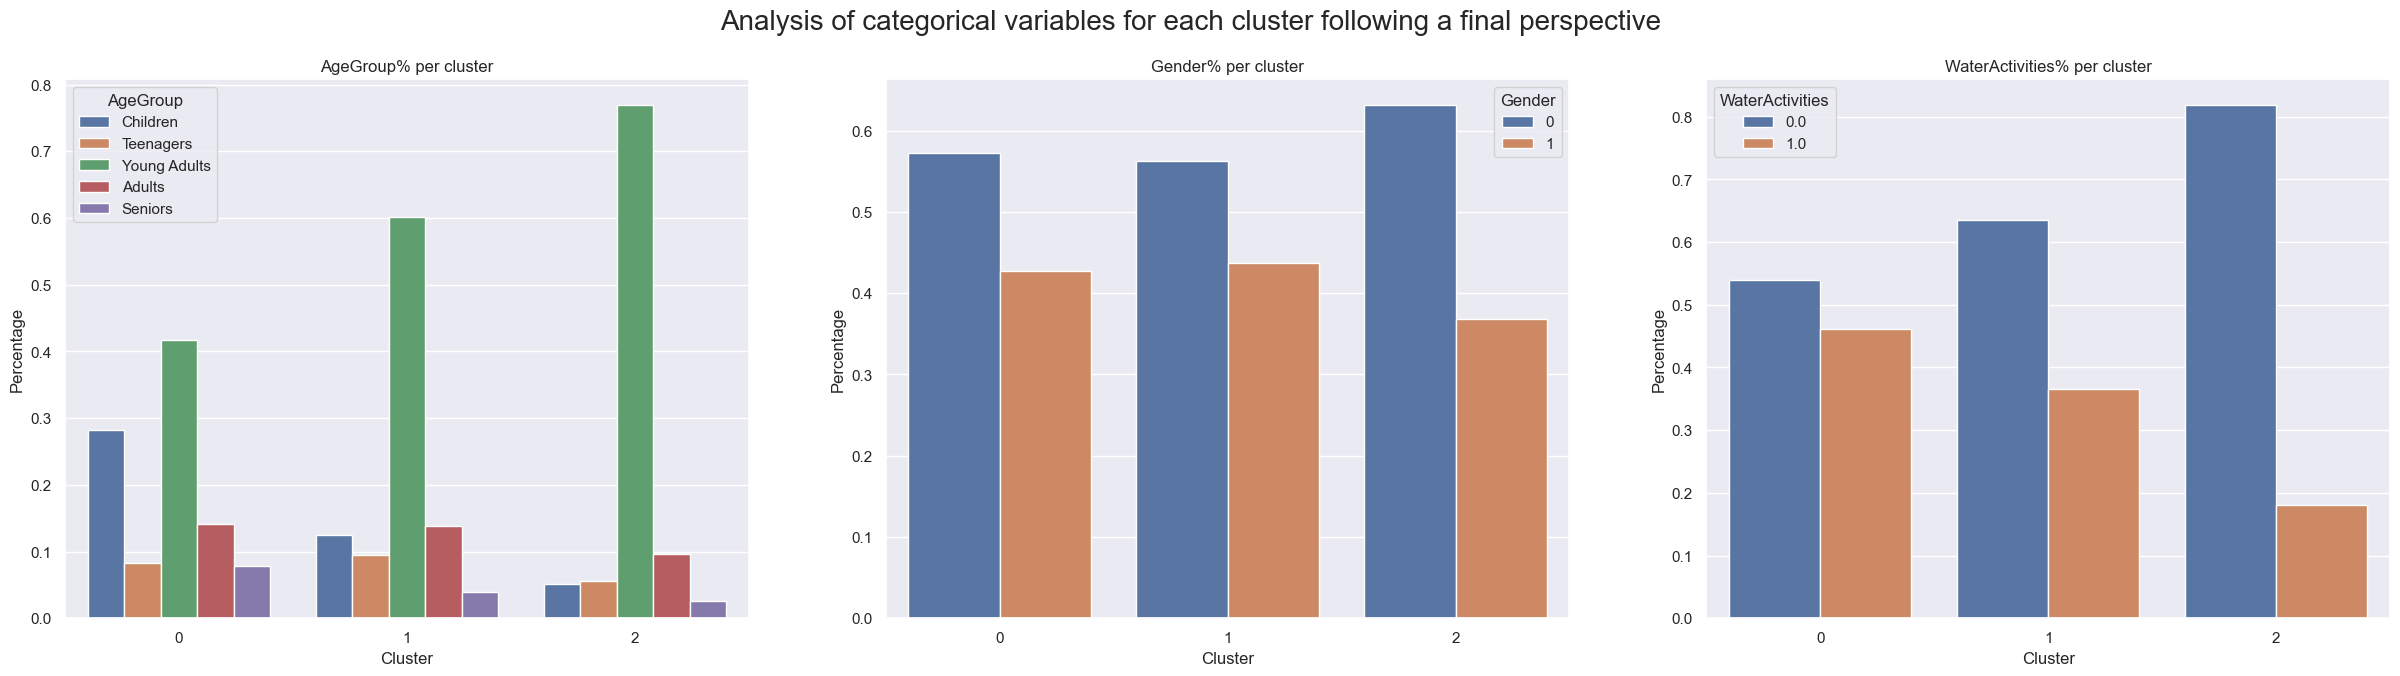

In [192]:
categorical_variables_analysis(df_[categorical_final+ ['merged_labels']], 'merged_labels', categorical_final, 'final')